Ссылка на GitHub: https://github.com/Mimmey/PurchasingActivity 

# Увеличение покупательской активности постоянных клиентов сервиса "В один клик"

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования.

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Подход к решению задачи**:

Для выполнения задачи необходимо пройти следуюшие этапы:

- Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
- Нужно собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

- Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
- В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
- Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

**Цель исследования**

Целью исследования является сегментация покупателей и разработка персонализированных предложений для них.


**Описание данных**

1. market_file.csv
    Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    - `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
    - `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
    - `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
    - `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
    
    
2. market_money.csv
    Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    - `Выручка` — сумма выручки за период.
    

3. market_time.csv
    Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксировано общее время.
    - `минут` — значение времени, проведённого на сайте, в минутах.
    

4. money.csv
    Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Прибыль` — значение прибыли.


**Ход исследования**

Исследование пройдёт в девять этапов:
 1. Загрузка данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Объединение таблиц.
 5. Корреляционный анализ.
 6. Использование пайплайнов.
 7. Анализ важности признаков.
 8. Сегментация покупателей.
 9. Итоговые выводы.

## Ход работы

Перед началом работы необходимо импортировать нужные библиотеки:

In [298]:
!pip install -q imblearn
!pip install -q phik
!pip install -Uq scikit-learn
!pip install -q shap
!pip install -q optuna
!pip install -q seaborn
!pip install -q optuna.integration

zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


In [299]:
import pandas as pd
import optuna
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from cycler import cycler
import seaborn as sns

import numpy as np
from scipy import stats as st
import phik

from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTENC

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, f1_score

from optuna import distributions
from optuna.integration import OptunaSearchCV

from sklearn.inspection import permutation_importance
import shap

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

Кроме того, необходимо задать стили для графиков:

In [300]:
colors = ['darkturquoise', '#FFB5B8', '#8EBA42', '#FBC15E', '#777777', '#988ED5', '#348ABD', '#E24A33']

sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
mpl.style.use(['ggplot'])
mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

И задать константы:

In [301]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

Необходимые подготовительные шаги сделаны.

### Загрузка данных

Первыми шагами в исследовании являются корректная выгрузка и первичный взгляд на данные, а также приведение их к виду, удобному для обработки (правильно подобранные названия столбцов). Сделаем это.

#### Выгрузка датасетов

Поочередно выгрузим датасеты и рассмотрим каждый из них.

##### market_file.csv

Откроем таблицу, содержащую данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:

In [302]:
market_customer_df = pd.read_csv('./datasets/market_file.csv')
market_customer_df.head()

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

В таблице присутствуют следующие значения:

- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

Данные выглядят правдоподобно.

##### market_money.csv

Откроем таблицу, содержащую данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом:

In [303]:
market_money_df = pd.read_csv('./datasets/market_money.csv')
market_money_df.head()

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

В таблице присутствуют следующие значения:

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- `Выручка` — сумма выручки за период.    

Данные выглядят правдоподобно.

##### market_time.csv

Откроем таблицу, содержащую данные о времени (в минутах), которое покупатель провёл на сайте в течение периода:

In [304]:
market_time_df = pd.read_csv('./datasets/market_time.csv')
market_time_df.head()

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

В таблице присутствуют следующие значения:

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.

Количество минут на сайте выглядит очень небольшим, но, возможно, такова специфика сайта.

##### money.csv

Откроем таблицу, содержащую данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю:

In [305]:
money_df = pd.read_csv('./datasets/money.csv', sep=';', decimal=',')
money_df.head()

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

В таблице присутствуют следующие значения:

- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.

Прибыль выглядит очень малой по сравнению с выручкой в таблице `market_money_df`, но, возможно, на это влияет тот факт, что прибыль предоставляется за 3 месяца, а выручка - за все время. Кроме того, прибыль считается как выручка за вычетом себестоимости и сопутствующих расходов. Тем не менее, нужно будет проверить порядке чисел.

#### Вывод

Предоставленные данные соответствуют описанию. Единственное: правдоподобность некоторых значений необходимо будет проверить в процессе анализа.

### Предобработка данных

#### Переименование столбцов

Для начала переименуем столбцы в таблицах в удобный для работы вид.

###### market_customer_df

Выведем названия столбцов для таблицы:

In [306]:
market_customer_df.columns

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

Напишем функцию, заменяющую нижние подчеркивания на пробелы и переводящую в нижний регистр строки в списке:

In [307]:
def normalize_col_names(col_names):
    return [col.lower().replace('_', ' ') for col in col_names]

Поменяем названия столбцов в таблице и проверим результат:

In [308]:
market_customer_df.columns = normalize_col_names(market_customer_df.columns)
market_customer_df.columns

Index(['id', 'покупательская активность', 'тип сервиса', 'разрешить сообщать',
       'маркет актив 6 мес', 'маркет актив тек мес', 'длительность',
       'акционные покупки', 'популярная категория',
       'средний просмотр категорий за визит',
       'неоплаченные продукты штук квартал', 'ошибка сервиса',
       'страниц за визит'],
      dtype='object')

Названия столбцов успешно изменены.

###### market_money_df

Выведем названия столбцов для таблицы:

In [309]:
market_money_df.columns

Index(['id', 'Период', 'Выручка'], dtype='object')

Поменяем названия столбцов в таблице и проверим результат:

In [310]:
market_money_df.columns = normalize_col_names(market_money_df.columns)
market_money_df.columns

Index(['id', 'период', 'выручка'], dtype='object')

Названия столбцов успешно изменены.

###### market_time_df

Выведем названия столбцов для таблицы:

In [311]:
market_time_df.columns

Index(['id', 'Период', 'минут'], dtype='object')

Поменяем названия столбцов в таблице и проверим результат:

In [312]:
market_time_df.columns = normalize_col_names(market_time_df.columns)
market_time_df.columns

Index(['id', 'период', 'минут'], dtype='object')

Названия столбцов успешно изменены.

###### money_df

Выведем названия столбцов для таблицы:

In [313]:
money_df.columns

Index(['id', 'Прибыль'], dtype='object')

Поменяем названия столбцов в таблице и проверим результат:

In [314]:
money_df.columns = normalize_col_names(money_df.columns)
money_df.columns

Index(['id', 'прибыль'], dtype='object')

Названия столбцов успешно изменены.

#### Приведение типов

Далее необходимо привести типы данных.

###### market_customer_df

Рассмотрим информацию о таблице:

In [315]:
market_customer_df.head()

id покупательская активность тип сервиса разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   маркет актив 6 мес  маркет актив тек мес  длительность  акционные покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная категория  средний просмотр категорий за визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные продукты штук квартал  ошибка сервиса  страниц за визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [316]:
market_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская активность            1300 non-null   object 
 2   тип сервиса                          1300 non-null   object 
 3   разрешить сообщать                   1300 non-null   object 
 4   маркет актив 6 мес                   1300 non-null   float64
 5   маркет актив тек мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные покупки                    1300 non-null   float64
 8   популярная категория                 1300 non-null   object 
 9   средний просмотр категорий за визит  1300 non-null   int64  
 10  неоплаченные продукты штук квартал   1300 non-null   int64  
 11  ошибка сервиса                

Видим, что типы данных верны и менять их нет необходимости.

###### market_money_df

Рассмотрим информацию о таблице:

In [317]:
market_money_df.head()

id               период  выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

In [318]:
market_money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Видим, что типы данных верны и менять их нет необходимости.

###### market_time_df

Рассмотрим информацию о таблице:

In [319]:
market_time_df.head()

id            период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

In [320]:
market_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Видим, что типы данных верны и менять их нет необходимости.

###### money_df

Рассмотрим информацию о таблице:

In [321]:
money_df.head()

id  прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

In [322]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Видим, что типы данных верны и менять их нет необходимости.

#### Обработка пропусков

Далее необходимо проверить пропуски.

###### market_customer_df

Выведем информацию о таблице:

In [323]:
market_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская активность            1300 non-null   object 
 2   тип сервиса                          1300 non-null   object 
 3   разрешить сообщать                   1300 non-null   object 
 4   маркет актив 6 мес                   1300 non-null   float64
 5   маркет актив тек мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные покупки                    1300 non-null   float64
 8   популярная категория                 1300 non-null   object 
 9   средний просмотр категорий за визит  1300 non-null   int64  
 10  неоплаченные продукты штук квартал   1300 non-null   int64  
 11  ошибка сервиса                

Явных пропусков в таблице не наблюдается.

###### market_money_df

Выведем информацию о таблице:

In [324]:
market_money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Явных пропусков в таблице не наблюдается.

###### market_time_df

Выведем информацию о таблице:

In [325]:
market_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Явных пропусков в таблице не наблюдается.

###### money_df

Выведем информацию о таблице:

In [326]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Явных пропусков в таблице не наблюдается.

#### Обработка дубликатов

Далее необходимо обработать дубликаты.

##### Обработка неявных дубликатов

Для начала обработаем неявные дубликаты.

###### market_customer_df

Выведем таблицу:

In [327]:
market_customer_df.head()

id покупательская активность тип сервиса разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   маркет актив 6 мес  маркет актив тек мес  длительность  акционные покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная категория  средний просмотр категорий за визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные продукты штук квартал  ошибка сервиса  страниц за визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

Необходимо проверить неявные дубликаты в столбцах `покупательская активность`, `тип сервиса`, `разрешить сообщать` и `популярная категория`.

###### покупательская активность

Выведем все значения этого столбца:

In [328]:
market_customer_df['покупательская активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

Неявных дубликатов нет. Однако стоит привести значения к нижнему регистру для однородности данных:

In [329]:
market_customer_df['покупательская активность'] = market_customer_df['покупательская активность'].apply(lambda x : x.lower())

In [330]:
market_customer_df['покупательская активность'].unique()

array(['снизилась', 'прежний уровень'], dtype=object)

Столбец успешно обработан.

###### тип сервиса

Выведем все значения этого столбца:

In [331]:
market_customer_df['тип сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

Есть неявный дубликат (`стандарт`/`стандартт`). Устраним его:

In [332]:
market_customer_df['тип сервиса'] = market_customer_df['тип сервиса'].replace('стандартт', 'стандарт')

In [333]:
market_customer_df['тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

Столбец успешно обработан.

###### разрешить сообщать

Выведем все значения этого столбца:

In [334]:
market_customer_df['разрешить сообщать'].unique()

array(['да', 'нет'], dtype=object)

Неявных дубликатов в этом столбце нет.

###### популярная категория

Выведем все значения этого столбца:

In [335]:
market_customer_df['популярная категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

Неявных дубликатов нет. Однако есть ошибка в слове `аксессуары`. Исправим ее:

In [336]:
market_customer_df['популярная категория'] = market_customer_df['популярная категория'].apply(lambda x : x.replace('аксесуары', 'аксессуары'))

Кроме того, стоит привести значения к нижнему регистру для однородности данных:

In [337]:
market_customer_df['популярная категория'] = market_customer_df['популярная категория'].apply(lambda x : x.lower())

In [338]:
market_customer_df['популярная категория'].unique()

array(['товары для детей', 'домашний текстиль', 'косметика и аксессуары',
       'техника для красоты и здоровья', 'кухонная посуда',
       'мелкая бытовая техника и электроника'], dtype=object)

Столбец успешно обработан.

###### market_money_df

Выведем таблицу:

In [339]:
market_money_df.head()

id               период  выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

Необходимо проверить неявные дубликаты в столбце `период`.

###### период

Выведем все значения этого столбца:

In [340]:
market_money_df['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Неявных дубликатов нет. Однако стоит заменить нижние подчеркивания на пробелы для однородности данных:

In [341]:
market_money_df['период'] = market_money_df['период'].apply(lambda x : x.replace('_', ' '))

In [342]:
market_money_df['период'].unique()

array(['препредыдущий месяц', 'текущий месяц', 'предыдущий месяц'],
      dtype=object)

Столбец успешно обработан.

###### market_time_df

Выведем таблицу:

In [343]:
market_time_df.head()

id            период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

Необходимо проверить неявные дубликаты в столбце `период`.

###### период

Выведем все значения этого столбца:

In [344]:
market_time_df['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

В слове `предыдущий` есть ошибка. Исправим ее:

In [345]:
market_time_df['период'] = market_time_df['период'].apply(lambda x : x.replace('предыдцщий', 'предыдущий'))

Кроме того, стоит заменить нижние подчеркивания на пробелы для однородности данных:

In [346]:
market_time_df['период'] = market_time_df['период'].apply(lambda x : x.replace('_', ' '))

In [347]:
market_time_df['период'].unique()

array(['текущий месяц', 'предыдущий месяц'], dtype=object)

Столбец успешно обработан. Кроме того, обеспечено сопоставление значений периодов для аналогичного столбца в таблице `market_money_df`.

###### money_df

Выведем таблицу:

In [348]:
money_df.head()

id  прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

Строковых категориальных столбцов не наблюдается, поэтому неявные дубликаты обрабатывать негде.

##### Обработка явных дубликатов

###### market_customer_df

Проверим наличие явных дубликатов:

In [349]:
market_customer_df[market_customer_df.duplicated()]

Empty DataFrame
Columns: [id, покупательская активность, тип сервиса, разрешить сообщать, маркет актив 6 мес, маркет актив тек мес, длительность, акционные покупки, популярная категория, средний просмотр категорий за визит, неоплаченные продукты штук квартал, ошибка сервиса, страниц за визит]
Index: []

Дополнительно проверим дубликаты по столбцу `id`:

In [350]:
market_customer_df[market_customer_df['id'].duplicated()]

Empty DataFrame
Columns: [id, покупательская активность, тип сервиса, разрешить сообщать, маркет актив 6 мес, маркет актив тек мес, длительность, акционные покупки, популярная категория, средний просмотр категорий за визит, неоплаченные продукты штук квартал, ошибка сервиса, страниц за визит]
Index: []

Явных дубликатов нет.

###### market_money_df

Проверим наличие явных дубликатов:

In [351]:
market_money_df[market_money_df.duplicated()]

Empty DataFrame
Columns: [id, период, выручка]
Index: []

Дополнительно проверим дубликаты по сочетанию столбцов `id` и `период`:

In [352]:
market_money_df[market_money_df.duplicated(subset=['id', 'период'])]

Empty DataFrame
Columns: [id, период, выручка]
Index: []

Явных дубликатов нет.

###### market_time_df

Проверим наличие явных дубликатов:

In [353]:
market_time_df[market_time_df.duplicated()]

Empty DataFrame
Columns: [id, период, минут]
Index: []

Дополнительно проверим дубликаты по сочетанию столбцов `id` и `период`:

In [354]:
market_time_df[market_time_df.duplicated(subset=['id', 'период'])]

Empty DataFrame
Columns: [id, период, минут]
Index: []

Явных дубликатов нет.

###### money_df

Проверим наличие явных дубликатов:

In [355]:
money_df[money_df.duplicated()]

Empty DataFrame
Columns: [id, прибыль]
Index: []

Дополнительно проверим дубликаты по столбцу `id`:

In [356]:
money_df[money_df['id'].duplicated()]

Empty DataFrame
Columns: [id, прибыль]
Index: []

Явных дубликатов нет.

#### Вывод

Данные оказались достаточно чистыми, но с некоторыми неявными дубликатами и орфографическими ошибками. Все шероховатости и недостатки данных были исправлены.

### Исследовательский анализ данных

Далее необходимо провести исследовательский анализ данных, чтобы исключить возможные аномалии.

#### Анализ количественных признаков

Для начала исследуем количественные признаки в каждом из датасетов по очереди.

###### market_customer_df

Выведем таблицу:

In [357]:
market_customer_df.head()

id покупательская активность тип сервиса разрешить сообщать  \
0  215348                 снизилась     премиум                 да   
1  215349                 снизилась     премиум                 да   
2  215350                 снизилась    стандарт                нет   
3  215351                 снизилась    стандарт                 да   
4  215352                 снизилась    стандарт                нет   

   маркет актив 6 мес  маркет актив тек мес  длительность  акционные покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная категория  средний просмотр категорий за визит  \
0     товары для детей                                    6   
1     товары для детей                                    4   
2    домашний текстиль                                    5   
3     товары для детей                                    5   
4     товары для детей                                    3   

   неоплаченные продукты штук квартал  ошибка сервиса  страниц за визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

Количественными являются следующие признаки:

- `маркет актив 6 мес`;
- `маркет актив тек мес`;
- `длительность`;
- `акционные покупки`;
- `средний просмотр категорий за визит`;
- `неоплаченные продукты штук квартал`;
- `ошибка сервиса`;
- `страниц за визит`.

Рассмотрим их по отдельности.

###### маркет актив 6 мес

Для начала построим гистограмму:

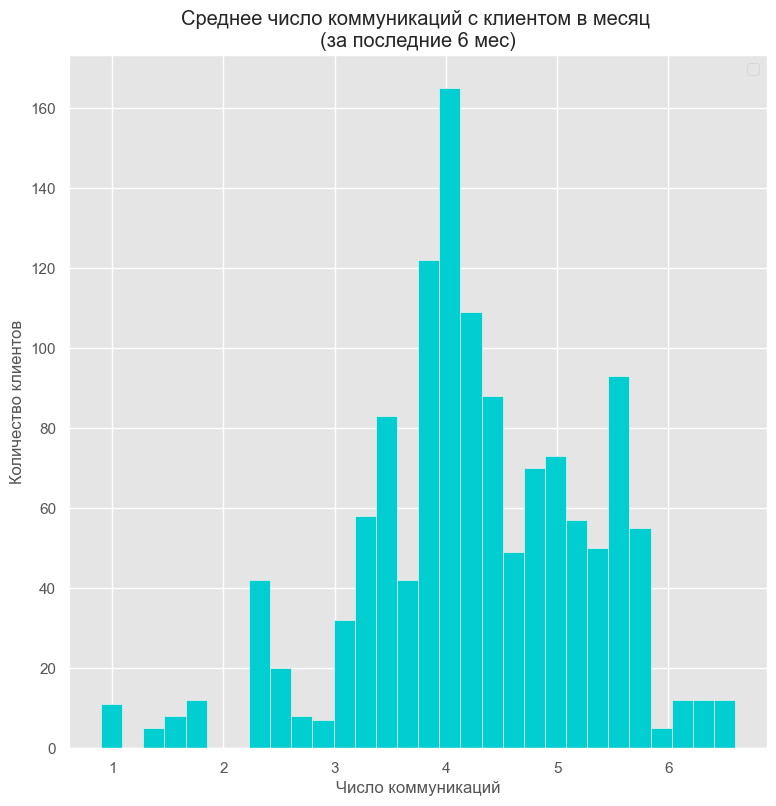

In [358]:
market_customer_df['маркет актив 6 мес'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Среднее число коммуникаций с клиентом в месяц \n(за последние 6 мес)')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Число коммуникаций')
plt.show()

Если судить по пикам, можно увидеть нечто отдаленно похожее на нормальное распределение со сдвигом вправо. Что-то еще о таком распределении сказать сложно. Построим боксплот:

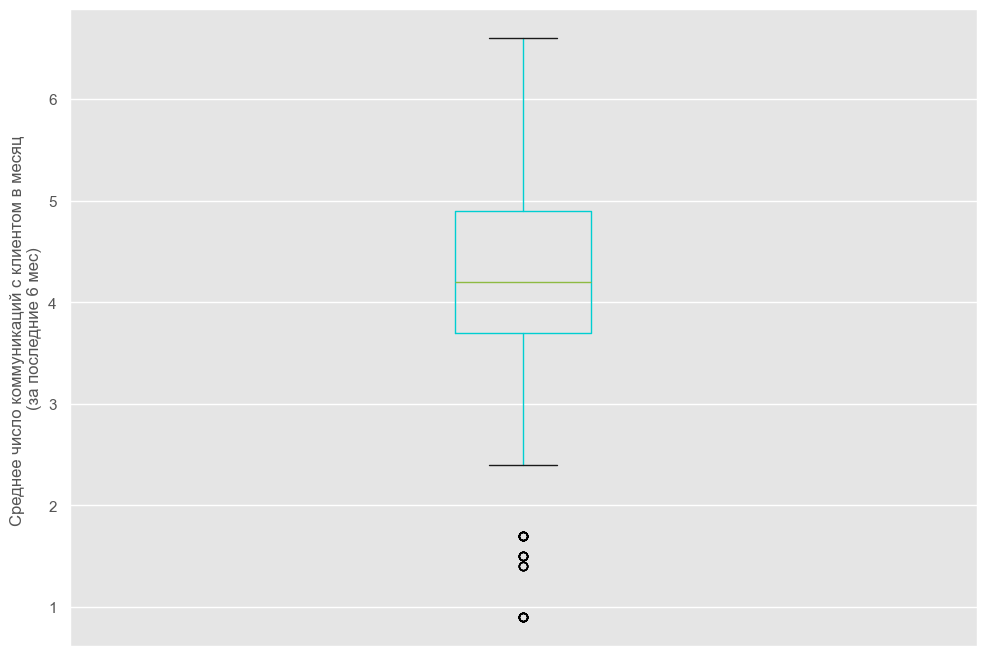

In [359]:
market_customer_df.boxplot('маркет актив 6 мес')
plt.ylabel('Среднее число коммуникаций с клиентом в месяц \n(за последние 6 мес)')
plt.xticks([])
plt.show()

Видим, что некоторое количество значений явно уходит за пределы первого квантиля. Попробуем поступить следующим образом: сделаем из этого количественного признака два категориальных:
- `маркет актив 6 мес категориальный (2,6)` - будет иметь значения `низкий`, `средний`, `высокий` при `маркет актив 6 мес` меньше 2, от 2 до 6, выше 6 (соответственно),
- `маркет актив 6 мес категориальный (3,6)`- будет иметь значения `низкий`, `средний`, `высокий` при `маркет актив 6 мес` меньше 3, от 3 до 6, выше 6 (соответственно).

Из трех получившихся признаков при корреляционном анализе данных выкинем наименее полезные:

In [360]:
market_customer_df['маркет актив 6 мес категориальный (2,6)'] = market_customer_df['маркет актив 6 мес'].apply(
    lambda x : 'низкий' if x < 2 else 'средний' if x <= 6 else 'высокий'
)
market_customer_df['маркет актив 6 мес категориальный (3,6)'] = market_customer_df['маркет актив 6 мес'].apply(
    lambda x : 'низкий' if x < 3 else 'средний' if x <= 6 else 'высокий'
)

Построим графики новых признаков:

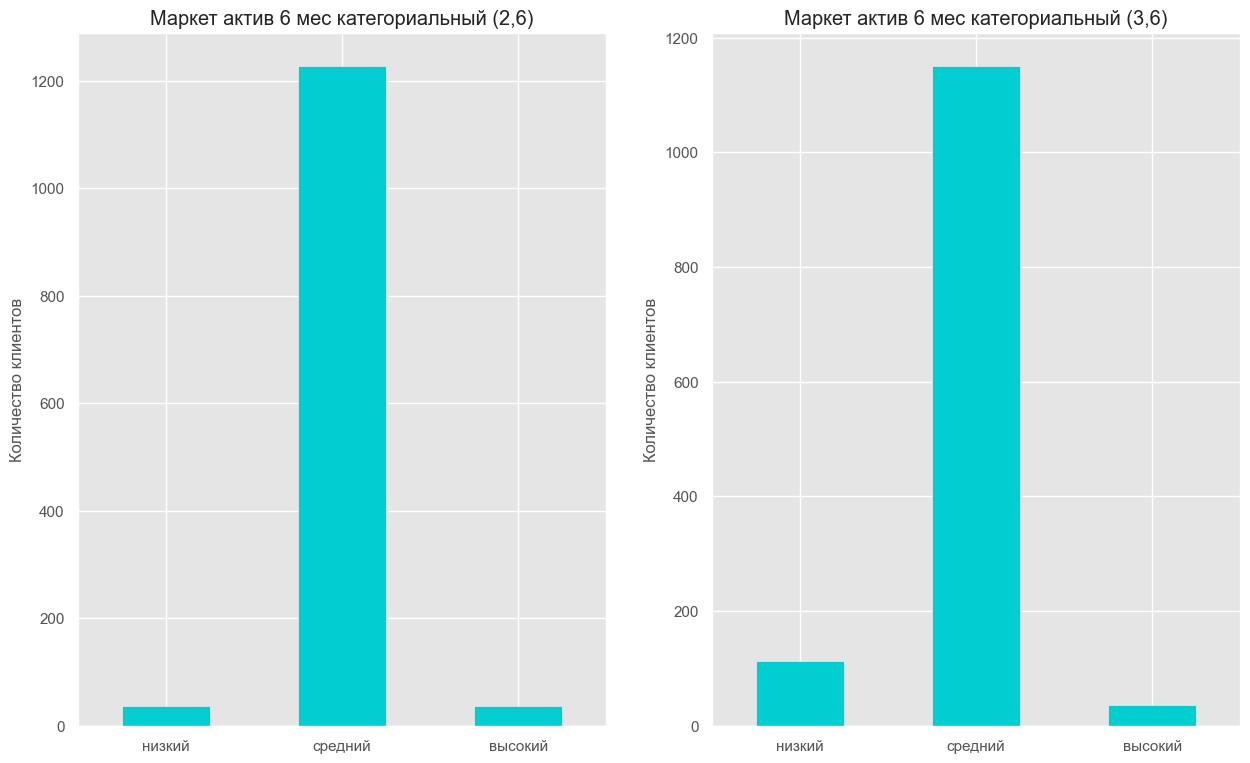

In [361]:
def get_greatness(val):
    indexers = {
        'низкий': 0,
        'средний': 1,
        'высокий': 2
    }
    return [indexers[idx] for idx in val]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,9))

cat_2_6 = market_customer_df.pivot_table(index='маркет актив 6 мес категориальный (2,6)', values='id', aggfunc='count')
cat_2_6.columns = ['count']
cat_2_6.sort_index(key=get_greatness, ascending=True, inplace=True)

cat_2_6.plot.bar(ax=axes[0],
                 title='Маркет актив 6 мес категориальный (2,6)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')

cat_3_6 = market_customer_df.pivot_table(index='маркет актив 6 мес категориальный (3,6)', values='id', aggfunc='count')
cat_3_6.columns = ['count']
cat_3_6.sort_index(key=get_greatness, ascending=True, inplace=True)

cat_3_6.plot.bar(ax=axes[1],
                 title='Маркет актив 6 мес категориальный (3,6)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')
plt.show()

Налицо сильный дисбаланс. Если один из получившихся категориальных признаков по результатам корреляционного анализа будет предпочтительнее количественного, необходимо будет это учесть при обучении модели.

###### маркет актив тек мес

Построим гистограмму:

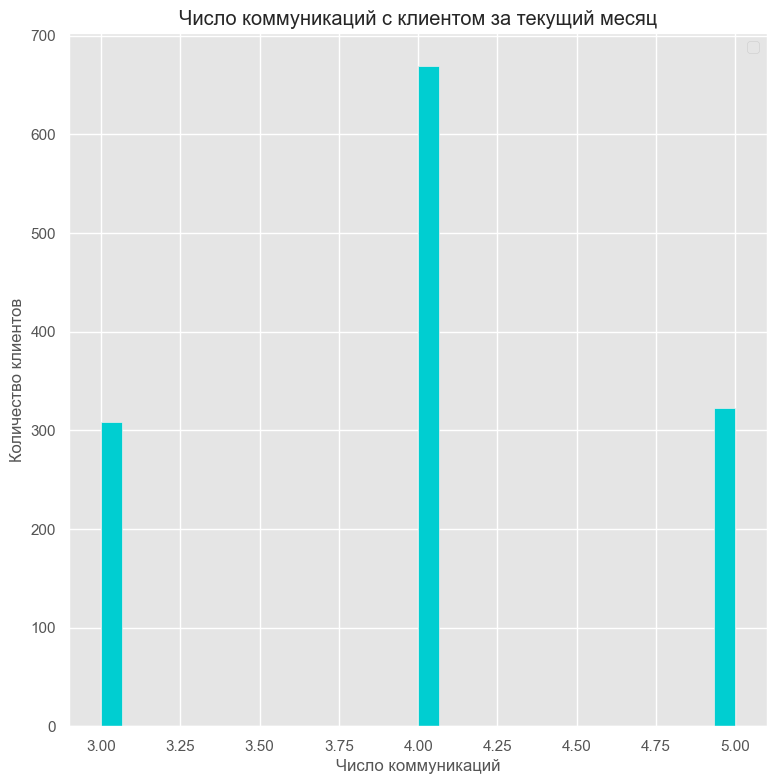

In [362]:
market_customer_df['маркет актив тек мес'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Число коммуникаций с клиентом за текущий месяц')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Число коммуникаций')
plt.show()

Если судить по пикам, можно увидеть подобие нормального распределения (при этом явно видим моду - 4 коммуникации).

Попробуем поступить следующим образом: сделаем из этого количественного признака категориальный:
- `маркет актив тек мес категориальный (3.5,4.5)` - будет иметь значения `низкий`, `средний`, `высокий` при `маркет актив тек мес` меньше 3.5, от 3.5 до 4.5, выше 4.5 (соответственно),

Из двух получившихся признаков при корреляционном анализе данных выкинем наименее полезные:

In [363]:
market_customer_df['маркет актив тек мес категориальный (3.5,4.5)'] = market_customer_df['маркет актив тек мес'].apply(
    lambda x : 'низкий' if x < 3.5 else 'средний' if x <= 4.5 else 'высокий'
)

Построим график нового признака:

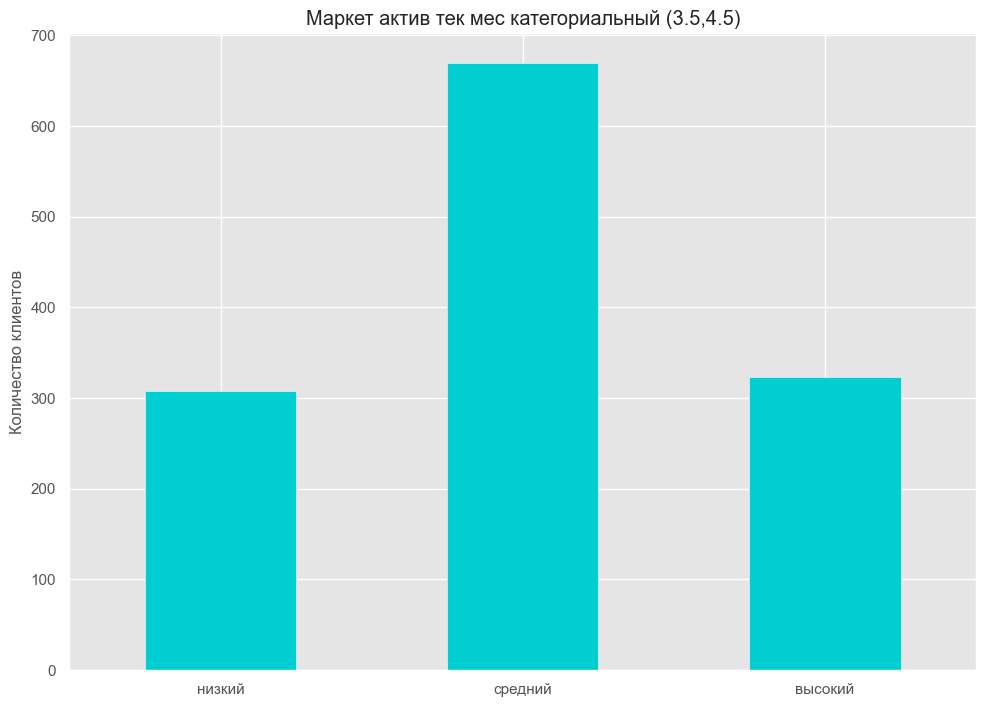

In [364]:
cat = market_customer_df.pivot_table(index='маркет актив тек мес категориальный (3.5,4.5)', values='id', aggfunc='count')
cat.columns = ['count']
cat.sort_index(key=get_greatness, ascending=True, inplace=True)

cat.plot.bar(title='Маркет актив тек мес категориальный (3.5,4.5)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')

plt.show()

Видим небольшой дисбаланс. Будем смотреть, как новый признак покажет себя дальше.

###### длительность

Построим гистограмму:

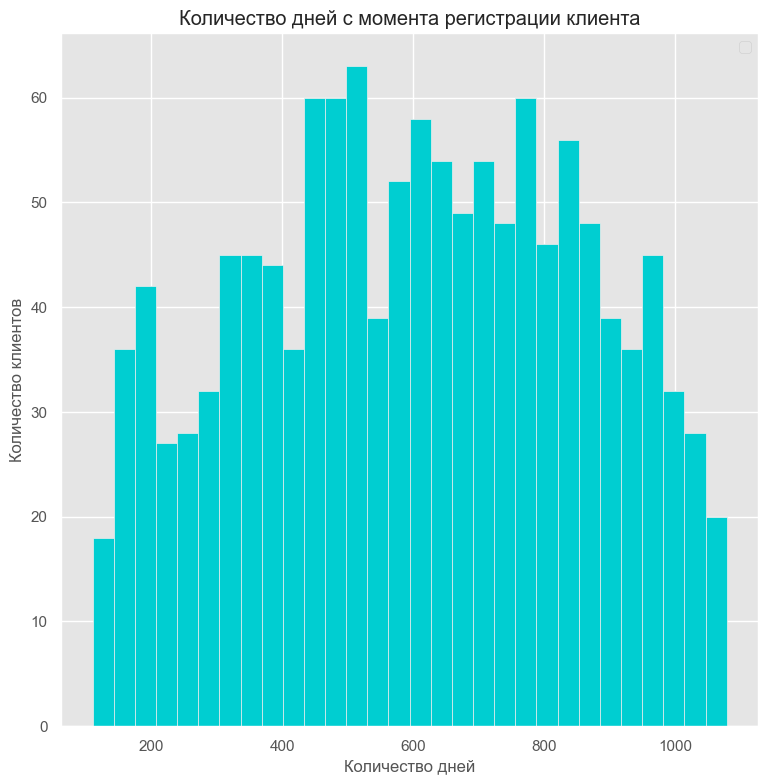

In [365]:
market_customer_df['длительность'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Количество дней с момента регистрации клиента')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Количество дней')
plt.show()

Распределение похоже на равномерное с небольшим подъемом к центру (скорее всего, на сайте каждый день регистрируется примерно одинаковое количество людей). Что-то еще о таком распределении сказать сложно. Построим боксплот:

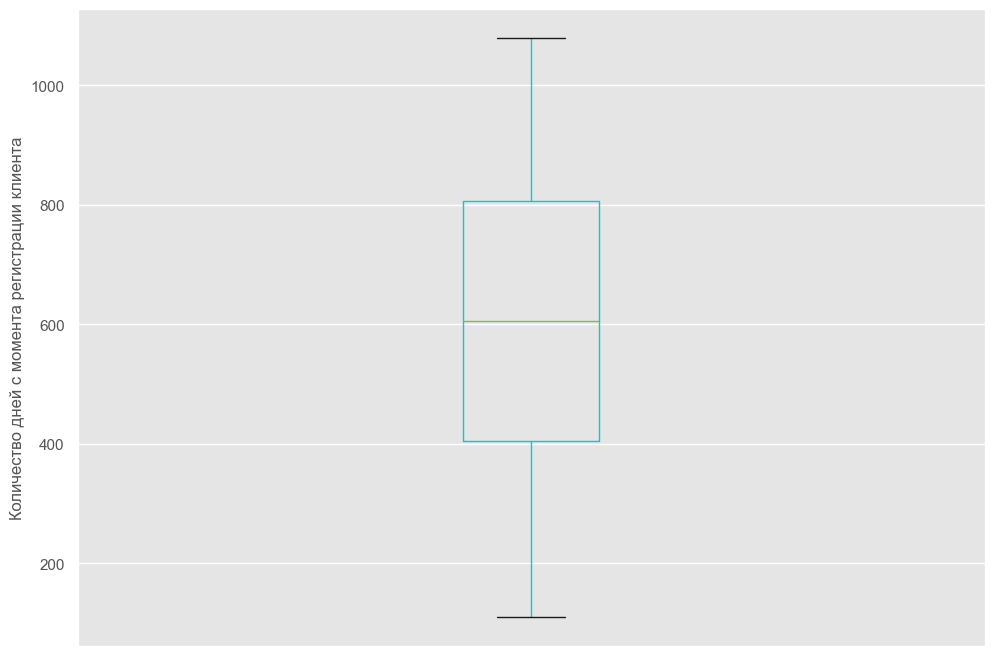

In [366]:
market_customer_df.boxplot('длительность')
plt.ylabel('Количество дней с момента регистрации клиента')
plt.xticks([])
plt.show()

Все значения находятся в пределах нормы. Возможно, во время подготовки данных к обучению удастся выловить нелинейную связь этого признака с целевым. Пока ничего больше о нем сказать нельзя.

###### акционные покупки

Построим гистограмму:

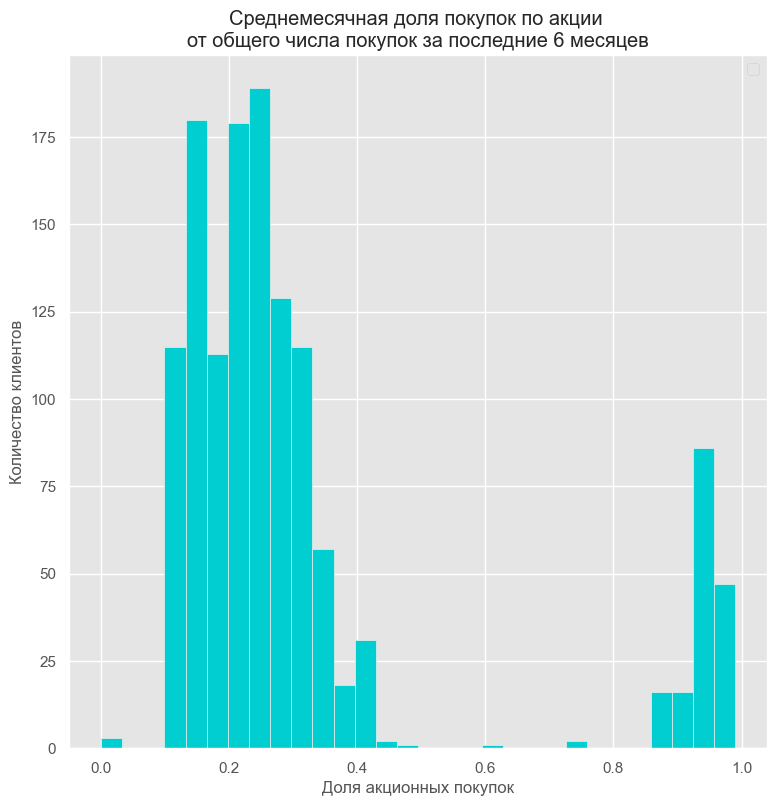

In [367]:
market_customer_df['акционные покупки'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Среднемесячная доля покупок по акции \nот общего числа покупок за последние 6 месяцев')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Доля акционных покупок')
plt.show()

Здесь точно можно выделить категориальный признак с разделением в районе 0.7. Добавим этот признак:

In [368]:
market_customer_df['акционные покупки категориальный (0.7)'] = market_customer_df['акционные покупки'].apply(
    lambda x : 'низкий' if x < 0.7 else 'высокий'
)

Построим график нового признака:

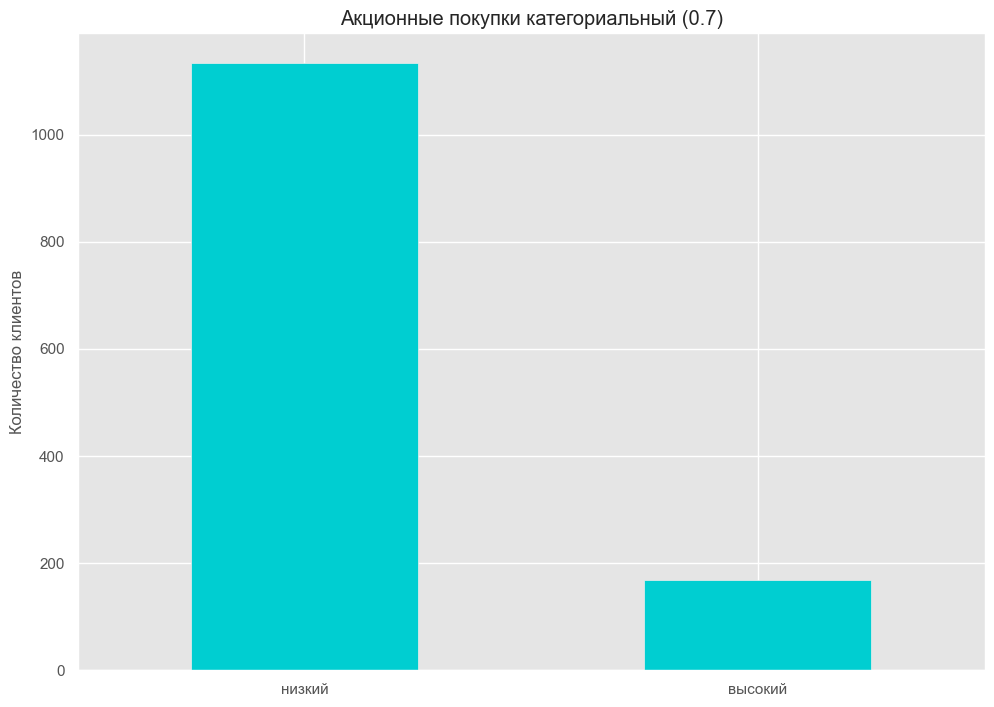

In [369]:
cat = market_customer_df.pivot_table(index='акционные покупки категориальный (0.7)', values='id', aggfunc='count')
cat.columns = ['count']
cat.sort_index(key=get_greatness, ascending=True, inplace=True)

cat.plot.bar(title='Акционные покупки категориальный (0.7)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')

plt.show()

Снова видим дисбаланс. Оставим признак в таблице.

###### средний просмотр категорий за визит

Построим гистограмму:

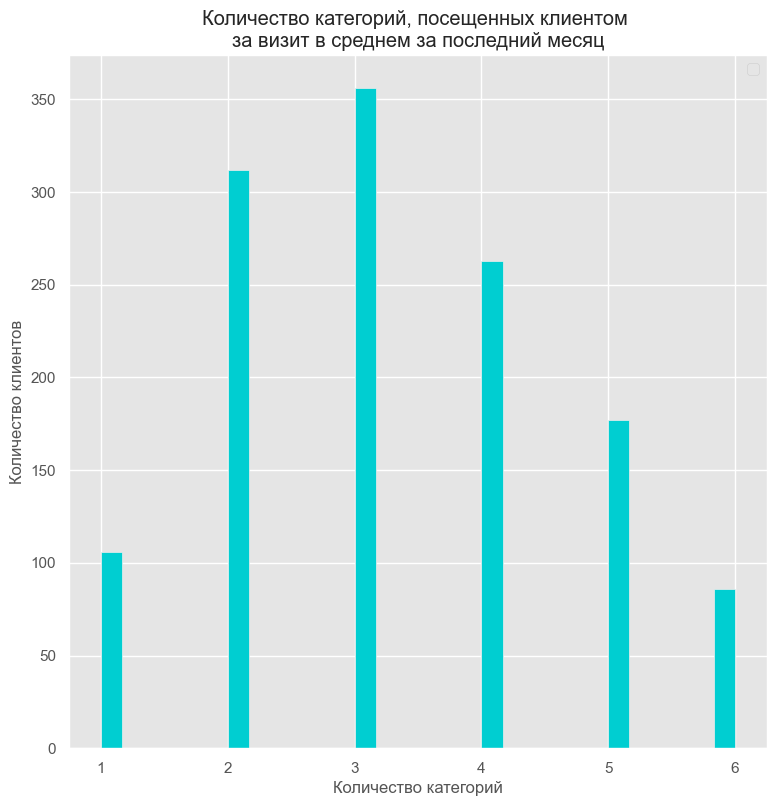

In [370]:
market_customer_df['средний просмотр категорий за визит'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Количество категорий, посещенных клиентом \nза визит в среднем за последний месяц')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Количество категорий')
plt.show()

Распределение похоже на нормальное со сдвигом влево. Построим боксплот:

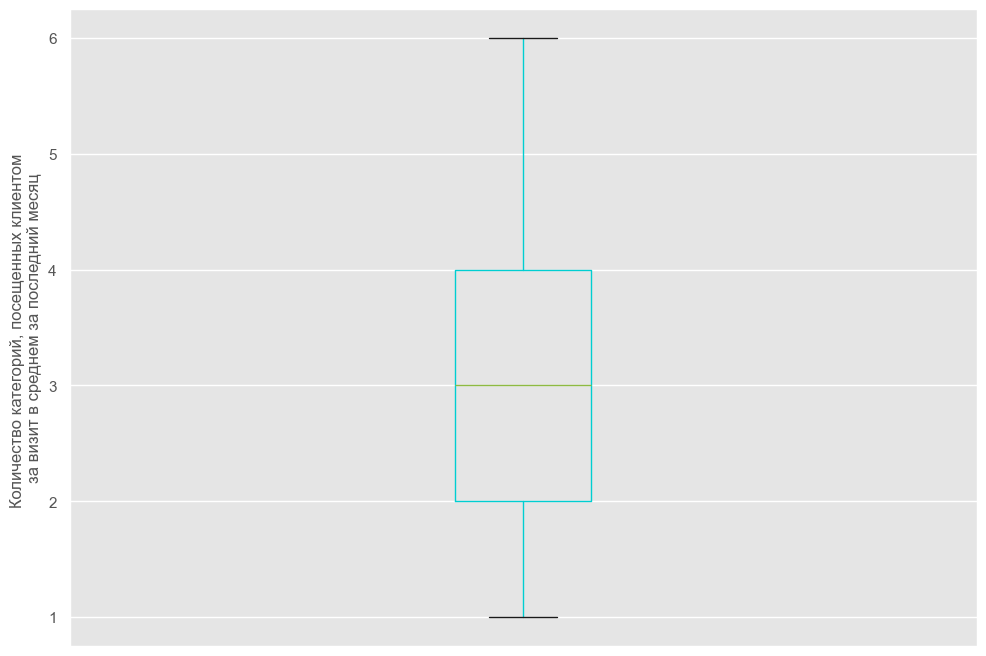

In [371]:
market_customer_df.boxplot('средний просмотр категорий за визит')
plt.ylabel('Количество категорий, посещенных клиентом \nза визит в среднем за последний месяц')
plt.xticks([])
plt.show()

Все значения находятся в пределах нормы. В целом кажется, что обработки в рамках исследовательского анализа данных этому признаку не нужно.

###### неоплаченные продукты штук квартал

Построим гистограмму:

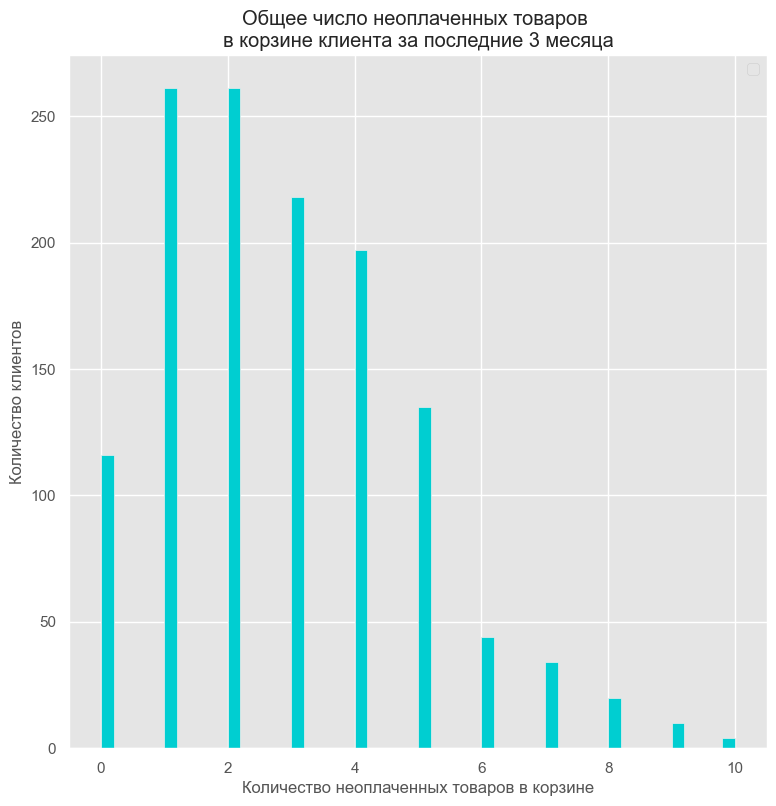

In [372]:
market_customer_df['неоплаченные продукты штук квартал'].plot.hist(bins=50, figsize=(9, 9))
plt.title('Общее число неоплаченных товаров \nв корзине клиента за последние 3 месяца')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Количество неоплаченных товаров в корзине')
plt.show()

Попробуем поступить следующим образом: сделаем из этого количественного признака два категориальных:
- `неоплаченные продукты штук квартал категориальный (1,5)` - будет иметь значения `низкий`, `средний`, `высокий` при `неоплаченные продукты штук квартал` меньше 1, от 1 до 5, выше 5 (соответственно),
- `маркет актив 6 мес категориальный (5)`- будет иметь значения `низкий`, `высокий` при `неоплаченные продукты штук квартал` меньше 5 и больше либо равно 5 (соответственно):

In [373]:
market_customer_df['неоплаченные продукты штук квартал категориальный (1,5)'] = market_customer_df['неоплаченные продукты штук квартал'].apply(
    lambda x : 'низкий' if x < 1 else 'средний' if x <= 5 else 'высокий'
)
market_customer_df['неоплаченные продукты штук квартал категориальный (5)'] = market_customer_df['неоплаченные продукты штук квартал'].apply(
    lambda x : 'низкий' if x <= 5 else 'высокий'
)

Построим графики новых признаков:

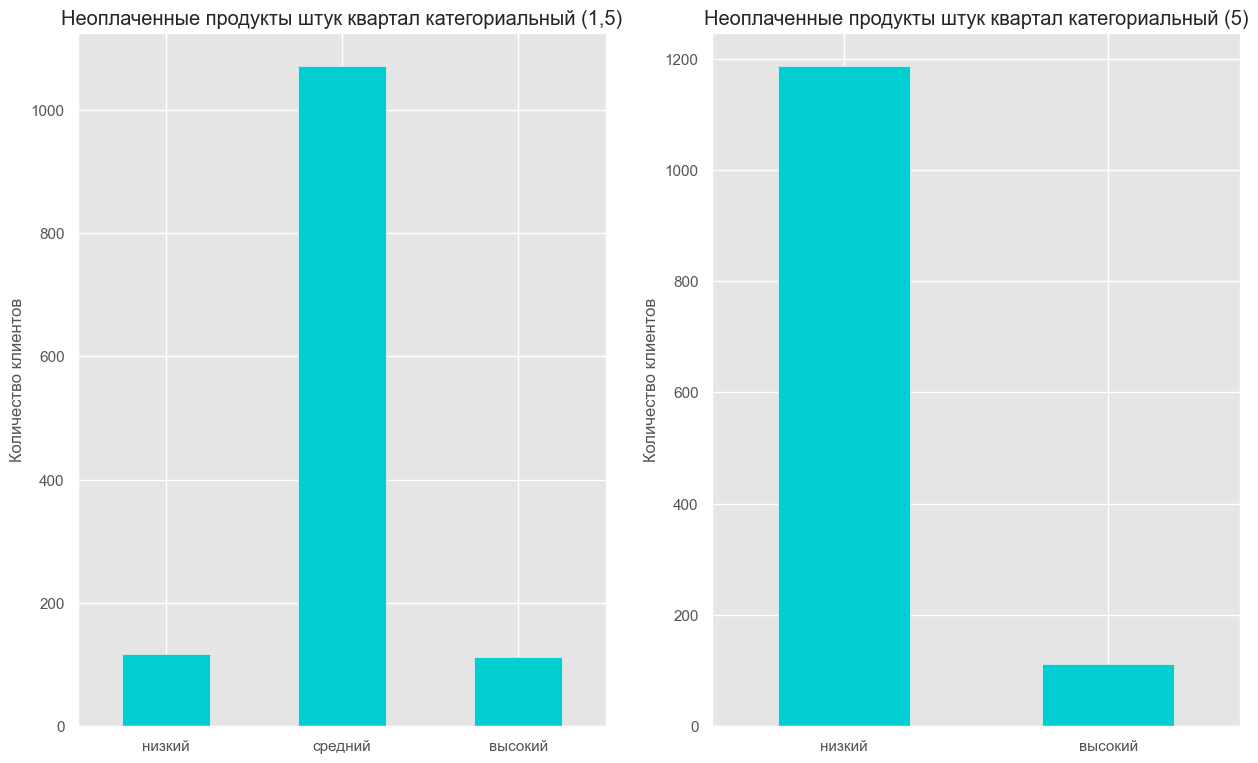

In [374]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,9))

cat_1_5 = market_customer_df.pivot_table(index='неоплаченные продукты штук квартал категориальный (1,5)', values='id', aggfunc='count')
cat_1_5.columns = ['count']
cat_1_5.sort_index(key=get_greatness, ascending=True, inplace=True)

cat_1_5.plot.bar(ax=axes[0],
                 title='Неоплаченные продукты штук квартал категориальный (1,5)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')

cat_5 = market_customer_df.pivot_table(index='неоплаченные продукты штук квартал категориальный (5)', values='id', aggfunc='count')
cat_5.columns = ['count']
cat_5.sort_index(key=get_greatness, ascending=True, inplace=True)

cat_5.plot.bar(ax=axes[1],
                 title='Неоплаченные продукты штук квартал категориальный (5)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')
plt.show()

Налицо сильный дисбаланс. Если один из получившихся категориальных признаков по результатам корреляционного анализа будет предпочтительнее количественного, необходимо будет это учесть при обучении модели.

###### ошибка сервиса

Построим гистограмму:

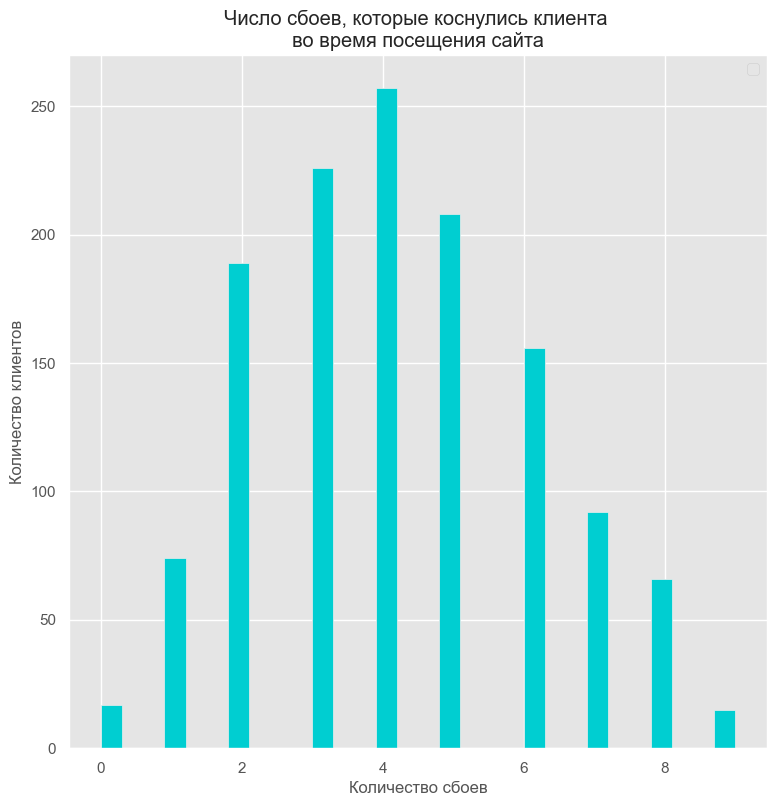

In [375]:
market_customer_df['ошибка сервиса'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Число сбоев, которые коснулись клиента \nво время посещения сайта')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Количество сбоев')
plt.show()

В целом распределение похоже на нормальное. Тем не менее есть некоторые переходы, которые более резки, чем в нормальном распределении (ок. 2 и 5).

Попробуем вынести новый категориальный признак:

In [376]:
market_customer_df['ошибка сервиса категориальный (2,5)'] = market_customer_df['ошибка сервиса'].apply(
    lambda x : 'низкий' if x < 2 else 'средний' if x <= 5 else 'высокий'
)

Также вынесем признак, отделяющий только большие значения признака:

In [377]:
market_customer_df['ошибка сервиса категориальный (5)'] = market_customer_df['ошибка сервиса'].apply(
    lambda x : 'низкий' if x <= 5 else 'высокий'
)

Построим график нового признака:

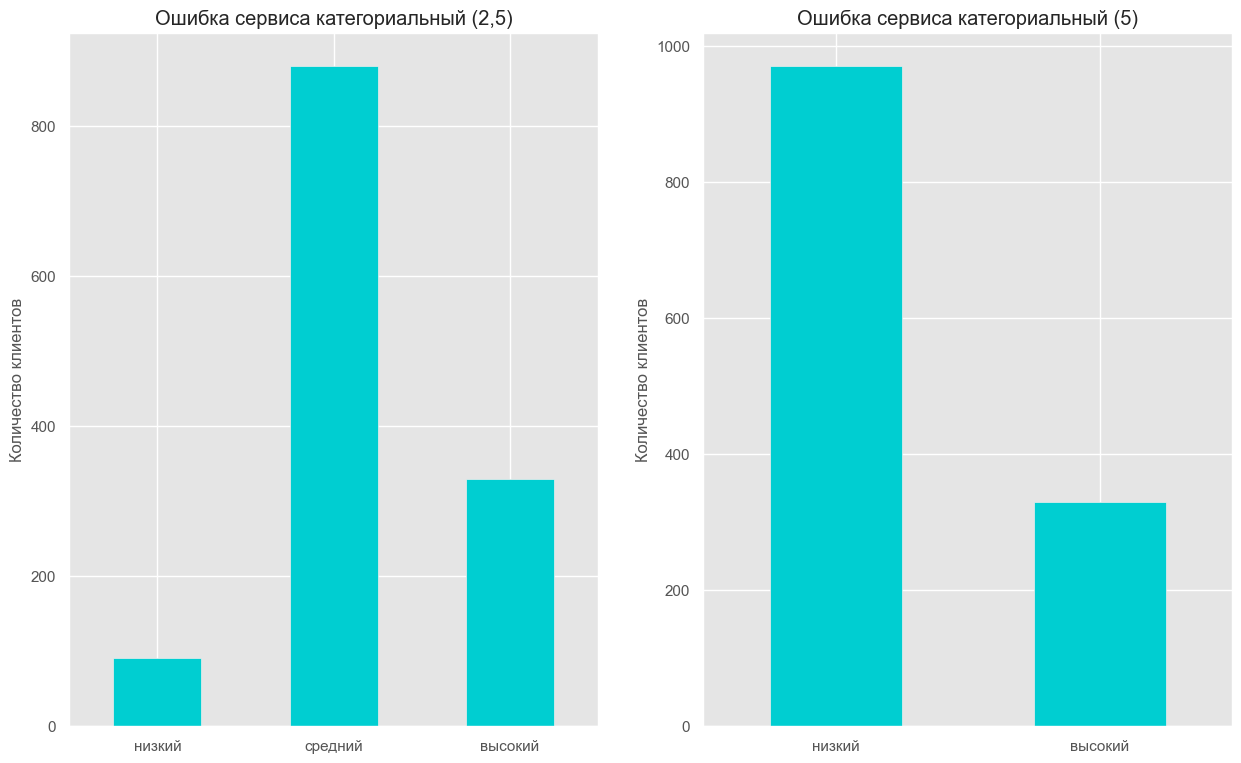

In [378]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,9))

cat_2_5 = market_customer_df.pivot_table(index='ошибка сервиса категориальный (2,5)', values='id', aggfunc='count')
cat_2_5.columns = ['count']
cat_2_5.sort_index(key=get_greatness, ascending=True, inplace=True)

cat_2_5.plot.bar(ax=axes[0],
                 title='Ошибка сервиса категориальный (2,5)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')

cat_5 = market_customer_df.pivot_table(index='ошибка сервиса категориальный (5)', values='id', aggfunc='count')
cat_5.columns = ['count']
cat_5.sort_index(key=get_greatness, ascending=True, inplace=True)

cat_5.plot.bar(ax=axes[1],
                 title='Ошибка сервиса категориальный (5)',
                 legend='',
                 rot=0,
                 xlabel='',
                 ylabel='Количество клиентов')
plt.show()

Оставим признаки в таблице. Может быть, они помогут с дальнейшим анализом.

###### страниц за визит

Построим гистограмму:

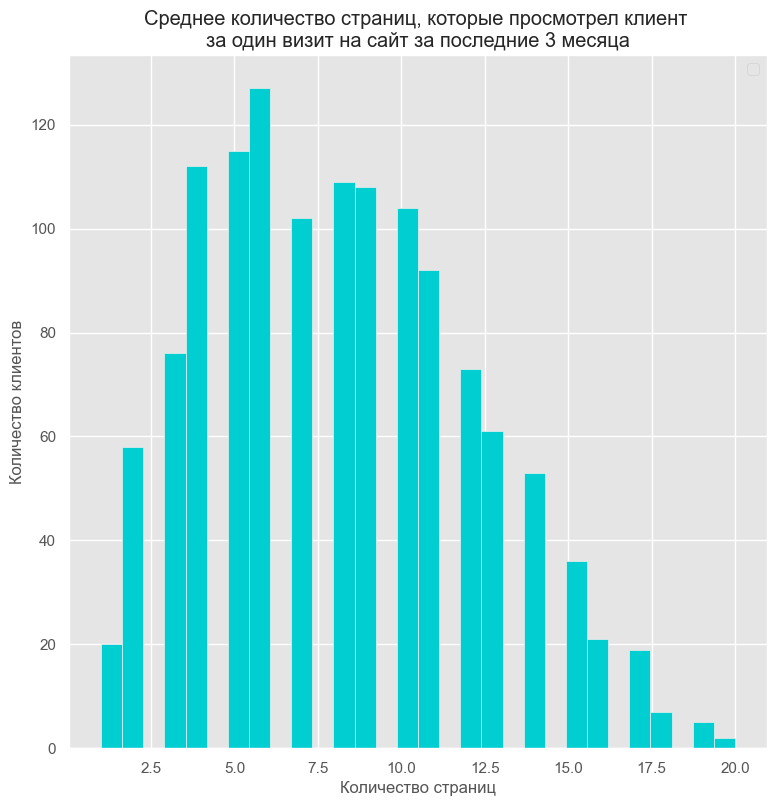

In [379]:
market_customer_df['страниц за визит'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Среднее количество страниц, которые просмотрел клиент \nза один визит на сайт за последние 3 месяца')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Количество страниц')
plt.show()

Выглядит как два наложенных друг на друга нормальных распределения со сдвигом влево. Как-либо обработать этот признак пока не получится, оставим его как есть.

###### market_money_df

Выведем таблицу:

In [380]:
market_money_df.head()

id               период  выручка
0  215348  препредыдущий месяц      0.0
1  215348        текущий месяц   3293.1
2  215348     предыдущий месяц      0.0
3  215349  препредыдущий месяц   4472.0
4  215349        текущий месяц   4971.6

Количественными является следующий признак:

- `выручка`.

Проанализируем его.

###### выручка

Построим гистограмму:

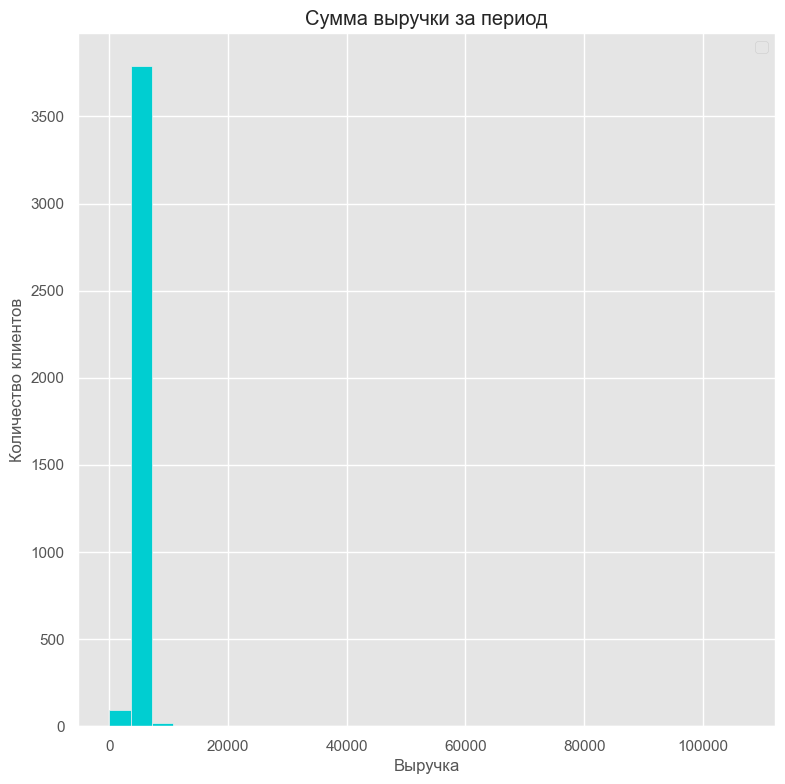

In [381]:
market_money_df['выручка'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Сумма выручки за период')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Выручка')
plt.show()

Выбросы точно имеют место. Построим боксплот:

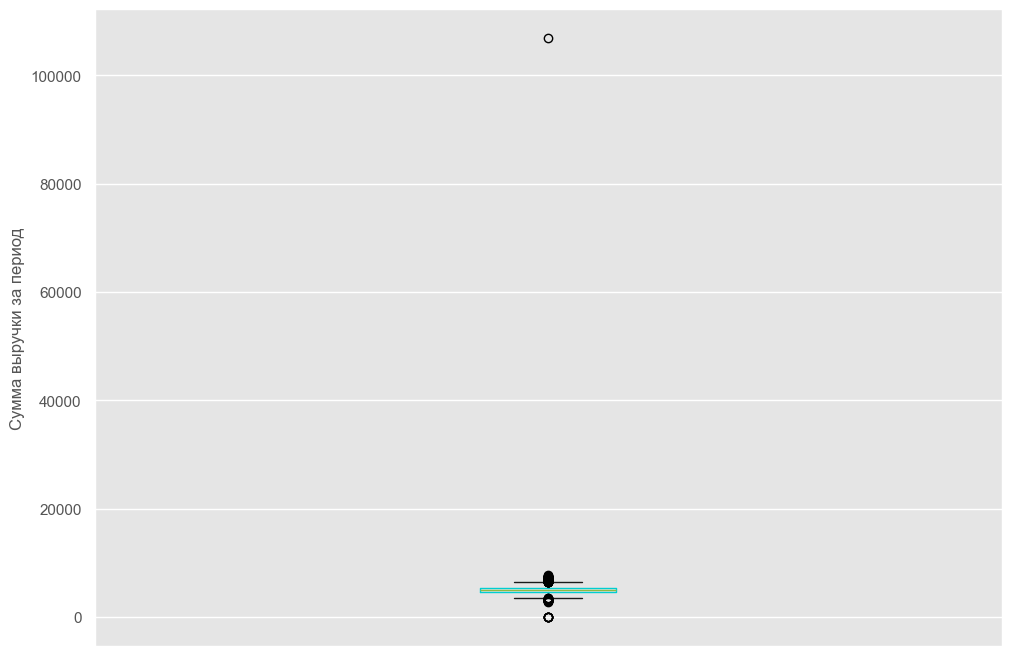

In [382]:
market_money_df.boxplot('выручка')
plt.ylabel('Cумма выручки за период')
plt.xticks([])
plt.show()

In [383]:
market_money_df['выручка'].describe()

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

Выведем выбивающиеся строки:

In [384]:
market_money_df.query('выручка > 100000')

id         период   выручка
98  215380  текущий месяц  106862.2

Непонятно, является ли это значение аномалией: какой-нибудь из пользователей вполне мог накупить товаров на 100000 рублей в текущем месяце. Тогда прибыль, принесенная магазину этим пользователем, также резко отличалась бы от медианной. Проверим:

In [385]:
money_df.query('id == 215380')

id  прибыль
32  215380     3.88

In [386]:
money_df['прибыль'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

Прибыль в 3.38 у.е. сравнима с медианой в 4, поэтому можно предположить, что выброс - аномалия. Однако сложно сказать, какое число подразумевалось вместо 100000, поэтому легче это значение удалить.

In [387]:
market_money_df = market_money_df.query('выручка < 100000')

Рассмотрим гистограмму:

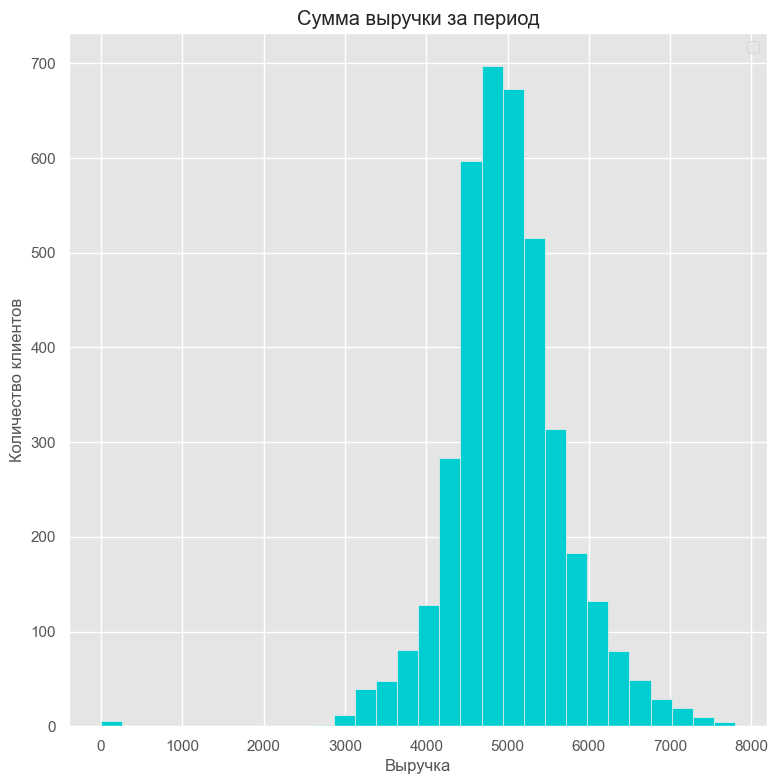

In [388]:
market_money_df.query('выручка < 100000')['выручка'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Сумма выручки за период')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Выручка')
plt.show()

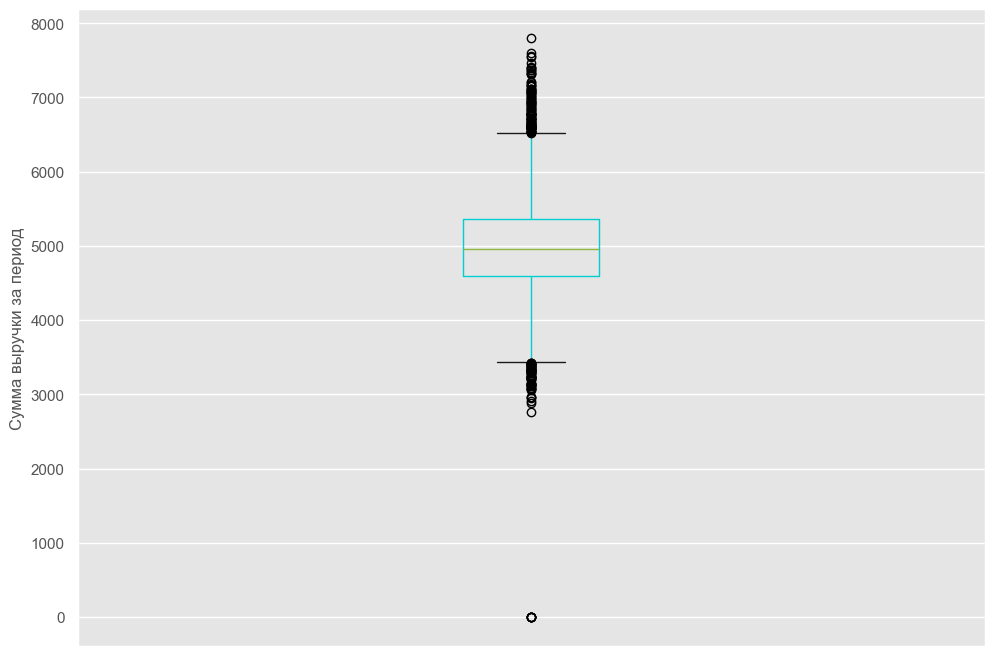

In [389]:
market_money_df.boxplot('выручка')
plt.ylabel('Cумма выручки за период')
plt.xticks([])
plt.show()

Видим выбросы в районе 0. Но совершенно логично, что некоторые клиенты не совершали покупок в определенные периоды. Так что не будем трогать эти значения.

###### market_time_df

Выведем таблицу:

In [390]:
market_time_df.head()

id            период  минут
0  215348     текущий месяц     14
1  215348  предыдущий месяц     13
2  215349     текущий месяц     10
3  215349  предыдущий месяц     12
4  215350     текущий месяц     13

Количественными является следующий признак:

- `минут`.

Проанализируем его.

###### минут

Построим гистограмму:

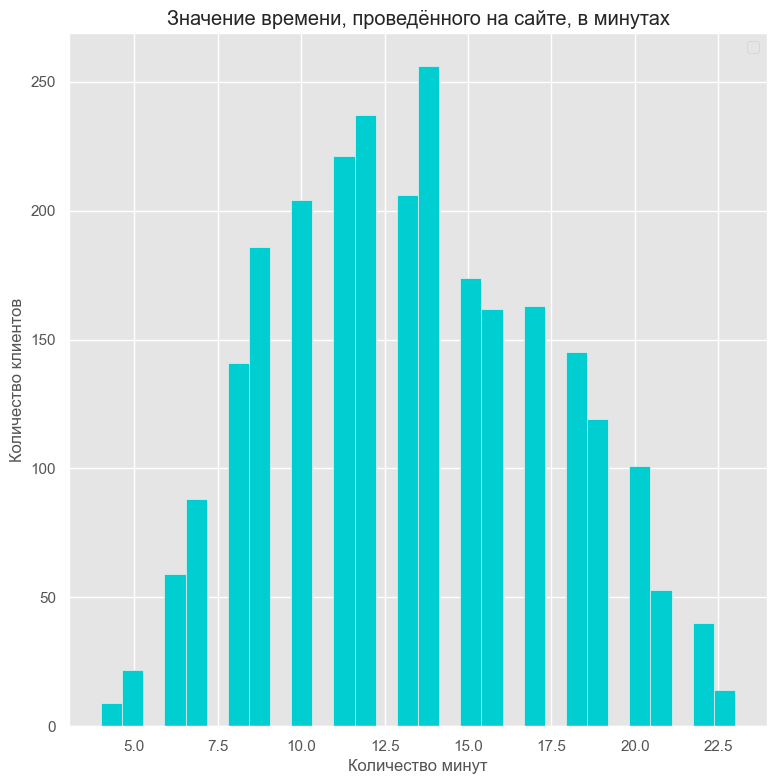

In [391]:
market_time_df['минут'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Значение времени, проведённого на сайте, в минутах')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Количество минут')
plt.show()

Распределение похоже на нормальное. Построим боксплот:

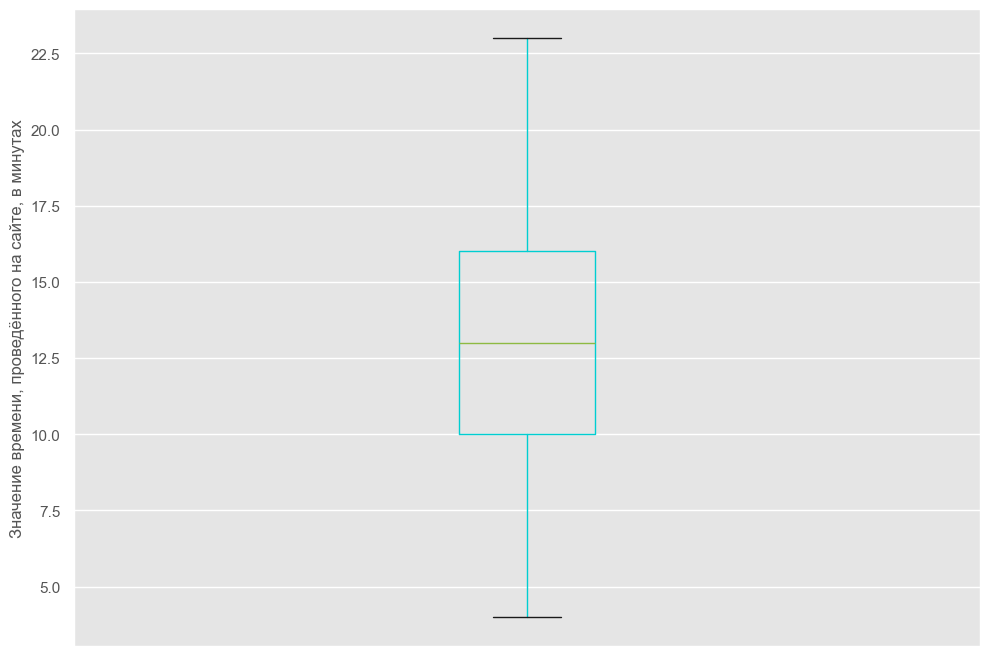

In [392]:
market_time_df.boxplot('минут')
plt.ylabel('Значение времени, проведённого на сайте, в минутах')
plt.xticks([])
plt.show()

In [393]:
market_time_df['минут'].describe()

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

Все значения находятся в пределах нормы. При этом среднее почти совпадает с медианой. Обработка не требуется.

###### money_df

Выведем таблицу:

In [394]:
money_df.head()

id  прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

Количественными является следующий признак:

- `прибыль`.

Проанализируем его.

###### прибыль

Построим гистограмму:

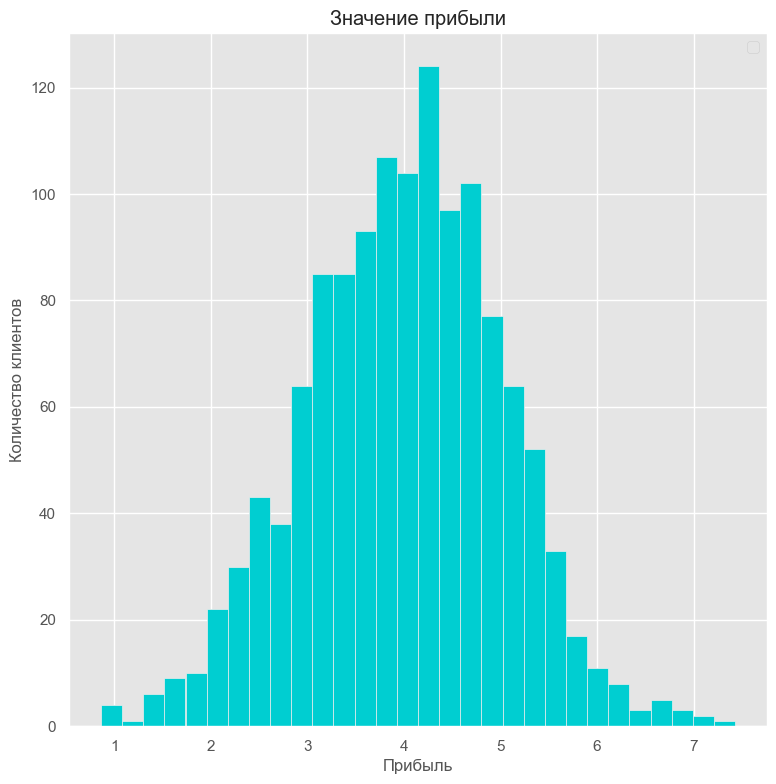

In [395]:
money_df['прибыль'].plot.hist(bins=30, figsize=(9, 9))
plt.title('Значение прибыли')
plt.legend(labels=[])
plt.ylabel('Количество клиентов')
plt.xlabel('Прибыль')
plt.show()

Распределение похоже на нормальное. Построим боксплот:

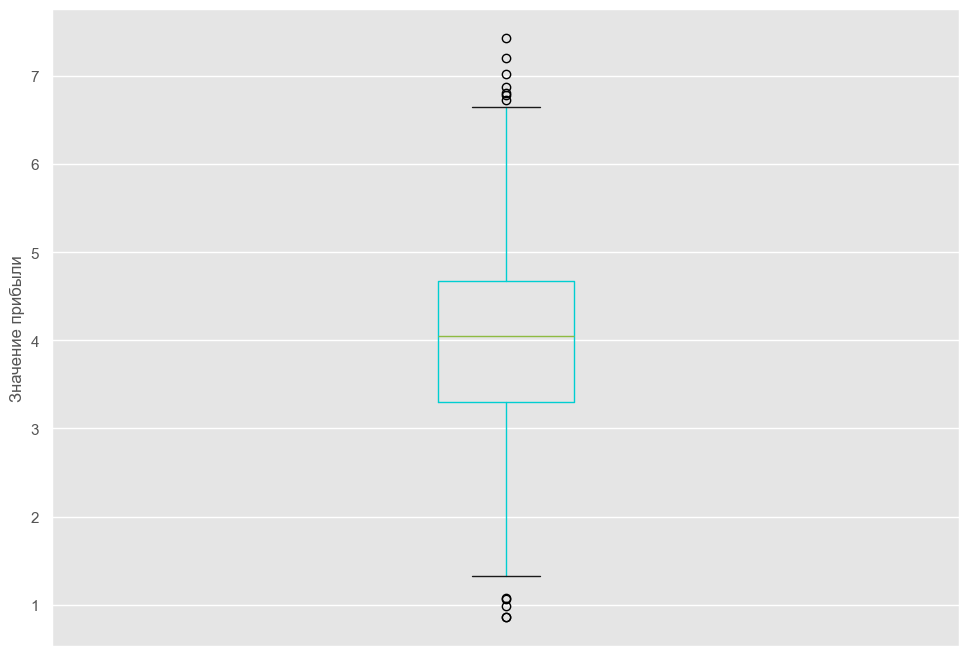

In [396]:
money_df.boxplot('прибыль')
plt.ylabel('Значение прибыли')
plt.xticks([])
plt.show()

In [397]:
money_df['прибыль'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

Значения мало отклоняются от нормы. Обработка не требуется.

#### Анализ категориальных признаков

Далее исследуем категориальные признаки.

###### market_customer_df

Выведем таблицу:

In [398]:
market_customer_df.head()

id покупательская активность тип сервиса разрешить сообщать  \
0  215348                 снизилась     премиум                 да   
1  215349                 снизилась     премиум                 да   
2  215350                 снизилась    стандарт                нет   
3  215351                 снизилась    стандарт                 да   
4  215352                 снизилась    стандарт                нет   

   маркет актив 6 мес  маркет актив тек мес  длительность  акционные покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная категория  средний просмотр категорий за визит  ...  \
0     товары для детей                                    6  ...   
1     товары для детей                                    4  ...   
2    домашний текстиль                                    5  ...   
3     товары для детей                                    5  ...   
4     товары для детей                                    3  ...   

   ошибка сервиса  страниц за визит  маркет актив 6 мес категориальный (2,6)  \
0               1                 5                                  средний   
1               2                 5                                  средний   
2               1                 5                                  средний   
3               6                 4                                  средний   
4               3                 2                                  средний   

  маркет актив 6 мес категориальный (3,6)  \
0                                 средний   
1                                 средний   
2                                 средний   
3                                 средний   
4                                 средний   

  маркет актив тек мес категориальный (3.5,4.5)  \
0                                       высокий   
1                                       средний   
2                                        низкий   
3                                       высокий   
4                                        низкий   

  акционные покупки категориальный (0.7)  \
0                                 низкий   
1                                высокий   
2                                 низкий   
3                                высокий   
4                                высокий   

  неоплаченные продукты штук квартал категориальный (1,5)  \
0                                            средний        
1                                            средний        
2                                            средний        
3                                             низкий        
4                                            средний        

  неоплаченные продукты штук квартал категориальный (5)  \
0                                             низкий      
1                                             низкий      
2                                             низкий      
3                                             низкий      
4                                             низкий      

  ошибка сервиса категориальный (2,5) ошибка сервиса категориальный (5)  
0                              низкий                            низкий  
1                             средний                            низкий  
2                              низкий                            низкий  
3                             высокий                           высокий  
4                             средний                            низкий  

[5 rows x 21 columns]

Категориальными являются следующие признаки:

- `покупательская активность` (целевой);
- `тип сервиса`;
- `разрешить сообщать`;
- `популярная категория`.

Проанализируем их. Для этого напишем функцию для построения графика:

In [399]:
def show_bar(name, table, ax):
    pivot = table.pivot_table(index=name, values='id', aggfunc='count')
    pivot.columns = ['count']
    pivot.sort_values(by='count', ascending=True, inplace=True)

    return pivot.plot.bar(title=name,
                   legend='',
                   xlabel='',
                   ylabel='Количество пользователей',
                   rot=0,
                   ax=ax)

Построим графики категориальных признаков:

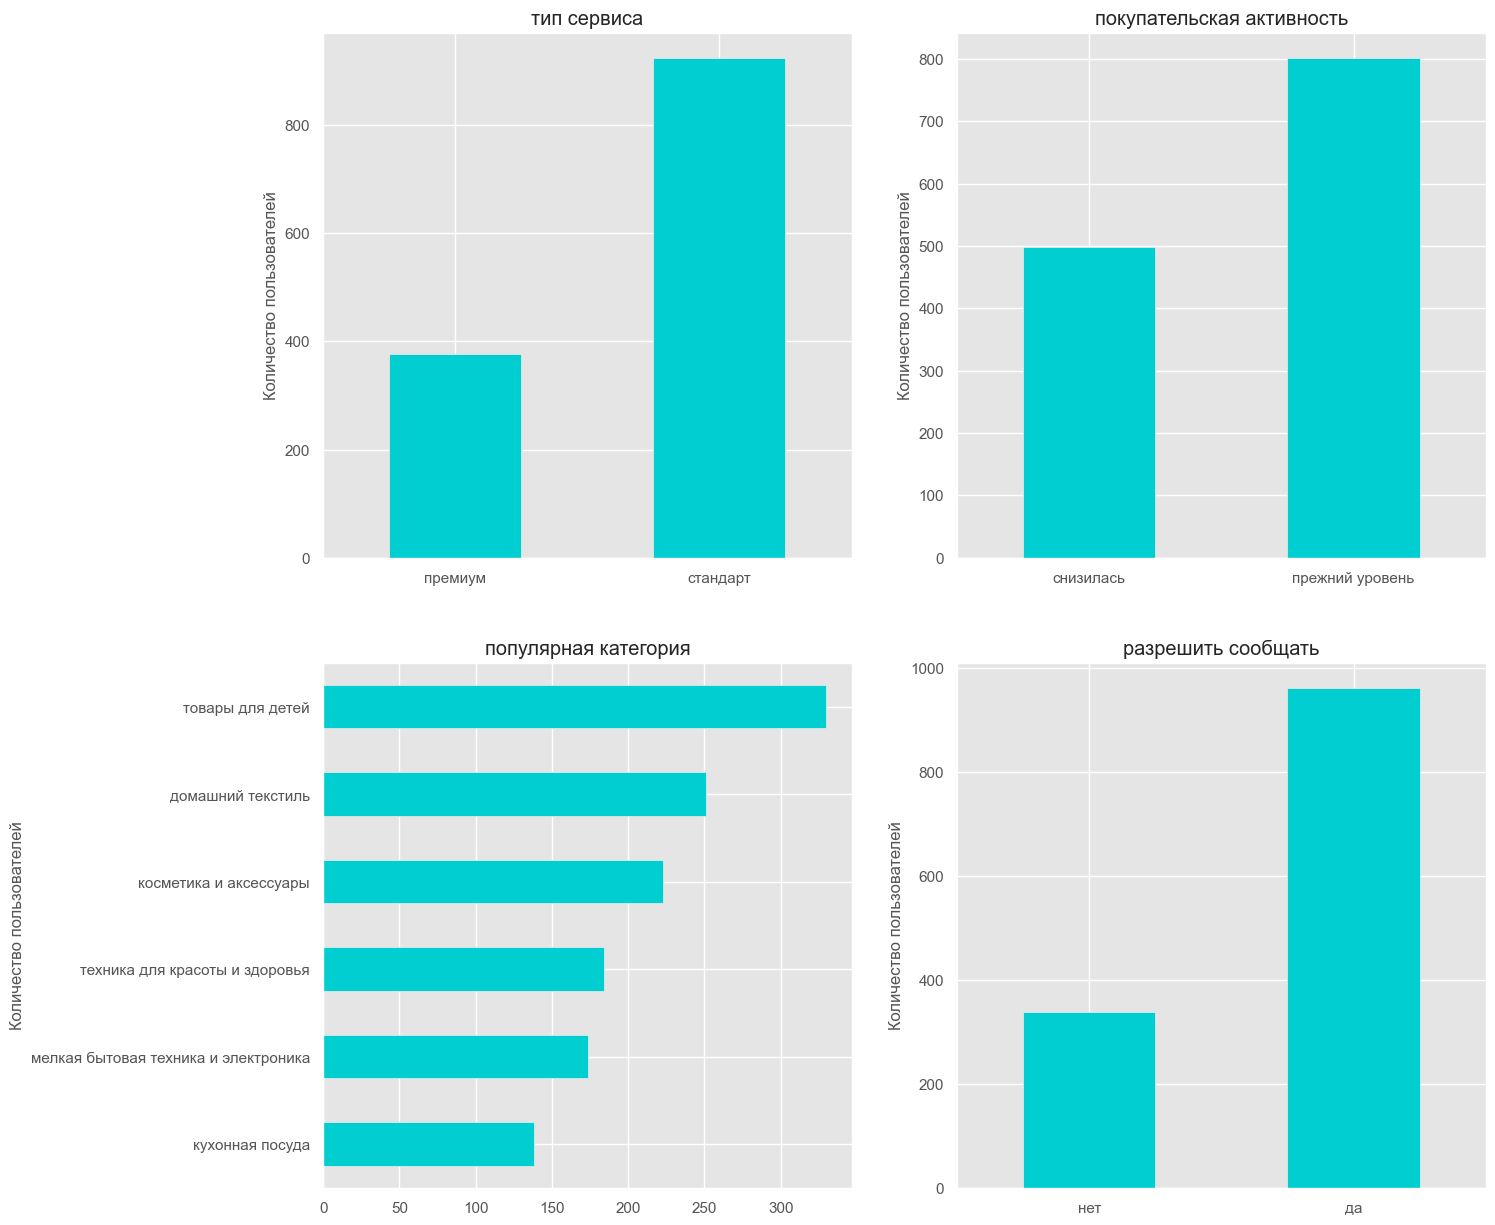

In [400]:
cat_col_names = ['покупательская активность',
                 'тип сервиса',
                 'разрешить сообщать']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

for i in range(0, 3):
    show_bar(cat_col_names[i], market_customer_df, axes[i // 2, 1 - i % 2])

pivot = market_customer_df.pivot_table(index='популярная категория', values='id', aggfunc='count')
pivot.columns = ['count']
pivot.sort_values(by='count', ascending=True, inplace=True)

pivot.plot.barh(title='популярная категория',
                legend='',
                xlabel='',
                ylabel='Количество пользователей',
                rot=0,
                ax=axes[1, 0])

plt.show()

Видим, что пользователи в основном разрешают сообщать об акциях, предпочитают домашний текстиль и товары для детей, пользуются стандартной версией сервиса. Главное, что можно вынести из графиков - необходимость обратить особое внимание на дисбаланс классов целевого признака (`покупательская активность`).

###### market_money_df

Выведем таблицу:

In [401]:
market_money_df.head()

id               период  выручка
0  215348  препредыдущий месяц      0.0
1  215348        текущий месяц   3293.1
2  215348     предыдущий месяц      0.0
3  215349  препредыдущий месяц   4472.0
4  215349        текущий месяц   4971.6

Категориальным является следующий признак:

- `период`.

Проанализируем его. Выведем график:

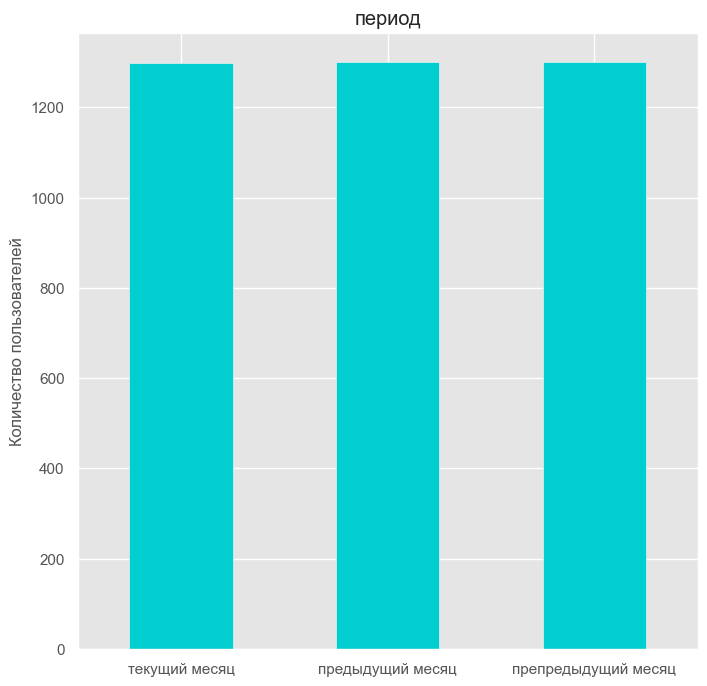

In [402]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
show_bar('период', market_money_df, axes)
plt.show()

Видим, что данные предоставлены за каждый месяц в одном и том же объеме.

###### market_time_df

Выведем таблицу:

In [403]:
market_time_df.head()

id            период  минут
0  215348     текущий месяц     14
1  215348  предыдущий месяц     13
2  215349     текущий месяц     10
3  215349  предыдущий месяц     12
4  215350     текущий месяц     13

Категориальным является следующий признак:

- `период`.

Проанализируем его. Выведем график:

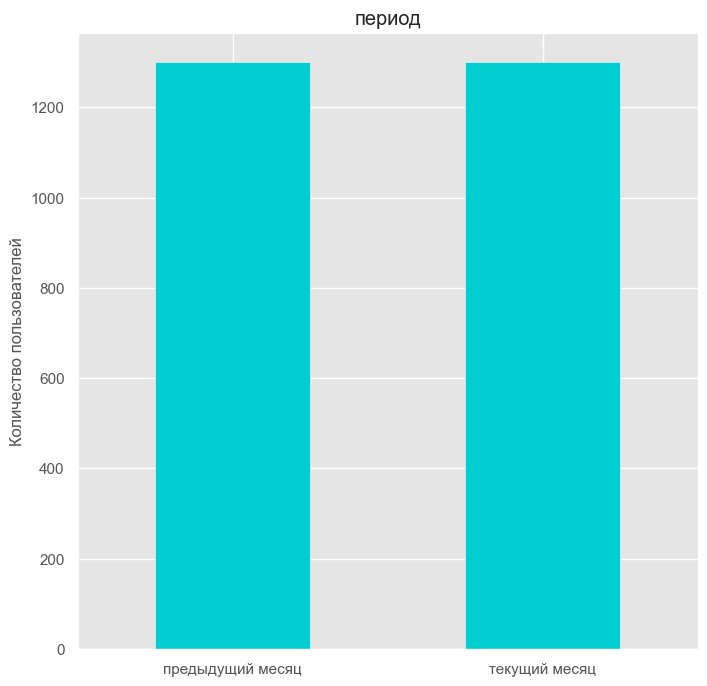

In [404]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
show_bar('период', market_time_df, axes)
plt.show()

Видим, что данные предоставлены за каждый месяц в одном и том же объеме.

###### money_df

Выведем таблицу:

In [405]:
money_df.head()

id  прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

Данный датасет не содержит пригодных для анализа категориальных признаков.

#### Отбор активных пользователей

Далее необходимо отобрать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в каждый из месяцев. Для этого обратимся к датасету `market_money_df`: найдем в нем такие id пользователей, для которых произведение выручки за три месяца больше нуля (если результат равен нулю, то один из множителей - тоже):

In [406]:
active_users = market_money_df[['id', 'выручка']].groupby('id').prod().query('выручка > 0')
active_users.head()

выручка
id                  
215349  1.159673e+11
215350  1.332276e+11
215351  1.951079e+11
215352  1.566763e+11
215353  1.308332e+11

Пометим активными тех пользователей, id которых попал в получившуюся таблицу:

In [407]:
active_users_idx = list(active_users.index)
market_customer_df['активность за три месяца'] = market_customer_df['id'].apply(
    lambda x : 'да' if x in active_users_idx else 'нет'
)

In [408]:
market_customer_df.head()

id покупательская активность тип сервиса разрешить сообщать  \
0  215348                 снизилась     премиум                 да   
1  215349                 снизилась     премиум                 да   
2  215350                 снизилась    стандарт                нет   
3  215351                 снизилась    стандарт                 да   
4  215352                 снизилась    стандарт                нет   

   маркет актив 6 мес  маркет актив тек мес  длительность  акционные покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная категория  средний просмотр категорий за визит  ...  \
0     товары для детей                                    6  ...   
1     товары для детей                                    4  ...   
2    домашний текстиль                                    5  ...   
3     товары для детей                                    5  ...   
4     товары для детей                                    3  ...   

   страниц за визит  маркет актив 6 мес категориальный (2,6)  \
0                 5                                  средний   
1                 5                                  средний   
2                 5                                  средний   
3                 4                                  средний   
4                 2                                  средний   

   маркет актив 6 мес категориальный (3,6)  \
0                                  средний   
1                                  средний   
2                                  средний   
3                                  средний   
4                                  средний   

  маркет актив тек мес категориальный (3.5,4.5)  \
0                                       высокий   
1                                       средний   
2                                        низкий   
3                                       высокий   
4                                        низкий   

  акционные покупки категориальный (0.7)  \
0                                 низкий   
1                                высокий   
2                                 низкий   
3                                высокий   
4                                высокий   

  неоплаченные продукты штук квартал категориальный (1,5)  \
0                                            средний        
1                                            средний        
2                                            средний        
3                                             низкий        
4                                            средний        

  неоплаченные продукты штук квартал категориальный (5)  \
0                                             низкий      
1                                             низкий      
2                                             низкий      
3                                             низкий      
4                                             низкий      

  ошибка сервиса категориальный (2,5) ошибка сервиса категориальный (5)  \
0                              низкий                            низкий   
1                             средний                            низкий   
2                              низкий                            низкий   
3                             высокий                           высокий   
4                             средний                            низкий   

  активность за три месяца  
0                      нет  
1                       да  
2                       да  
3                       да  
4                       да  

[5 rows x 22 columns]

Проверим количество неактивных пользователей:

In [409]:
market_customer_df[market_customer_df['активность за три месяца'] == 'нет']

id покупательская активность тип сервиса разрешить сообщать  \
0   215348                 снизилась     премиум                 да   
9   215357                 снизилась    стандарт                 да   
11  215359                 снизилась    стандарт                 да   

    маркет актив 6 мес  маркет актив тек мес  длительность  акционные покупки  \
0                  3.4                     5           121                0.0   
9                  3.9                     5           154                0.0   
11                 4.6                     5           110                0.0   

              популярная категория  средний просмотр категорий за визит  ...  \
0                 товары для детей                                    6  ...   
9   техника для красоты и здоровья                                    3  ...   
11               домашний текстиль                                    4  ...   

    страниц за визит  маркет актив 6 мес категориальный (2,6)  \
0                  5                                  средний   
9                  5                                  средний   
11                 2                                  средний   

    маркет актив 6 мес категориальный (3,6)  \
0                                   средний   
9                                   средний   
11                                  средний   

   маркет актив тек мес категориальный (3.5,4.5)  \
0                                        высокий   
9                                        высокий   
11                                       высокий   

   акционные покупки категориальный (0.7)  \
0                                  низкий   
9                                  низкий   
11                                 низкий   

   неоплаченные продукты штук квартал категориальный (1,5)  \
0                                             средний        
9                                             средний        
11                                            средний        

   неоплаченные продукты штук квартал категориальный (5)  \
0                                              низкий      
9                                              низкий      
11                                             низкий      

   ошибка сервиса категориальный (2,5) ошибка сервиса категориальный (5)  \
0                               низкий                            низкий   
9                              высокий                           высокий   
11                             средний                            низкий   

   активность за три месяца  
0                       нет  
9                       нет  
11                      нет  

[3 rows x 22 columns]

Таких пользователей оказалось три. Удалим их и избавимся от столбца:

In [410]:
market_customer_df = market_customer_df[market_customer_df['активность за три месяца'] == 'да']

In [411]:
market_customer_df.drop('активность за три месяца', axis=1, inplace=True)

In [412]:
market_customer_df.head()

id покупательская активность тип сервиса разрешить сообщать  \
1  215349                 снизилась     премиум                 да   
2  215350                 снизилась    стандарт                нет   
3  215351                 снизилась    стандарт                 да   
4  215352                 снизилась    стандарт                нет   
5  215353                 снизилась    стандарт                 да   

   маркет актив 6 мес  маркет актив тек мес  длительность  акционные покупки  \
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   

  популярная категория  средний просмотр категорий за визит  ...  \
1     товары для детей                                    4  ...   
2    домашний текстиль                                    5  ...   
3     товары для детей                                    5  ...   
4     товары для детей                                    3  ...   
5    домашний текстиль                                    4  ...   

   ошибка сервиса  страниц за визит  маркет актив 6 мес категориальный (2,6)  \
1               2                 5                                  средний   
2               1                 5                                  средний   
3               6                 4                                  средний   
4               3                 2                                  средний   
5               1                 4                                  средний   

  маркет актив 6 мес категориальный (3,6)  \
1                                 средний   
2                                 средний   
3                                 средний   
4                                 средний   
5                                 средний   

  маркет актив тек мес категориальный (3.5,4.5)  \
1                                       средний   
2                                        низкий   
3                                       высокий   
4                                        низкий   
5                                       средний   

  акционные покупки категориальный (0.7)  \
1                                высокий   
2                                 низкий   
3                                высокий   
4                                высокий   
5                                 низкий   

  неоплаченные продукты штук квартал категориальный (1,5)  \
1                                            средний        
2                                            средний        
3                                             низкий        
4                                            средний        
5                                            средний        

  неоплаченные продукты штук квартал категориальный (5)  \
1                                             низкий      
2                                             низкий      
3                                             низкий      
4                                             низкий      
5                                             низкий      

  ошибка сервиса категориальный (2,5) ошибка сервиса категориальный (5)  
1                             средний                            низкий  
2                              низкий                            низкий  
3                             высокий                           высокий  
4                             средний                            низкий  
5                              низкий                            низкий  

[5 rows x 21 columns]

#### Вывод

В процессе исследовательского анализа данных в таблицы был добавлен ряд категориальных признаков. Кроме того, были удалены пользователи, история активности которых не насчитывает трех месяцев.

### Объединение таблиц

Сгруппируем таблицы `market_time_df` и `market_money_df` по периоду:

In [413]:
market_time_grouped_df = market_time_df.set_index(['id', 'период']).минут.unstack().add_prefix('минут ')
market_time_grouped_df.head()

период  минут предыдущий месяц  минут текущий месяц
id                                                 
215348                      13                   14
215349                      12                   10
215350                       8                   13
215351                      11                   13
215352                       8                   11

In [414]:
market_money_grouped_df = market_money_df.set_index(['id', 'период']).выручка.unstack().add_prefix('выручка ')
market_money_grouped_df.head()

период  выручка предыдущий месяц  выручка препредыдущий месяц  \
id                                                              
215348                       0.0                          0.0   
215349                    5216.0                       4472.0   
215350                    5457.5                       4826.0   
215351                    6158.0                       4793.0   
215352                    5807.5                       4594.0   

период  выручка текущий месяц  
id                             
215348                 3293.1  
215349                 4971.6  
215350                 5058.4  
215351                 6610.4  
215352                 5872.5

Объединим таблицы с таблицей `market_customer_df`:

In [415]:
market_customer_df.head()

id покупательская активность тип сервиса разрешить сообщать  \
1  215349                 снизилась     премиум                 да   
2  215350                 снизилась    стандарт                нет   
3  215351                 снизилась    стандарт                 да   
4  215352                 снизилась    стандарт                нет   
5  215353                 снизилась    стандарт                 да   

   маркет актив 6 мес  маркет актив тек мес  длительность  акционные покупки  \
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   

  популярная категория  средний просмотр категорий за визит  ...  \
1     товары для детей                                    4  ...   
2    домашний текстиль                                    5  ...   
3     товары для детей                                    5  ...   
4     товары для детей                                    3  ...   
5    домашний текстиль                                    4  ...   

   ошибка сервиса  страниц за визит  маркет актив 6 мес категориальный (2,6)  \
1               2                 5                                  средний   
2               1                 5                                  средний   
3               6                 4                                  средний   
4               3                 2                                  средний   
5               1                 4                                  средний   

  маркет актив 6 мес категориальный (3,6)  \
1                                 средний   
2                                 средний   
3                                 средний   
4                                 средний   
5                                 средний   

  маркет актив тек мес категориальный (3.5,4.5)  \
1                                       средний   
2                                        низкий   
3                                       высокий   
4                                        низкий   
5                                       средний   

  акционные покупки категориальный (0.7)  \
1                                высокий   
2                                 низкий   
3                                высокий   
4                                высокий   
5                                 низкий   

  неоплаченные продукты штук квартал категориальный (1,5)  \
1                                            средний        
2                                            средний        
3                                             низкий        
4                                            средний        
5                                            средний        

  неоплаченные продукты штук квартал категориальный (5)  \
1                                             низкий      
2                                             низкий      
3                                             низкий      
4                                             низкий      
5                                             низкий      

  ошибка сервиса категориальный (2,5) ошибка сервиса категориальный (5)  
1                             средний                            низкий  
2                              низкий                            низкий  
3                             высокий                           высокий  
4                             средний                            низкий  
5                              низкий                            низкий  

[5 rows x 21 columns]

In [416]:
market_df = market_customer_df.join(
    market_time_grouped_df, on='id', how='left'
).join(
    market_money_grouped_df, on='id', how='left'
)
market_df.head()

id покупательская активность тип сервиса разрешить сообщать  \
1  215349                 снизилась     премиум                 да   
2  215350                 снизилась    стандарт                нет   
3  215351                 снизилась    стандарт                 да   
4  215352                 снизилась    стандарт                нет   
5  215353                 снизилась    стандарт                 да   

   маркет актив 6 мес  маркет актив тек мес  длительность  акционные покупки  \
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   

  популярная категория  средний просмотр категорий за визит  ...  \
1     товары для детей                                    4  ...   
2    домашний текстиль                                    5  ...   
3     товары для детей                                    5  ...   
4     товары для детей                                    3  ...   
5    домашний текстиль                                    4  ...   

   акционные покупки категориальный (0.7)  \
1                                 высокий   
2                                  низкий   
3                                 высокий   
4                                 высокий   
5                                  низкий   

   неоплаченные продукты штук квартал категориальный (1,5)  \
1                                            средний         
2                                            средний         
3                                             низкий         
4                                            средний         
5                                            средний         

   неоплаченные продукты штук квартал категориальный (5)  \
1                                             низкий       
2                                             низкий       
3                                             низкий       
4                                             низкий       
5                                             низкий       

  ошибка сервиса категориальный (2,5) ошибка сервиса категориальный (5)  \
1                             средний                            низкий   
2                              низкий                            низкий   
3                             высокий                           высокий   
4                             средний                            низкий   
5                              низкий                            низкий   

  минут предыдущий месяц минут текущий месяц выручка предыдущий месяц  \
1                     12                  10                   5216.0   
2                      8                  13                   5457.5   
3                     11                  13                   6158.0   
4                      8                  11                   5807.5   
5                     10                  10                   4738.5   

  выручка препредыдущий месяц выручка текущий месяц  
1                      4472.0                4971.6  
2                      4826.0                5058.4  
3                      4793.0                6610.4  
4                      4594.0                5872.5  
5                      5124.0                5388.5  

[5 rows x 26 columns]

Проверим размерности:

In [417]:
print(market_customer_df.shape)
print(market_money_grouped_df.shape)
print(market_time_grouped_df.shape)
print(market_df.shape)

(1297, 21)
(1300, 3)
(1300, 2)
(1297, 26)


Количество строк везде совпадает, а количество столбцов в итоговой таблице равно сумме количеств столбцов смерженных таблиц.

Проверим пропуски в данных:

In [418]:
print(market_df.isna().sum())

id                                                         0
покупательская активность                                  0
тип сервиса                                                0
разрешить сообщать                                         0
маркет актив 6 мес                                         0
маркет актив тек мес                                       0
длительность                                               0
акционные покупки                                          0
популярная категория                                       0
средний просмотр категорий за визит                        0
неоплаченные продукты штук квартал                         0
ошибка сервиса                                             0
страниц за визит                                           0
маркет актив 6 мес категориальный (2,6)                    0
маркет актив 6 мес категориальный (3,6)                    0
маркет актив тек мес категориальный (3.5,4.5)              0
акционные покупки катего

Обнаружен один пропуск: для одного из клиентов не заполнена выручка за текущий месяц. Удалим его, так как скорее всего его активность на сайте меньше трех месяцев:

In [419]:
market_df = market_df.dropna()
print(market_df.isna().sum())

id                                                         0
покупательская активность                                  0
тип сервиса                                                0
разрешить сообщать                                         0
маркет актив 6 мес                                         0
маркет актив тек мес                                       0
длительность                                               0
акционные покупки                                          0
популярная категория                                       0
средний просмотр категорий за визит                        0
неоплаченные продукты штук квартал                         0
ошибка сервиса                                             0
страниц за визит                                           0
маркет актив 6 мес категориальный (2,6)                    0
маркет актив 6 мес категориальный (3,6)                    0
маркет актив тек мес категориальный (3.5,4.5)              0
акционные покупки катего

Избавление от пропуска прошло успешно.

#### Вывод

В процессе объединения таблиц был создан единый датасет для работы с информацией о пользователях на сайте.

### Корреляционный анализ

Корелляционный анализ пройдет в четыре шага:
1. Построение матрицы корреляции и выявление некоррелирующих с целевым признаков.
2. Удаление из датафрейма некореллирующих с целевым признаков.
3. Устранение мультиколлинеарности.
4. Логический анализ и коррекция получившихся результатов.

#### Матрица корреляции

Построим матрицу корреляции между признаками:

In [420]:
market_df.columns

Index(['id', 'покупательская активность', 'тип сервиса', 'разрешить сообщать',
       'маркет актив 6 мес', 'маркет актив тек мес', 'длительность',
       'акционные покупки', 'популярная категория',
       'средний просмотр категорий за визит',
       'неоплаченные продукты штук квартал', 'ошибка сервиса',
       'страниц за визит', 'маркет актив 6 мес категориальный (2,6)',
       'маркет актив 6 мес категориальный (3,6)',
       'маркет актив тек мес категориальный (3.5,4.5)',
       'акционные покупки категориальный (0.7)',
       'неоплаченные продукты штук квартал категориальный (1,5)',
       'неоплаченные продукты штук квартал категориальный (5)',
       'ошибка сервиса категориальный (2,5)',
       'ошибка сервиса категориальный (5)', 'минут предыдущий месяц',
       'минут текущий месяц', 'выручка предыдущий месяц',
       'выручка препредыдущий месяц', 'выручка текущий месяц'],
      dtype='object')

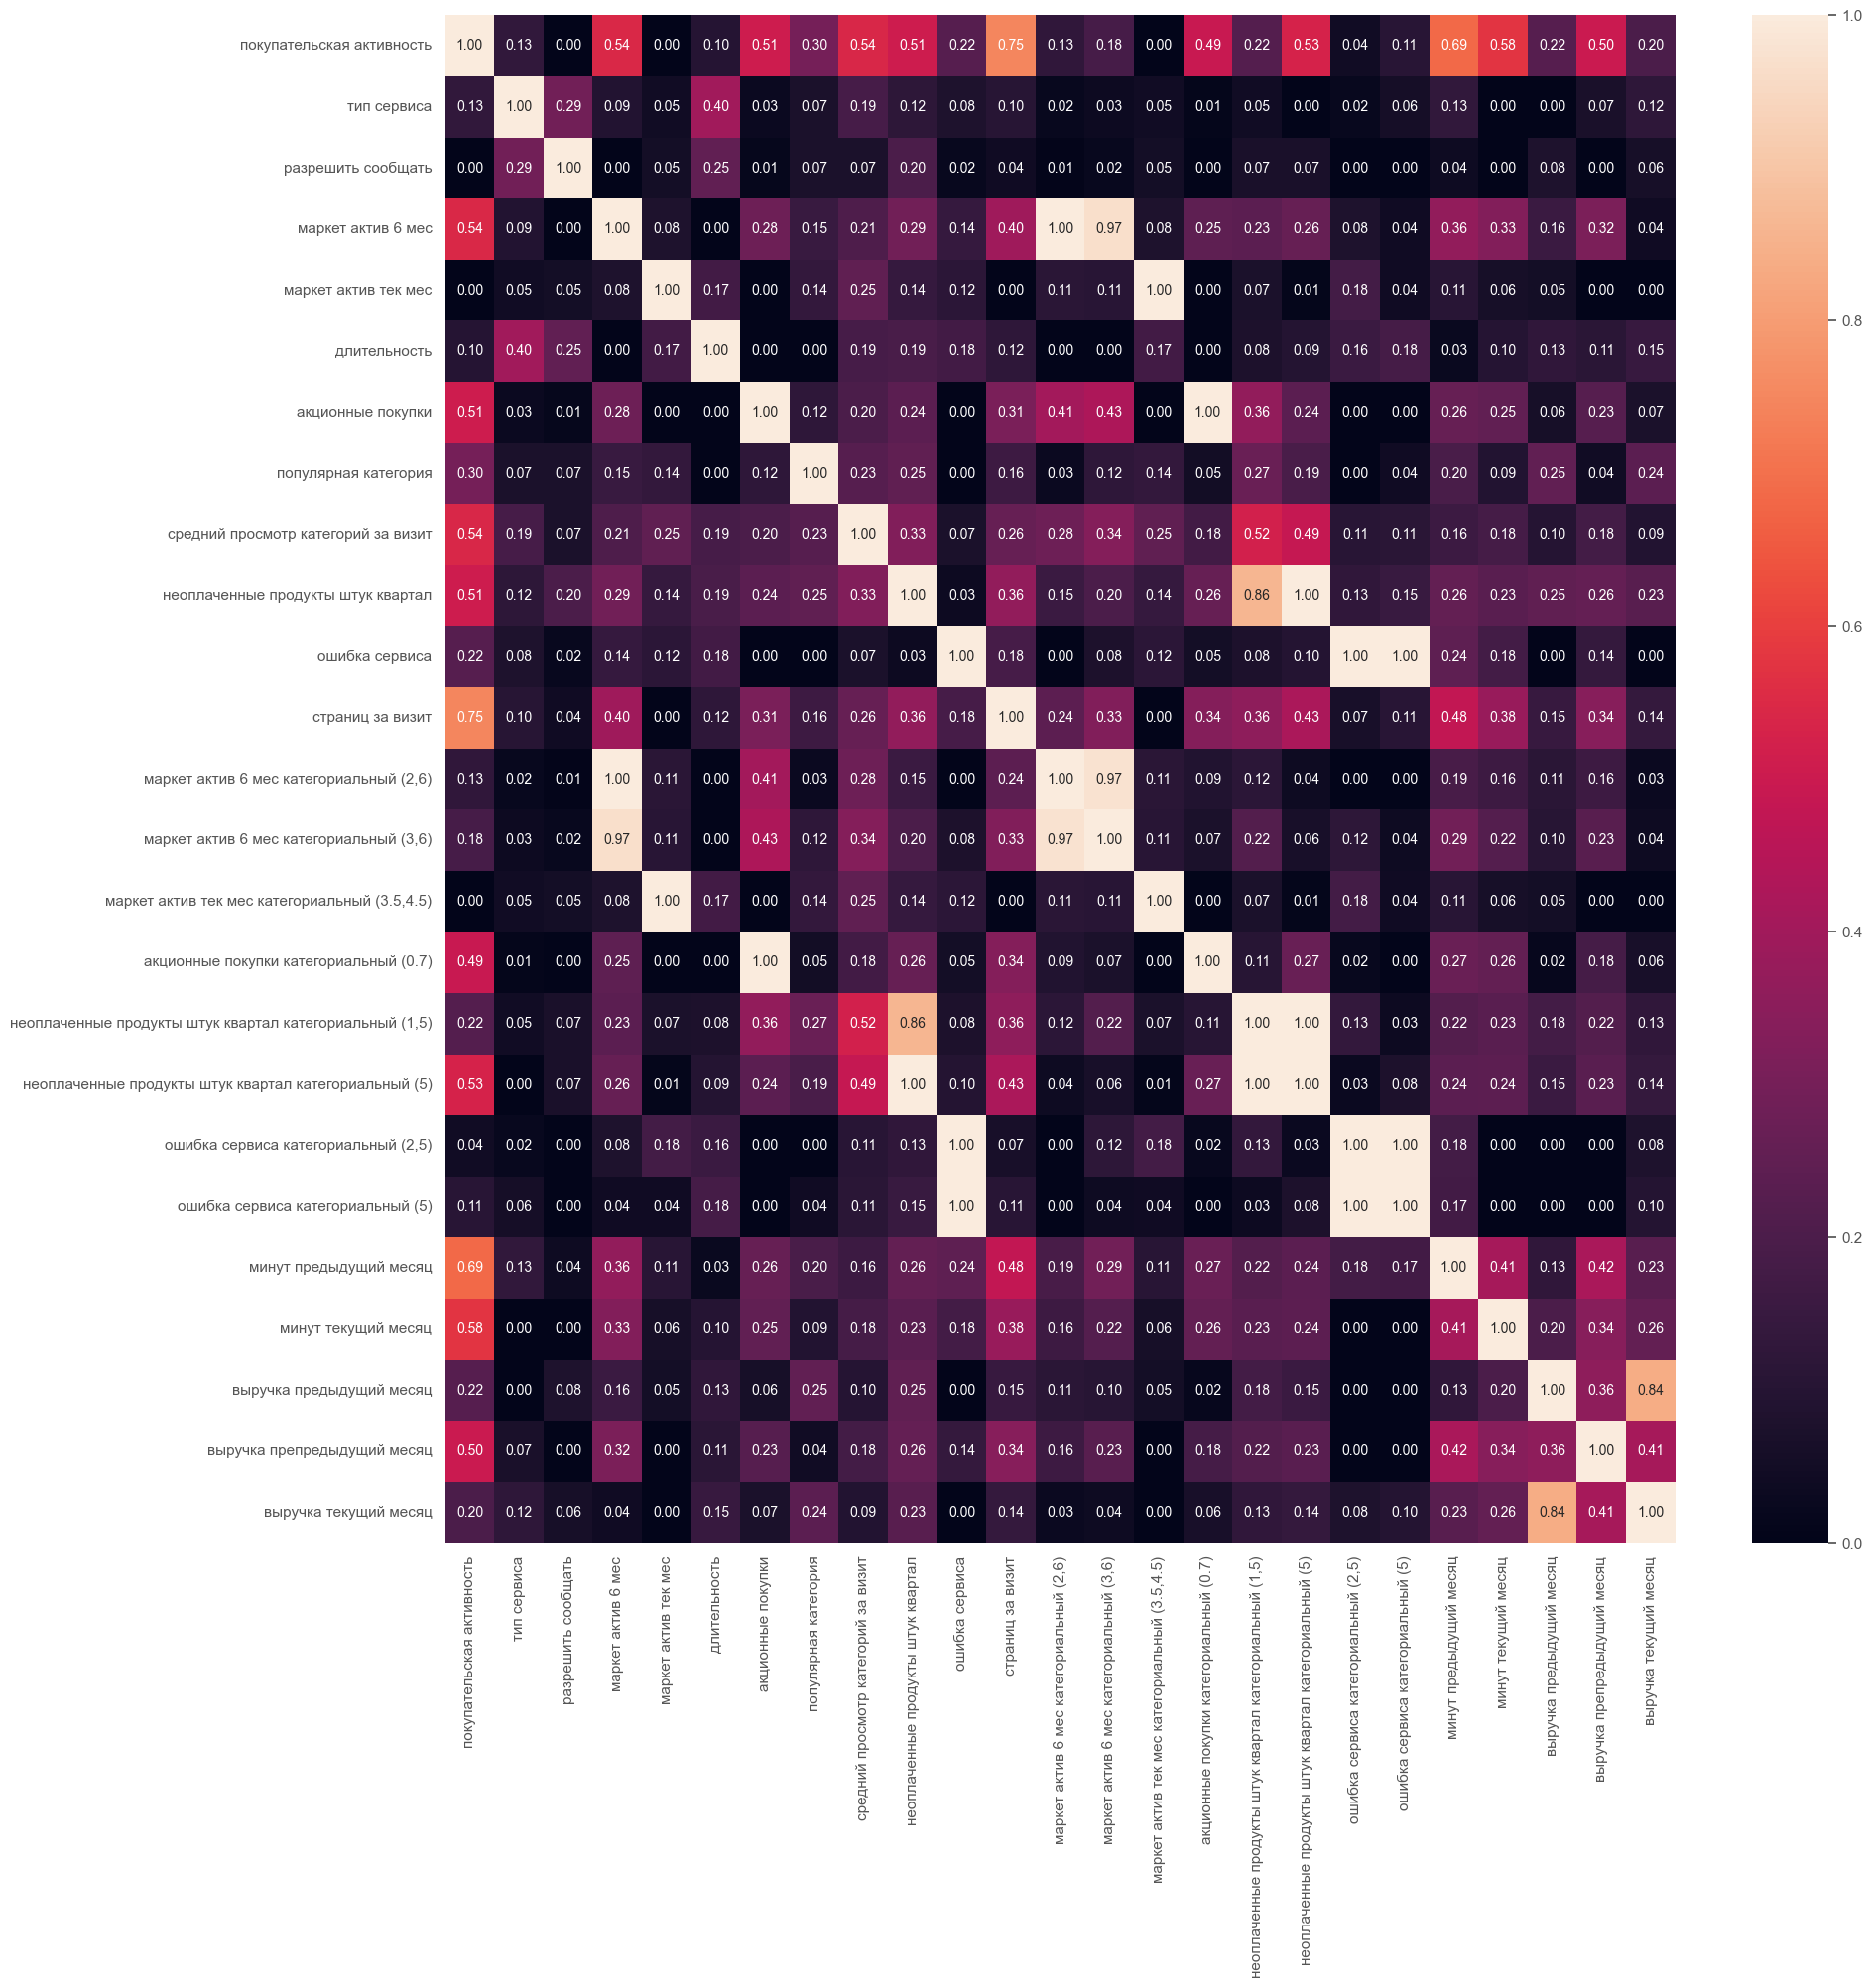

In [421]:
interval_cols = {
    'маркет актив 6 мес',
    'маркет актив тек мес',
    'длительность',
    'акционные покупки',
    'средний просмотр категорий за визит',
    'неоплаченные продукты штук квартал',
    'ошибка сервиса',
    'страниц за визит',
    'минут предыдущий месяц',
    'минут текущий месяц',
    'выручка предыдущий месяц',
    'выручка препредыдущий месяц',
    'выручка текущий месяц'
}

plt.figure(figsize=(20, 20))

sns.heatmap(
    market_df.drop('id', axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

Примем, что линейно корреллирующие признаки имеют коэффициент корреляции >= 20. Глядя на матрицу, можно увидеть, что линейно коррелирующими признаками являются следующие:

In [422]:
linear_corr_cols = [
    'маркет актив 6 мес',
    'акционные покупки',
    'популярная категория',
    'средний просмотр категорий за визит',
    'неоплаченные продукты штук квартал',
    'ошибка сервиса',
    'страниц за визит',
    'акционные покупки категориальный (0.7)',
    'неоплаченные продукты штук квартал категориальный (1,5)',
    'неоплаченные продукты штук квартал категориальный (5)',
    'минут предыдущий месяц',
    'минут текущий месяц',
    'выручка препредыдущий месяц',
    'выручка текущий месяц'
]

#### Удаление некоррелирующих с целевым признаков

Удалим из таблицы некоррелирующие признаки:

In [423]:
linear_corr_cols.insert(0, 'покупательская активность')
linear_corr_cols.insert(0, 'id')

In [424]:
market_corrected_df = market_df[linear_corr_cols]
market_corrected_df.head()

id покупательская активность  маркет актив 6 мес  акционные покупки  \
1  215349                 снизилась                 4.4               0.75   
2  215350                 снизилась                 4.9               0.14   
3  215351                 снизилась                 3.2               0.99   
4  215352                 снизилась                 5.1               0.94   
5  215353                 снизилась                 3.3               0.26   

  популярная категория  средний просмотр категорий за визит  \
1     товары для детей                                    4   
2    домашний текстиль                                    5   
3     товары для детей                                    5   
4     товары для детей                                    3   
5    домашний текстиль                                    4   

   неоплаченные продукты штук квартал  ошибка сервиса  страниц за визит  \
1                                   4               2                 5   
2                                   2               1                 5   
3                                   0               6                 4   
4                                   2               3                 2   
5                                   1               1                 4   

  акционные покупки категориальный (0.7)  \
1                                высокий   
2                                 низкий   
3                                высокий   
4                                высокий   
5                                 низкий   

  неоплаченные продукты штук квартал категориальный (1,5)  \
1                                            средний        
2                                            средний        
3                                             низкий        
4                                            средний        
5                                            средний        

  неоплаченные продукты штук квартал категориальный (5)  \
1                                             низкий      
2                                             низкий      
3                                             низкий      
4                                             низкий      
5                                             низкий      

   минут предыдущий месяц  минут текущий месяц  выручка препредыдущий месяц  \
1                      12                   10                       4472.0   
2                       8                   13                       4826.0   
3                      11                   13                       4793.0   
4                       8                   11                       4594.0   
5                      10                   10                       5124.0   

   выручка текущий месяц  
1                 4971.6  
2                 5058.4  
3                 6610.4  
4                 5872.5  
5                 5388.5

#### Устранение мультиколлинеарности

Построим матрицу коллинеарности еще раз:

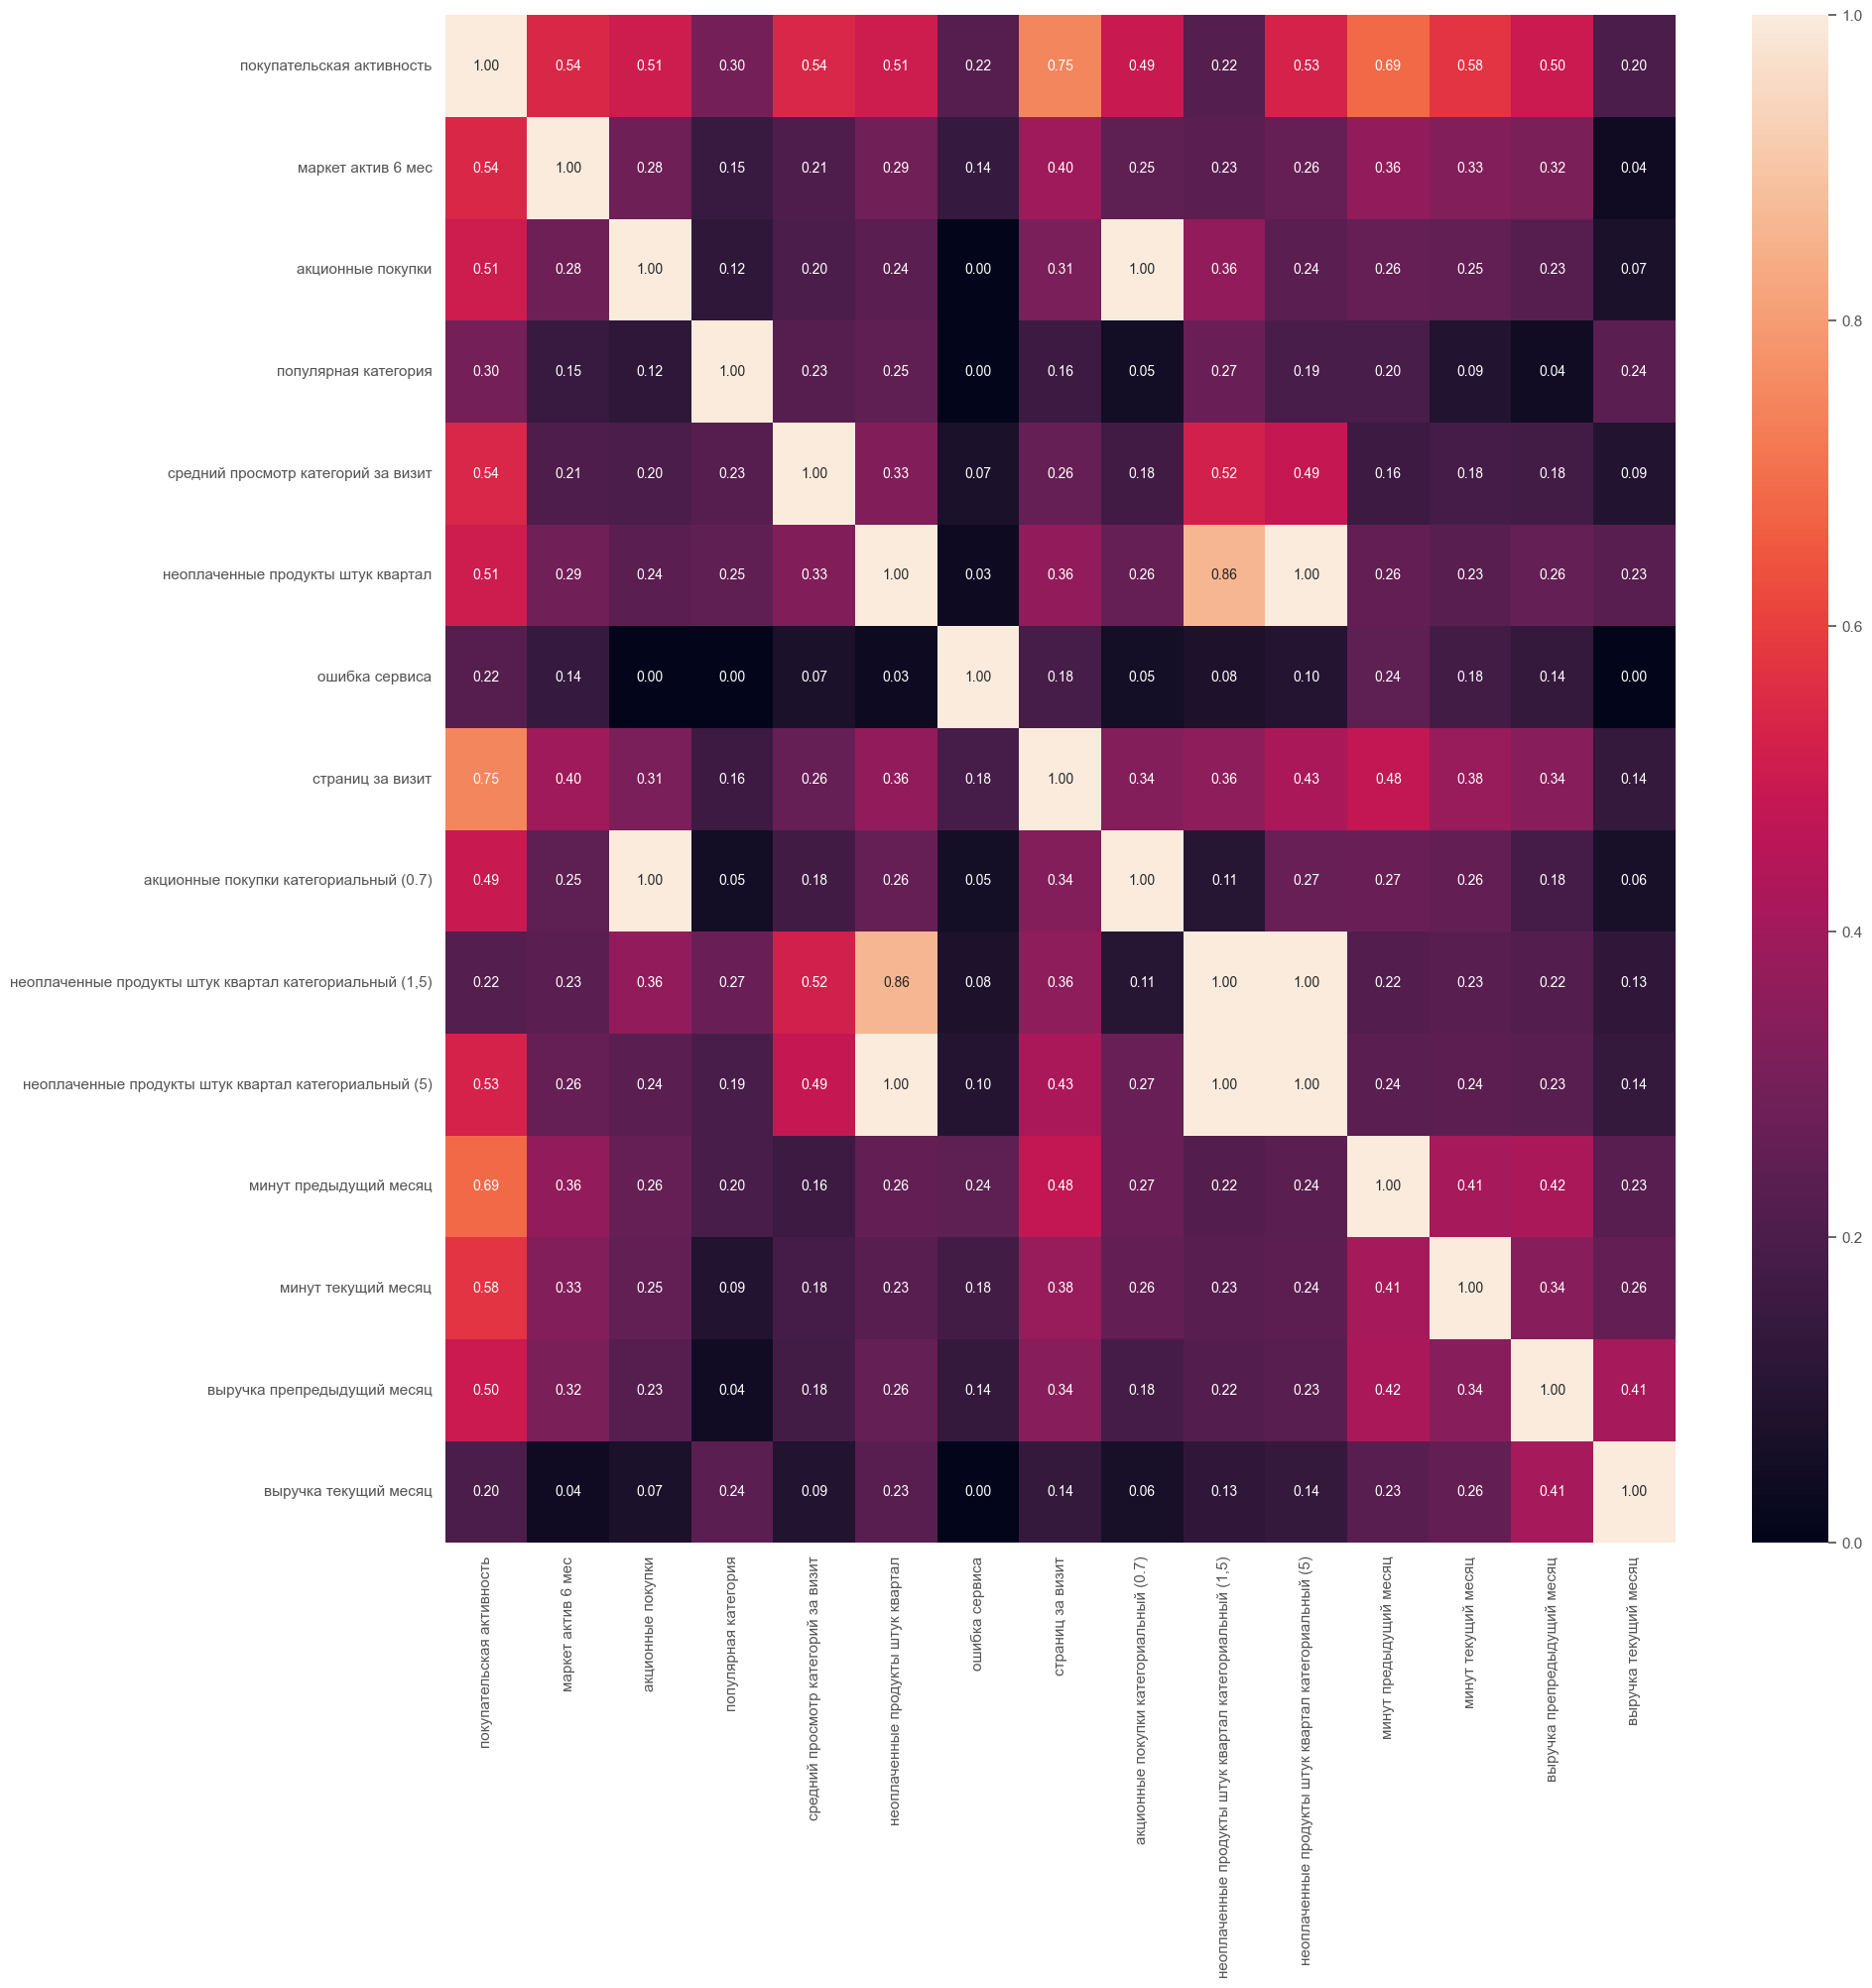

In [425]:
interval_cols = {
    'маркет актив 6 мес',
    'маркет актив тек мес',
    'длительность',
    'акционные покупки',
    'средний просмотр категорий за визит',
    'неоплаченные продукты штук квартал',
    'ошибка сервиса',
    'страниц за визит',
    'минут предыдущий месяц',
    'минут текущий месяц',
    'выручка предыдущий месяц',
    'выручка препредыдущий месяц',
    'выручка текущий месяц'
}

plt.figure(figsize=(20, 20))

sns.heatmap(
    market_corrected_df.drop('id', axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

Рассмотрим пары сильно коррелирующих признаков (положим коэффициент корреляции >= 0.8):
- `акционные покупки` и `акционные покупки категориальный (0.7)`;
- `неоплаченные продукты штук квартал` и `неоплаченные продукты штук квартал категориальный (1,5)`;
- `неоплаченные продукты штук квартал` и `неоплаченные продукты штук квартал категориальный (5)`;
- `неоплаченные продукты штук квартал категориальный (1,5)` и `неоплаченные продукты штук квартал категориальный (5)`.

Выберем из этих пар те признаки, коэффициент корреляции которых наименьший:
- `акционные покупки категориальный (0.7)`;
- `неоплаченные продукты штук квартал категориальный (1,5)`;
- `неоплаченные продукты штук квартал`.

Удалим эти столбцы:

In [426]:
multicol = [
    'акционные покупки категориальный (0.7)',
    'неоплаченные продукты штук квартал категориальный (1,5)',
    'неоплаченные продукты штук квартал'
]

market_corrected_df = market_corrected_df.drop(multicol, axis=1)

In [427]:
market_corrected_df.head()

id покупательская активность  маркет актив 6 мес  акционные покупки  \
1  215349                 снизилась                 4.4               0.75   
2  215350                 снизилась                 4.9               0.14   
3  215351                 снизилась                 3.2               0.99   
4  215352                 снизилась                 5.1               0.94   
5  215353                 снизилась                 3.3               0.26   

  популярная категория  средний просмотр категорий за визит  ошибка сервиса  \
1     товары для детей                                    4               2   
2    домашний текстиль                                    5               1   
3     товары для детей                                    5               6   
4     товары для детей                                    3               3   
5    домашний текстиль                                    4               1   

   страниц за визит неоплаченные продукты штук квартал категориальный (5)  \
1                 5                                             низкий      
2                 5                                             низкий      
3                 4                                             низкий      
4                 2                                             низкий      
5                 4                                             низкий      

   минут предыдущий месяц  минут текущий месяц  выручка препредыдущий месяц  \
1                      12                   10                       4472.0   
2                       8                   13                       4826.0   
3                      11                   13                       4793.0   
4                       8                   11                       4594.0   
5                      10                   10                       5124.0   

   выручка текущий месяц  
1                 4971.6  
2                 5058.4  
3                 6610.4  
4                 5872.5  
5                 5388.5

#### Логический анализ и коррекция

Построим матрицу коллинеарности еще раз:

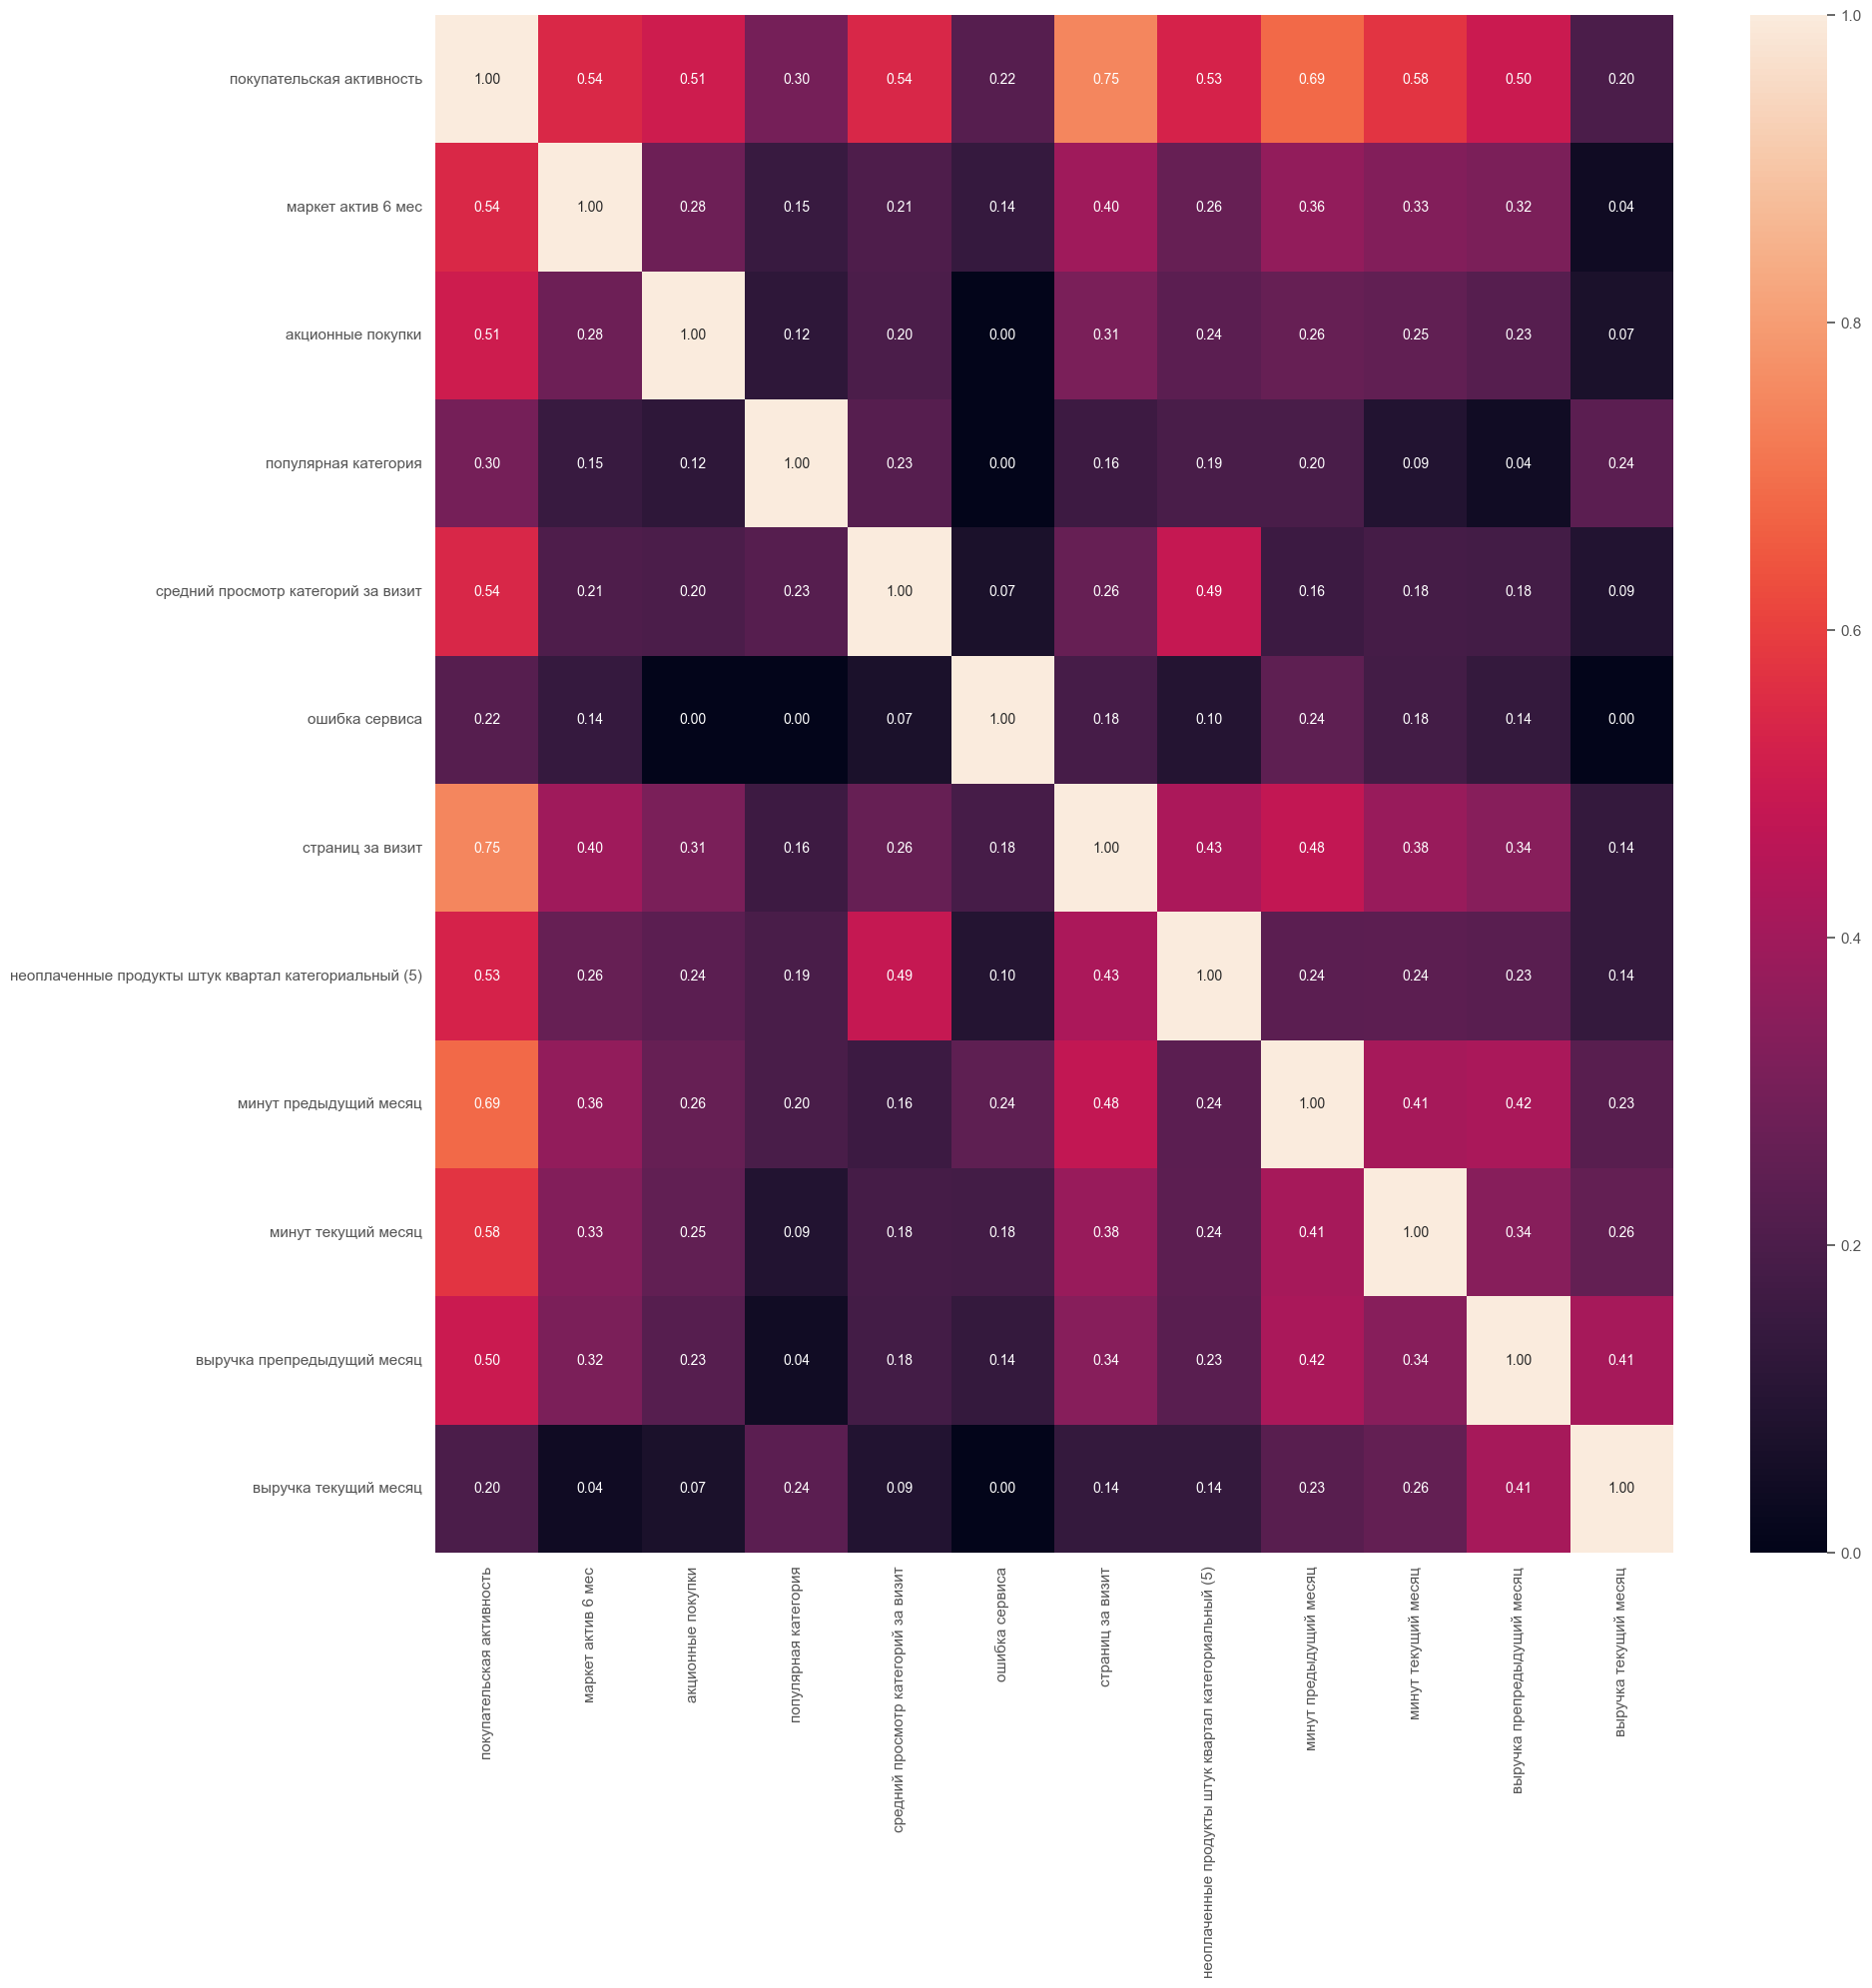

In [428]:
interval_cols = {
    'маркет актив 6 мес',
    'акционные покупки',
    'средний просмотр категорий за визит',
    'ошибка сервиса',
    'страниц за визит',
    'минут предыдущий месяц',
    'минут текущий месяц',
    'выручка препредыдущий месяц',
    'выручка текущий месяц'
}

plt.figure(figsize=(20, 20))

sns.heatmap(
    market_corrected_df.drop('id', axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

Выделим пары столбцов с наибольшим коэффициентом корреляции (>= 0.35):
- `маркет актив 6 мес` и `страниц за визит`;
- `маркет актив 6 мес` и `минут предыдущий месяц`;
- `акционные покупки` и `выручка препредыдущий месяц`;
- `средний просмотр категорий за визит` и `неоплаченные продукты штук квартал категориальный (5)`;
- `страниц за визит` и `неоплаченные продукты штук квартал категориальный (5)`
- `страниц за визит` и `минут предыдущий месяц`;
- `страниц за визит` и `минут текущий месяц`;
- `минут предыдущий месяц` и `минут текущий месяц`.


Можно сделать следующие выводы:

- В препредыдущий месяц, возможно, проходила акция, которая сильно повлияла на выручку;
- Признаки `выручка за текущий месяц`, а также `минут текущий месяц` - утечка, так как их можно зафиксировать только по прошествии месяца, для которого требуется предсказание;
- Есть определенная категория пользователей, которая приходит на сайт, долго его листает и кладет в корзину товары, которые в итоге не заказывает. При этом маркетинговые коммуникации с такими пользователями происходят достаточно часто.

Для корректного обучения модели лучше удалить данные о выручке за препредыдущий месяц, так как нетипичная информация может исказить прогнозы. Кроме того, стоит удалить признак `выручка за текущий месяц` как утечку.

Остальные колонки лучше оставить как есть:

In [429]:
market_corrected_df = market_corrected_df.drop([
    'выручка препредыдущий месяц',
    'выручка текущий месяц',
    'минут текущий месяц'], axis=1)
market_corrected_df.head()

id покупательская активность  маркет актив 6 мес  акционные покупки  \
1  215349                 снизилась                 4.4               0.75   
2  215350                 снизилась                 4.9               0.14   
3  215351                 снизилась                 3.2               0.99   
4  215352                 снизилась                 5.1               0.94   
5  215353                 снизилась                 3.3               0.26   

  популярная категория  средний просмотр категорий за визит  ошибка сервиса  \
1     товары для детей                                    4               2   
2    домашний текстиль                                    5               1   
3     товары для детей                                    5               6   
4     товары для детей                                    3               3   
5    домашний текстиль                                    4               1   

   страниц за визит неоплаченные продукты штук квартал категориальный (5)  \
1                 5                                             низкий      
2                 5                                             низкий      
3                 4                                             низкий      
4                 2                                             низкий      
5                 4                                             низкий      

   минут предыдущий месяц  
1                      12  
2                       8  
3                      11  
4                       8  
5                      10

Построим матрицу еще раз:

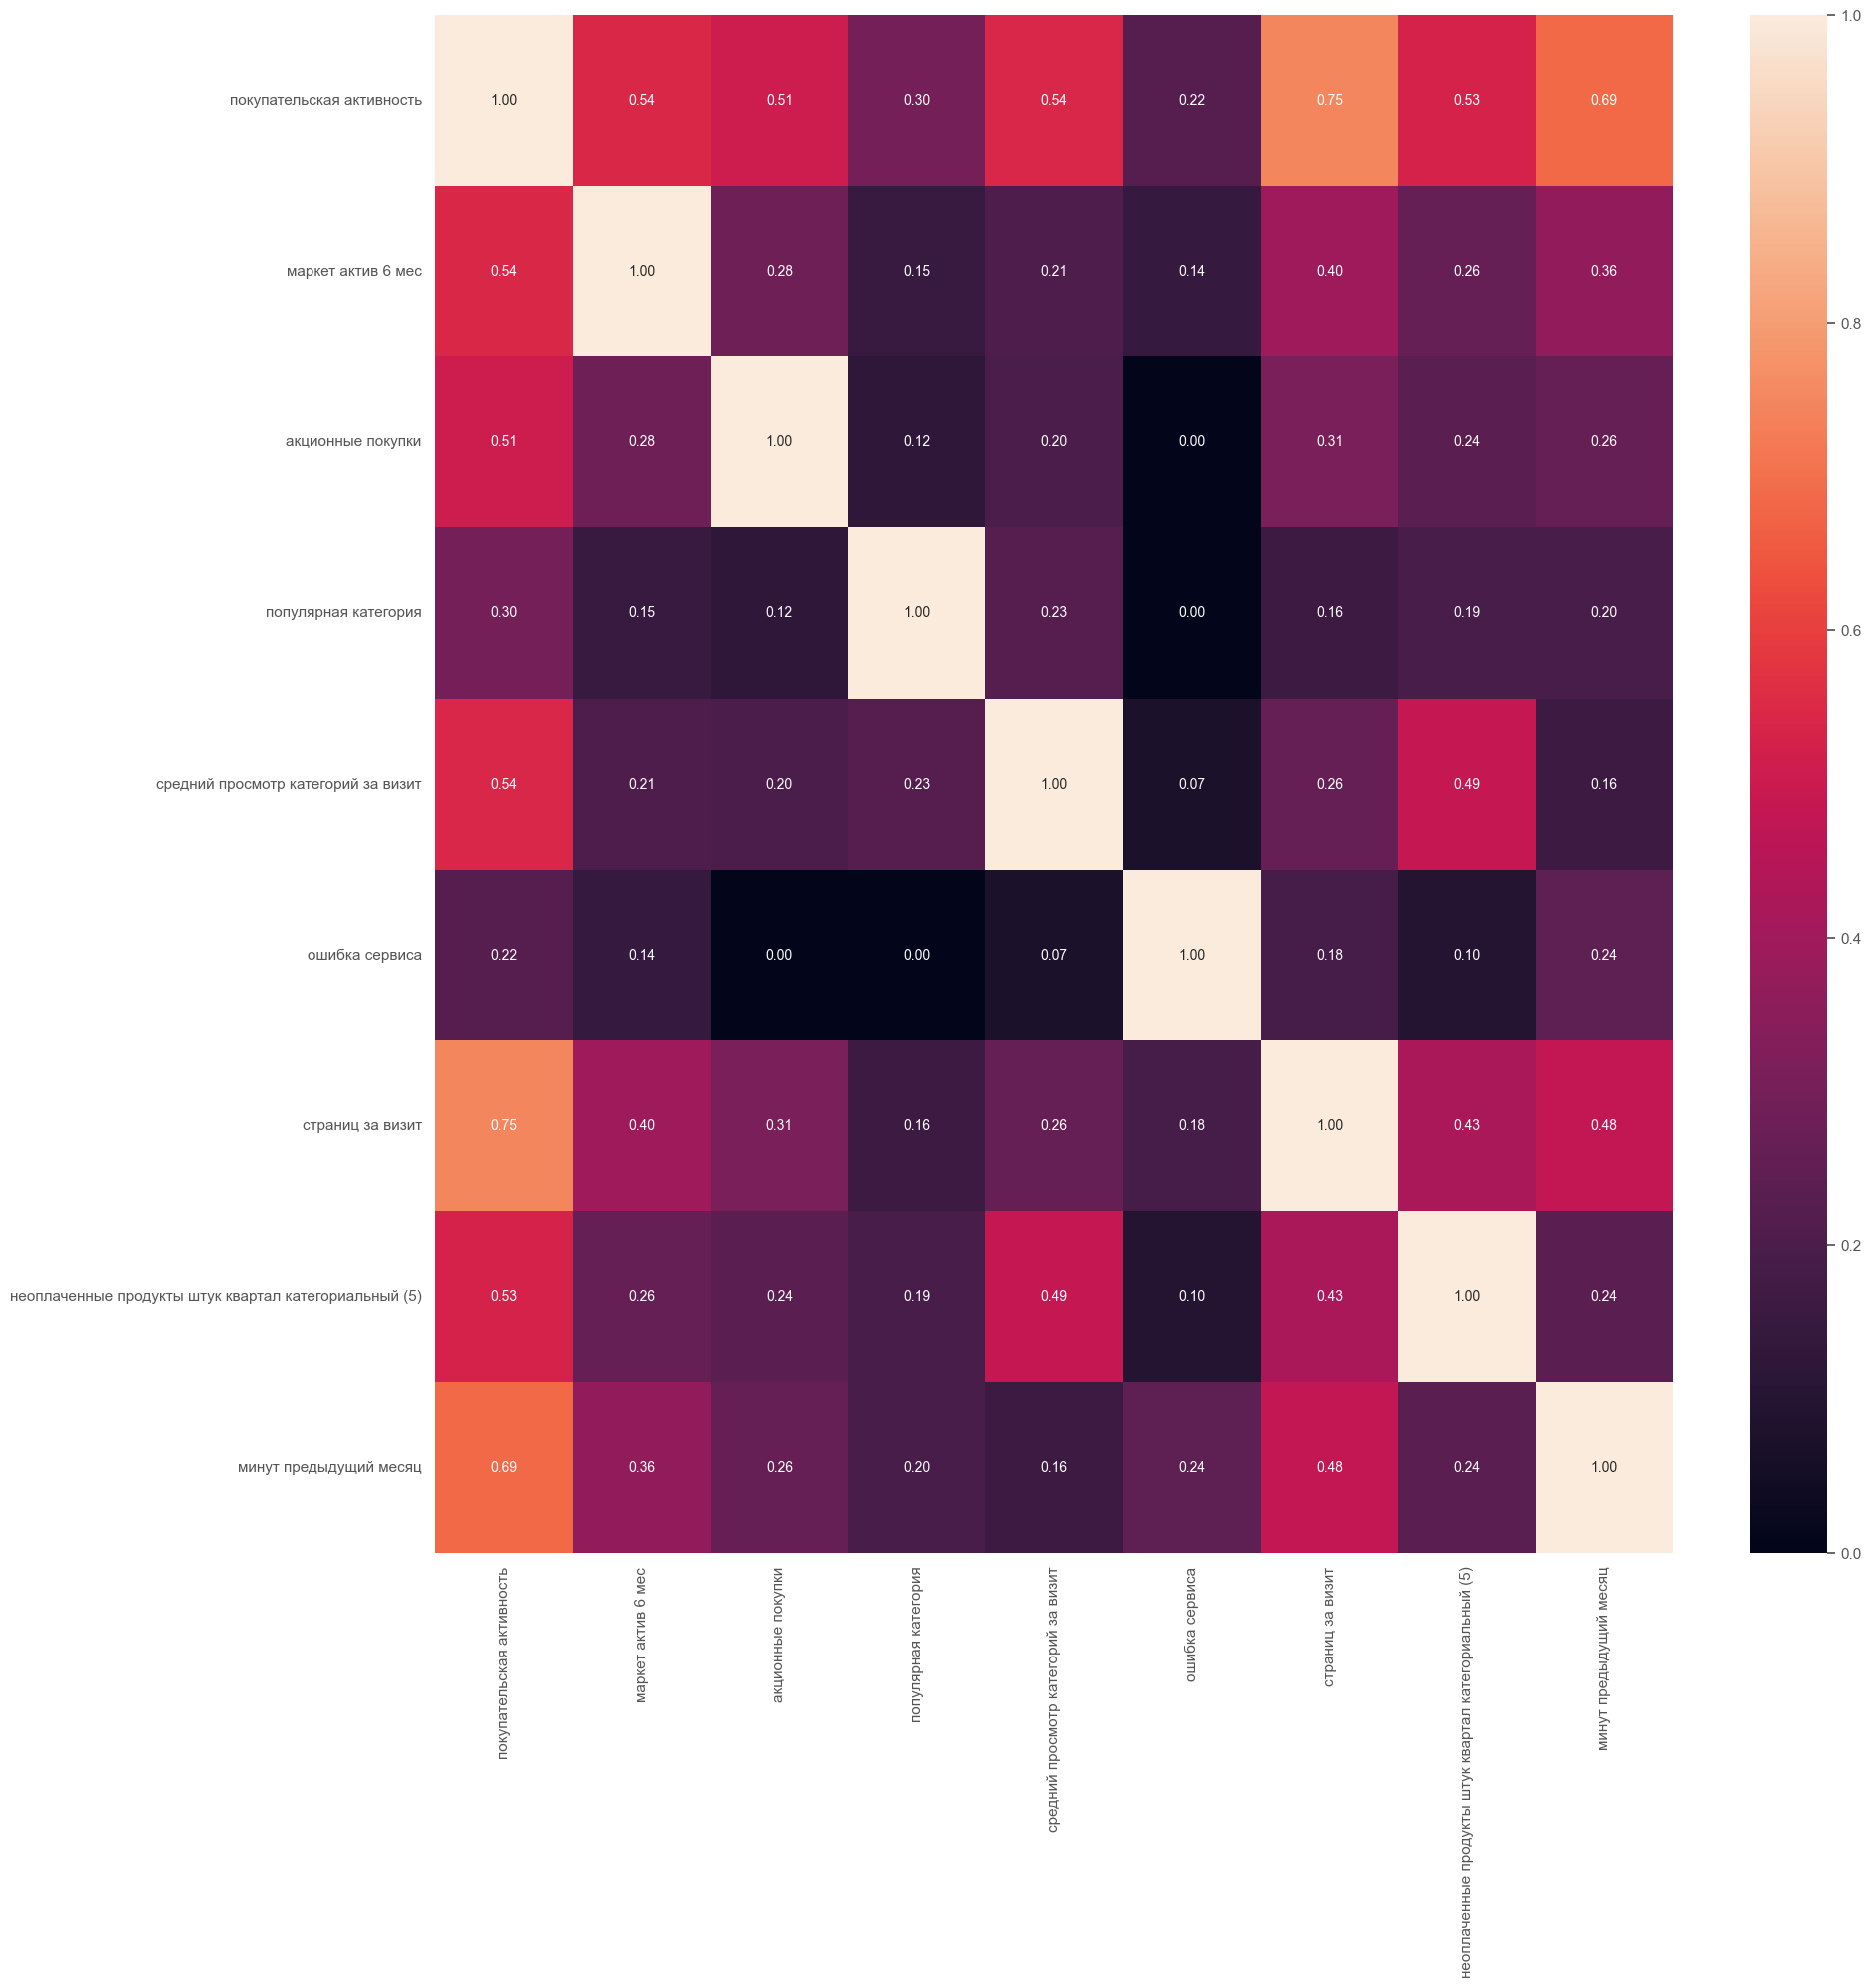

In [430]:
interval_cols = {
    'маркет актив 6 мес',
    'акционные покупки',
    'средний просмотр категорий за визит',
    'ошибка сервиса',
    'страниц за визит',
    'минут предыдущий месяц'
}

plt.figure(figsize=(20, 20))

sns.heatmap(
    market_corrected_df.drop('id', axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

#### Вывод

В процессе корреляционного анализа из датасета были отброшены признаки, слабо коррелирующие с целевым. Кроме того, была устранена мультиколлинеарность, а также были удалены данные, способные создать помехи.

Более того, было выявлено, что существует категория клиентов, которая приходит на сайт, долго его листает и кладет в корзину товары, которые в итоге не заказывает. При этом маркетинговые коммуникации с такими пользователями происходят достаточно часто.

### Использование пайплайнов

#### Разделение данных на выборки

Разделим данные на тренировочную и тестовую выборки:

In [431]:
X_train, X_test, y_train, y_test = train_test_split(
    market_corrected_df.drop(['id', 'покупательская активность'], axis=1),
    market_corrected_df['покупательская активность'],
    stratify=market_corrected_df['покупательская активность'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((972, 8), (324, 8))

In [432]:
print(X_train.columns, X_test.columns)

Index(['маркет актив 6 мес', 'акционные покупки', 'популярная категория',
       'средний просмотр категорий за визит', 'ошибка сервиса',
       'страниц за визит',
       'неоплаченные продукты штук квартал категориальный (5)',
       'минут предыдущий месяц'],
      dtype='object') Index(['маркет актив 6 мес', 'акционные покупки', 'популярная категория',
       'средний просмотр категорий за визит', 'ошибка сервиса',
       'страниц за визит',
       'неоплаченные продукты штук квартал категориальный (5)',
       'минут предыдущий месяц'],
      dtype='object')


Датасет разделен верно.

#### Устранение дисбаланса классов

Посмотрим на распределение целевого признака:

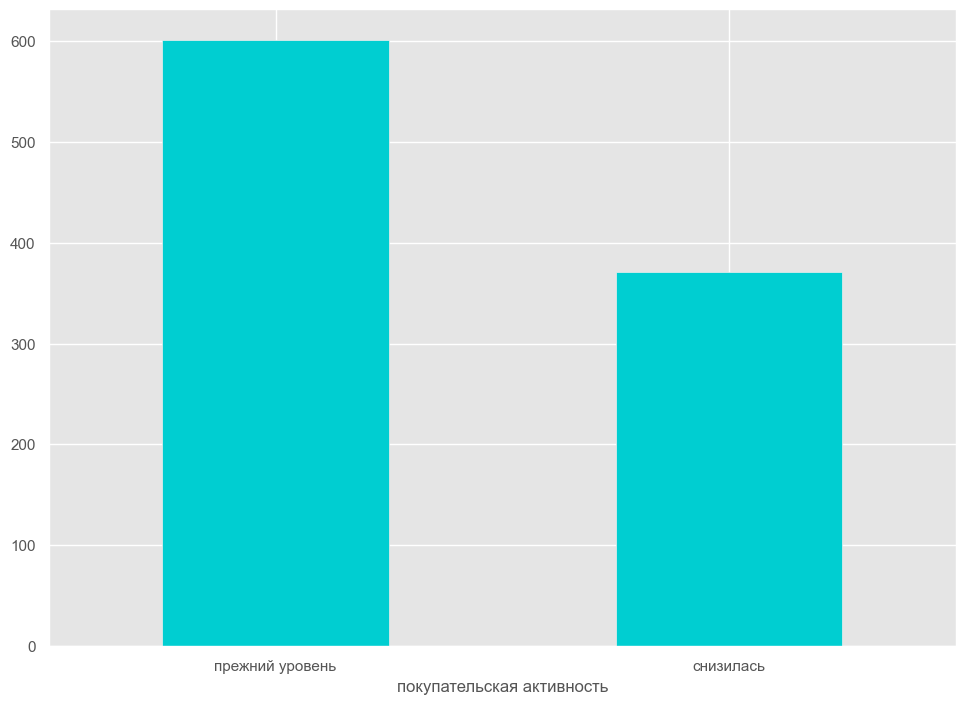

In [433]:
y_train.value_counts().plot(kind='bar', rot=0)
plt.show()

Можно увидеть, что значение 'снизилась' встречается ощутимо реже. Тем не менее, на данном этапе устранять дисбаланс нет смысла, так как в пайплайнах будет происходить кросс-валидация, а сэмплирование валидационных данных приведет к завышению оценки качества модели.

#### Пайплайн обработки данных

Для начала выведем датасет:

In [434]:
X_train.head()

маркет актив 6 мес  акционные покупки  \
510                  5.5               0.15   
13                   5.1               0.23   
536                  4.3               0.17   
1216                 5.6               0.94   
367                  3.6               0.39   

                      популярная категория  \
510   мелкая бытовая техника и электроника   
13          техника для красоты и здоровья   
536   мелкая бытовая техника и электроника   
1216                       кухонная посуда   
367                       товары для детей   

      средний просмотр категорий за визит  ошибка сервиса  страниц за визит  \
510                                     2               7                16   
13                                      4               2                 3   
536                                     5               3                11   
1216                                    2               5                 8   
367                                     3               2                 5   

     неоплаченные продукты штук квартал категориальный (5)  \
510                                              низкий      
13                                               низкий      
536                                              низкий      
1216                                            высокий      
367                                              низкий      

      минут предыдущий месяц  
510                       20  
13                        11  
536                       13  
1216                      14  
367                       10

Создадим списки с названиями признаков:

In [435]:
ohe_columns = [
    'популярная категория'
]

ord_columns = [
    'неоплаченные продукты штук квартал категориальный (5)'
]

num_columns = [
    'маркет актив 6 мес',
    'акционные покупки',
    'средний просмотр категорий за визит',
    'ошибка сервиса',
    'страниц за визит',
    'минут предыдущий месяц'
]

Создадим пайплайны для кодировщиков и скейлеров:

In [436]:
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

In [437]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['низкий', 'высокий']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [438]:
import sklearn
sklearn.__version__

'1.5.1'

In [439]:
num_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(2))
])

Создадим общий пайплайн для обработки данных, включающий в себя добавление полиномиальных признаков:

In [440]:
data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', num_pipe, num_columns)
], remainder='passthrough')

#### Пайплайн обучения моделей

В данных присутствует дисбаланс классов целевого признака. Для его устранения будем использовать сэмплирование (взвешивание не подойдет, так как обучаться будут в том числе модели, для которых параметр веса не предусмотрен), а если точнее - оверсэмплинг методом SMOTENC (чтобы не обрезать лишних данных и сэмплировать как численные, так и категориальные признаки):

In [441]:
over = SMOTENC(categorical_features=(ohe_columns + ord_columns), random_state=RANDOM_STATE);

In [442]:
pipe_final = Pipeline([
    ('over', over),
    ('preprocessor', data_preprocessor),
    ('models', KNeighborsClassifier())
])

Пайплайн для обучения моделей готов.

#### Создание алгоритма поиска оптимальных гиперпараметров

Создадим словарь перебора гиперпараметров:

In [443]:
param_grid = [
    {
        'over__k_neighbors': distributions.IntDistribution(2, 7),
        'models': distributions.CategoricalDistribution([KNeighborsClassifier()]),
        'models__n_neighbors': distributions.IntDistribution(2, 7),
        'preprocessor__num__scaler': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), 'passthrough'])
    },
    {
        'over__k_neighbors': distributions.IntDistribution(2, 7),
        'models': distributions.CategoricalDistribution([LogisticRegression(random_state=RANDOM_STATE, penalty='elasticnet', solver='saga')]),
        'models__l1_ratio': distributions.CategoricalDistribution([0, 0.2, 0.5, 0.8, 1]),
        'models__C': distributions.IntDistribution(1, 6),
        'preprocessor__num__scaler': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), 'passthrough'])
    },
    {
        'over__k_neighbors': distributions.IntDistribution(2, 7),
        'models': distributions.CategoricalDistribution([SVC(probability=True, random_state=RANDOM_STATE)]),
        'models__kernel': distributions.CategoricalDistribution(['rbf', 'sigmoid', 'poly']),
        'models__degree': distributions.IntDistribution(1, 6),
        'preprocessor__num__scaler': distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler(), 'passthrough'])
    }
]

/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains KNeighborsClassifier() which is of type KNeighborsClassifier.
  warnings.warn(message)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains StandardScaler() which is of type StandardScaler.
  warnings.warn(message)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains MinMaxScaler() which is of type MinMaxScaler.
  warnings.warn(message)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/optuna/distr

Настраиваем инструмент поиска лучшей модели. Возьмем OptunaSearchCV для ускорения поиска. Используем метрику roc-auc, так как важны как precision, так и recall, но подбор порога актуален не для всех моделей и важнее получить общее понимание о работе модели:

In [444]:
def get_search(params):
    return OptunaSearchCV(
        pipe_final,
        params,
        cv=5,
        scoring='roc_auc',
        n_trials=40,
        error_score='raise',
        random_state=RANDOM_STATE
    )

In [445]:
search_neighbors = get_search(param_grid[0])
search_logistic = get_search(param_grid[1])
search_svc = get_search(param_grid[2])

/var/folders/0v/cxx75_j56tz06bjqpym4bcth0000gp/T/ipykernel_42403/4252056587.py:2: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(


#### Обучение алгоритма поиска оптимальных гиперпараметров

Закодируем целевой признак:

In [446]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Обучим инструмент поиска на данных и посмотрим на лучшие результаты:

In [447]:
search_neighbors.fit(X_train, y_train)

[I 2024-09-05 01:30:57,676] A new study created in memory with name: no-name-4f0f18d9-47fb-4203-9d23-ecbb347ce30f
[I 2024-09-05 01:30:58,025] Trial 0 finished with value: 0.87024345543891 and parameters: {'over__k_neighbors': 4, 'models': KNeighborsClassifier(n_neighbors=6), 'models__n_neighbors': 6, 'preprocessor__num__scaler': 'passthrough'}. Best is trial 0 with value: 0.87024345543891.
[I 2024-09-05 01:30:58,369] Trial 1 finished with value: 0.8449591988682897 and parameters: {'over__k_neighbors': 3, 'models': KNeighborsClassifier(n_neighbors=3), 'models__n_neighbors': 3, 'preprocessor__num__scaler': 'passthrough'}. Best is trial 0 with value: 0.87024345543891.
[I 2024-09-05 01:30:58,700] Trial 2 finished with value: 0.8835473990519447 and parameters: {'over__k_neighbors': 4, 'models': KNeighborsClassifier(n_neighbors=7), 'models__n_neighbors': 7, 'preprocessor__num__scaler': StandardScaler()}. Best is trial 2 with value: 0.8835473990519447.
[I 2024-09-05 01:30:59,064] Trial 3 fini

OptunaSearchCV(cv=5, error_score='raise',
               estimator=Pipeline(steps=[('over',
                                          SMOTENC(categorical_features=['популярная '
                                                                        'категория',
                                                                        'неоплаченные '
                                                                        'продукты '
                                                                        'штук '
                                                                        'квартал '
                                                                        'категориальный '
                                                                        '(5)'],
                                                  random_state=42)),
                                         ('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='mo...
               param_distributions={'models': CategoricalDistribution(choices=(KNeighborsClassifier(n_neighbors=7),)),
                                    'models__n_neighbors': IntDistribution(high=7, log=False, low=2, step=1),
                                    'over__k_neighbors': IntDistribution(high=7, log=False, low=2, step=1),
                                    'preprocessor__num__scaler': CategoricalDistribution(choices=(StandardScaler(), MinMaxScaler(), 'passthrough'))},
               random_state=42, scoring='roc_auc')

In [448]:
search_logistic.fit(X_train, y_train)

[I 2024-09-05 01:31:11,362] A new study created in memory with name: no-name-d346d3a3-c666-4a98-a588-b7c94e61acab
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: Co

OptunaSearchCV(cv=5, error_score='raise',
               estimator=Pipeline(steps=[('over',
                                          SMOTENC(categorical_features=['популярная '
                                                                        'категория',
                                                                        'неоплаченные '
                                                                        'продукты '
                                                                        'штук '
                                                                        'квартал '
                                                                        'категориальный '
                                                                        '(5)'],
                                                  random_state=42)),
                                         ('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='mo...
                   solver='saga'),)),
                                    'models__C': IntDistribution(high=6, log=False, low=1, step=1),
                                    'models__l1_ratio': CategoricalDistribution(choices=(0, 0.2, 0.5, 0.8, 1)),
                                    'over__k_neighbors': IntDistribution(high=7, log=False, low=2, step=1),
                                    'preprocessor__num__scaler': CategoricalDistribution(choices=(StandardScaler(), MinMaxScaler(), 'passthrough'))},
               random_state=42, scoring='roc_auc')

In [449]:
search_svc.fit(X_train, y_train)

[I 2024-09-05 01:31:31,095] A new study created in memory with name: no-name-ac56ae51-140f-4866-8dc4-499359717c51
[I 2024-09-05 01:31:32,644] Trial 0 finished with value: 0.8904244930881294 and parameters: {'over__k_neighbors': 4, 'models': SVC(probability=True, random_state=42), 'models__kernel': 'rbf', 'models__degree': 3, 'preprocessor__num__scaler': StandardScaler()}. Best is trial 0 with value: 0.8904244930881294.
[I 2024-09-05 01:31:33,732] Trial 1 finished with value: 0.8662923237286874 and parameters: {'over__k_neighbors': 3, 'models': SVC(degree=4, kernel='poly', probability=True, random_state=42), 'models__kernel': 'poly', 'models__degree': 4, 'preprocessor__num__scaler': 'passthrough'}. Best is trial 0 with value: 0.8904244930881294.
[I 2024-09-05 01:31:34,908] Trial 2 finished with value: 0.8916596753778572 and parameters: {'over__k_neighbors': 7, 'models': SVC(probability=True, random_state=42), 'models__kernel': 'rbf', 'models__degree': 3, 'preprocessor__num__scaler': Sta

OptunaSearchCV(cv=5, error_score='raise',
               estimator=Pipeline(steps=[('over',
                                          SMOTENC(categorical_features=['популярная '
                                                                        'категория',
                                                                        'неоплаченные '
                                                                        'продукты '
                                                                        'штук '
                                                                        'квартал '
                                                                        'категориальный '
                                                                        '(5)'],
                                                  random_state=42)),
                                         ('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='mo...
                                    'models__degree': IntDistribution(high=6, log=False, low=1, step=1),
                                    'models__kernel': CategoricalDistribution(choices=('rbf', 'sigmoid', 'poly')),
                                    'over__k_neighbors': IntDistribution(high=7, log=False, low=2, step=1),
                                    'preprocessor__num__scaler': CategoricalDistribution(choices=(StandardScaler(), MinMaxScaler(), 'passthrough'))},
               random_state=42, scoring='roc_auc')

In [450]:
print('KNeighbors:')
print(search_neighbors.best_score_)
print('Logistic Regression:')
print(search_logistic.best_score_)
print('SVC:')
print(search_svc.best_score_)

KNeighbors:
0.886284158538704
Logistic Regression:
0.9031040106221925
SVC:
0.8977522150249424


In [451]:
model_neighbors = search_neighbors.best_estimator_
model_logistic = search_logistic.best_estimator_
model_svc = search_svc.best_estimator_

Оценим метрику на тестовых данных:

In [452]:
def get_roc_auc(model):
    probabilities = model.predict_proba(X_test)
    probabilities_one = probabilities[:, 1]
    return roc_auc_score(y_test, probabilities_one)

In [453]:
roc_auc_neighbors = get_roc_auc(model_neighbors)
roc_auc_logistic = get_roc_auc(model_logistic)
roc_auc_svc = get_roc_auc(model_svc)

In [454]:
print('KNeighbors:')
print(roc_auc_neighbors)
print('Logistic Regression:')
print(roc_auc_logistic)
print('SVC:')
print(roc_auc_svc)

KNeighbors:
0.8995469805444324
Logistic Regression:
0.9205193544472758
SVC:
0.9210451806010598


Для модели логистической регрессии переобучения не наблюдается.

Узнаем, какие параметры у лучшего пайплайна. В качестве лучшего выбираем папйлайн с логистической регрессией, так как у него наибольшая метрика на тренировочных данных при кросс-валидации:

In [455]:
search_logistic.best_estimator_

Pipeline(steps=[('over',
                 SMOTENC(categorical_features=['популярная категория',
                                               'неоплаченные продукты штук '
                                               'квартал категориальный (5)'],
                         k_neighbors=2, random_state=42)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='firs...
                                                  ['неоплаченные продукты штук '
                                                   'квартал категориальный '
                                                   '(5)']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  ['маркет актив 6 мес',
                                                   'акционные покупки',
                                                   'средний просмотр категорий '
                                                   'за визит',
                                                   'ошибка сервиса',
                                                   'страниц за визит',
                                                   'минут предыдущий '
                                                   'месяц'])])),
                ('models',
                 LogisticRegression(C=3, l1_ratio=1, penalty='elasticnet',
                                    random_state=42, solver='saga'))])

Узнаем параметр `k_neighbors` для шага `over`:

In [456]:
search_logistic.best_estimator_['over'].get_params()

{'categorical_encoder': None,
 'categorical_features': ['популярная категория',
  'неоплаченные продукты штук квартал категориальный (5)'],
 'k_neighbors': 2,
 'n_jobs': None,
 'random_state': 42,
 'sampling_strategy': 'auto'}

Лучше всего справился пайплайн со следующими параметрами:

- k_neighbors для SMOTENC: 2;
- модель LogisticRegression(C=3, l1_ratio=1, penalty='elasticnet', random_state=42, solver='saga');
- MinMaxScaler.

#### Вывод

Достигнув метрики roc-auc в 0.88 на тренировочных и 0.84 на тестовых данных, лучше всех себя показал пайплайн со следующими параметрами:

- k_neighbors для SMOTENC: 5;
- модель LogisticRegression(C=3, l1_ratio=1, penalty='elasticnet', random_state=42, solver='saga');
- MinMaxScaler.

### Анализ важности признаков

#### Проверка permutation importance

Для начала предобработаем данные для анализа:

In [457]:
best_pipeline = search_logistic.best_estimator_
best_pipeline

Pipeline(steps=[('over',
                 SMOTENC(categorical_features=['популярная категория',
                                               'неоплаченные продукты штук '
                                               'квартал категориальный (5)'],
                         k_neighbors=2, random_state=42)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='firs...
                                                  ['неоплаченные продукты штук '
                                                   'квартал категориальный '
                                                   '(5)']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  ['маркет актив 6 мес',
                                                   'акционные покупки',
                                                   'средний просмотр категорий '
                                                   'за визит',
                                                   'ошибка сервиса',
                                                   'страниц за визит',
                                                   'минут предыдущий '
                                                   'месяц'])])),
                ('models',
                 LogisticRegression(C=3, l1_ratio=1, penalty='elasticnet',
                                    random_state=42, solver='saga'))])

In [458]:
preprocessor = best_pipeline['preprocessor']

In [459]:
X_test_preprocessed = preprocessor.transform(X_test)

Обучим модель на тестовых данных:

In [460]:
model = LogisticRegression(C=5, l1_ratio=1, penalty='elasticnet', random_state=RANDOM_STATE, solver='saga')
model.fit(X_test_preprocessed, y_test)

/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=5, l1_ratio=1, penalty='elasticnet', random_state=42,
                   solver='saga')

Построим график важности признаков:

In [461]:
features_names = (
    list(preprocessor['ohe'].get_feature_names_out())
    + list(preprocessor['ord'].get_feature_names_out())
    + list(preprocessor['num']['poly'].get_feature_names_out(num_columns))
)

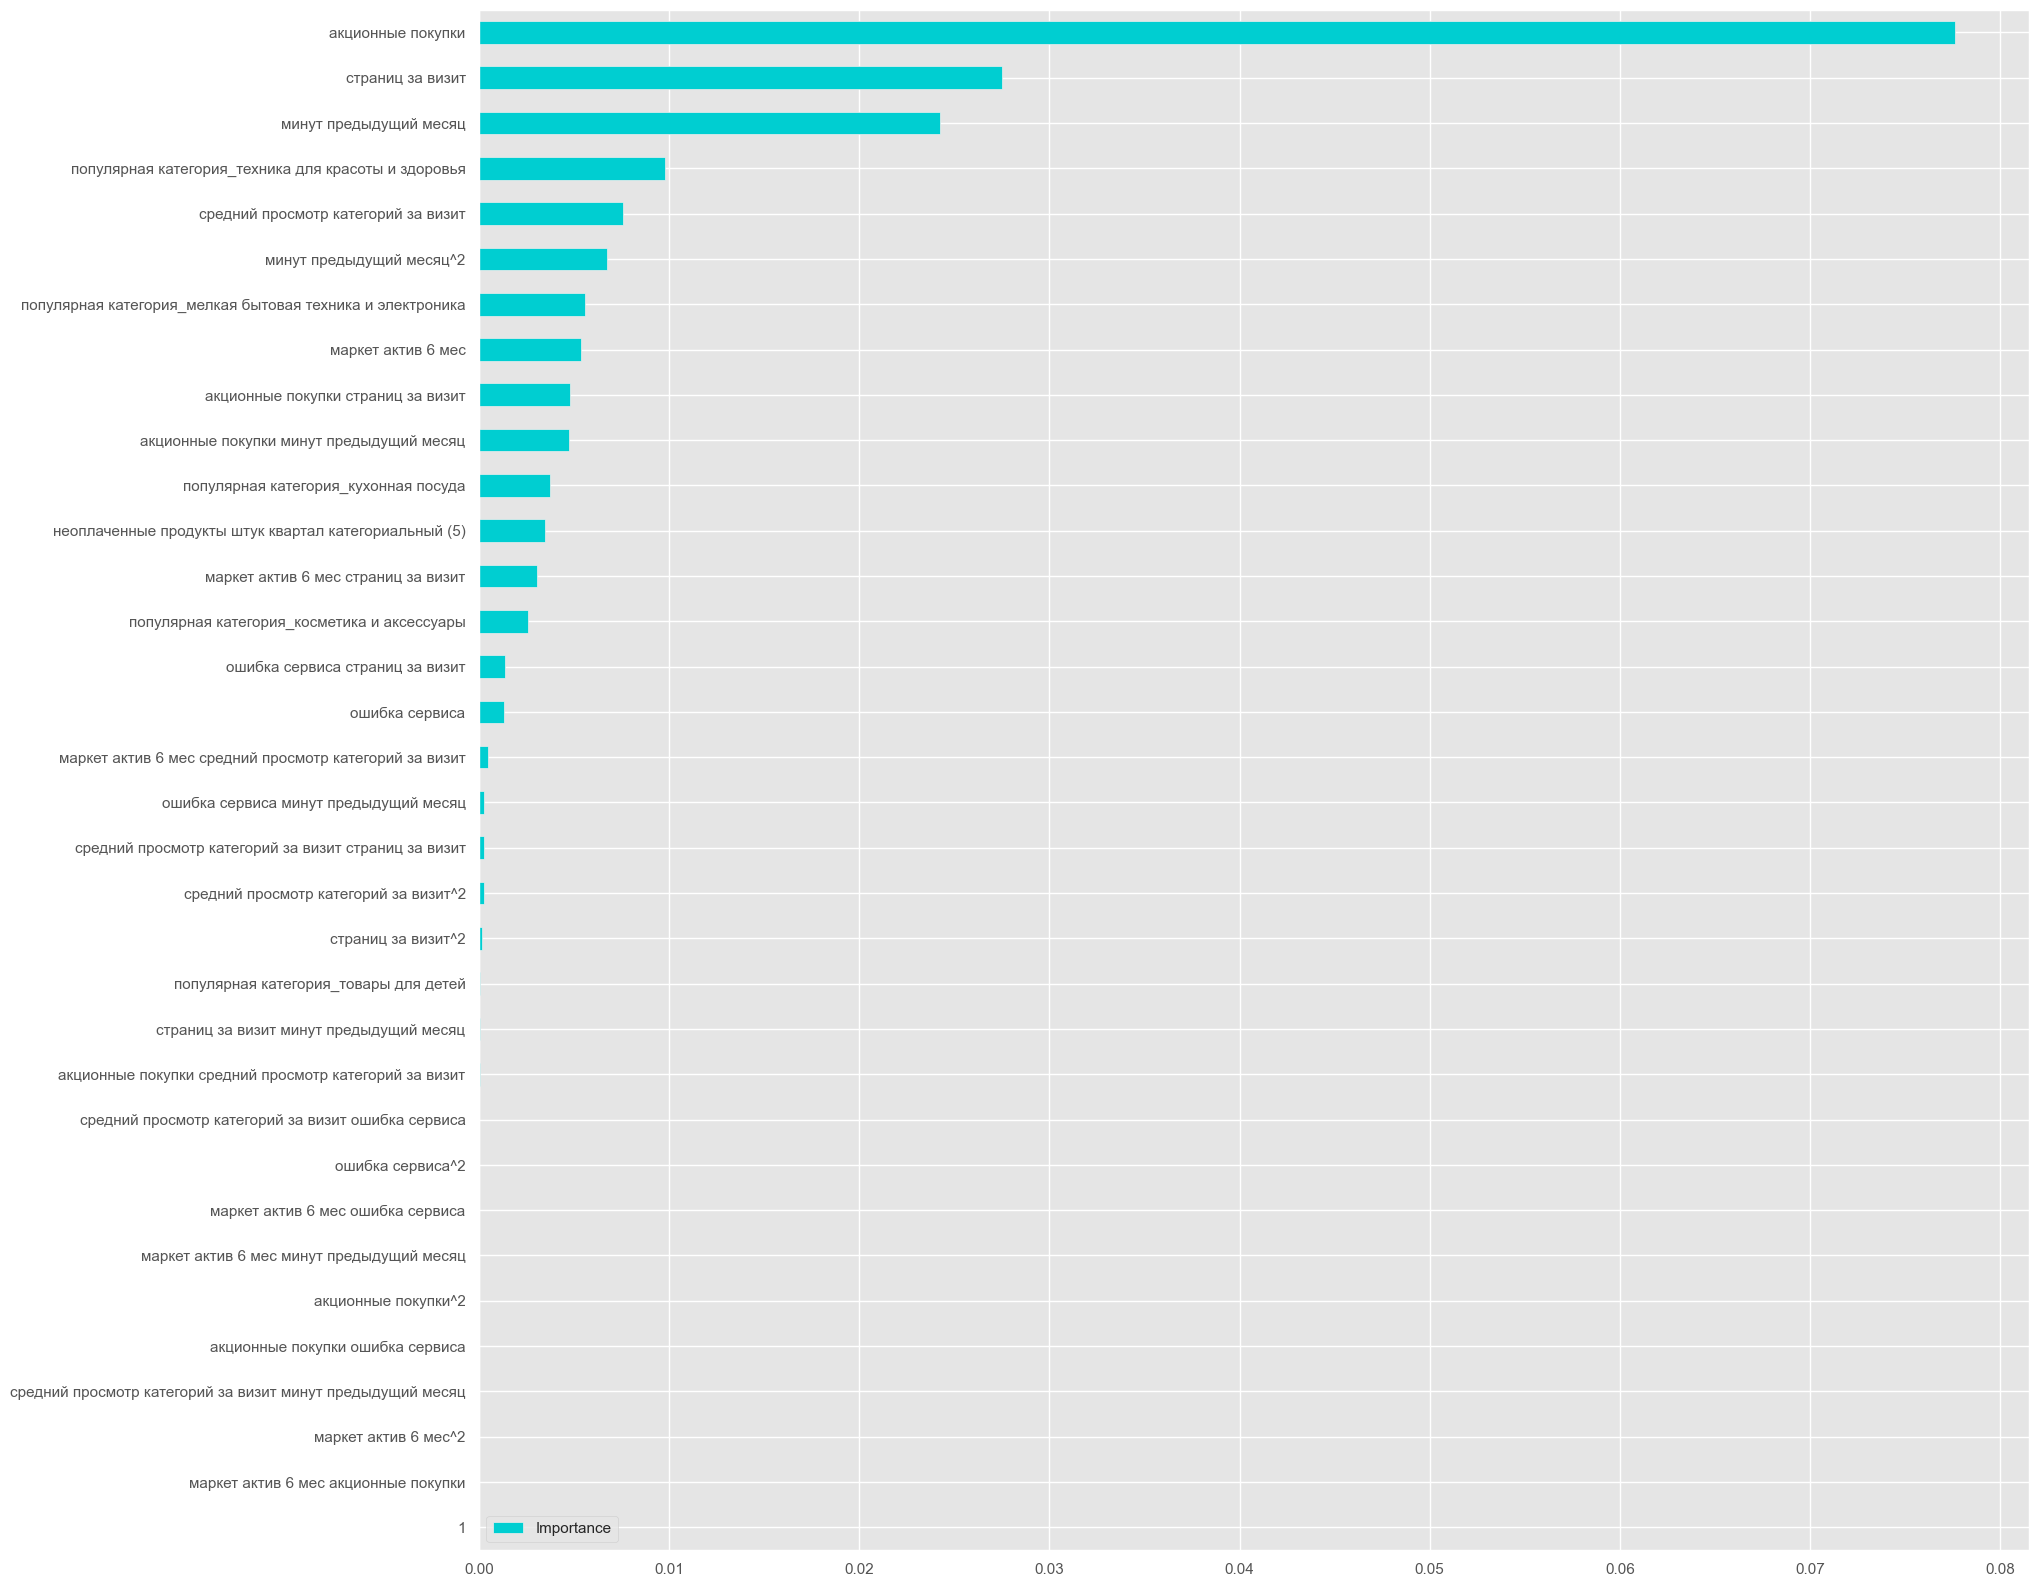

In [462]:
result = permutation_importance(model, X_test_preprocessed, y_test, scoring='roc_auc')

feature_importance = pd.DataFrame({'Feature': features_names, 'Importance': np.abs(result['importances_mean'])})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(20, 20), ylabel='', xlabel='')
plt.show()

Заключить можно следующее:

- на активность пользователей значительно влияет наличие акций;
- на активность пользователей значительно влияет время, проведенное на сайте;
- на активность пользователей значительно влияет количество страниц, просмотренных пользователем за визит;
- количество категорий, которые смотрит пользователь, также влияет на его активность;
- количество неоплаченных товаров в корзине влияет на поведение пользователей;
- наиболее активны те пользователи, которые наиболее часто покупают технику и товары для красоты/здоровья.

#### Анализ с помощью метода SHAP

Для начала оценим общую значимость признаков:

In [463]:
data = pd.DataFrame(X_test_preprocessed, columns=features_names)
explainer = shap.KernelExplainer(model.predict, data)
shap_values = explainer(X_test_preprocessed)

Using 324 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 324/324 [13:15<00:00,  2.45s/it]


Далее рассмотрим, как признаки влияют на каждое предсказание модели:

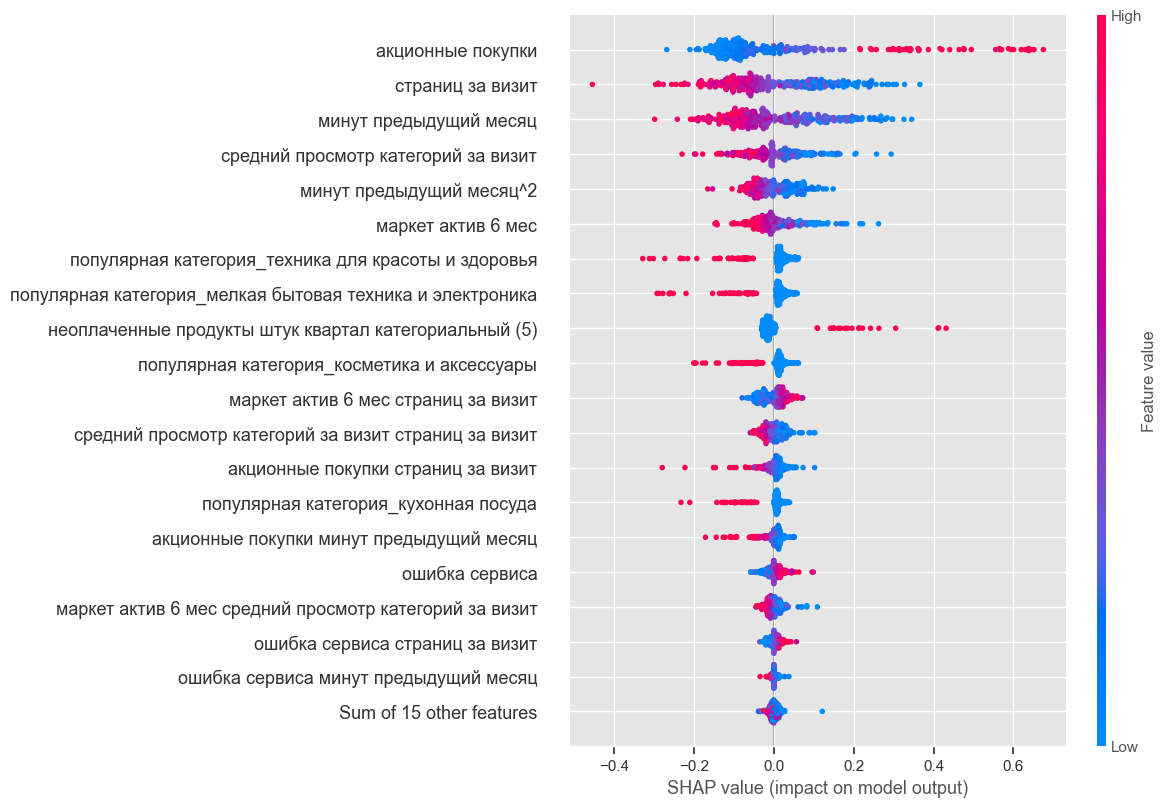

In [464]:
shap.plots.beeswarm(shap_values, max_display=20)

Сравнивая диаграмму beeswarm с графиком permutation importance, можно увидеть, что в общем признаки располагаются примерно в том же порядке за редкими исключениями (пример: `популярная категория_мелкая бытовая техника и электроника`).

Можно заметить следующее:
- признак `акционные покупки` отрицательно влияет на активность. Возможно, это говорит о том, что пользователи, пришедшие по рекламе и ожидающие скидки, как правило, теряют интерес, когда акция заканчивается. Тем не менее, квадрат этого признака влияет на активность положительно. Возможно, это уже сегмент пользователей, которые попали на акцию не через рекламу, а через просмотр непосредственно сайта;
- признак `страниц за визит` положительно влияет на активность пользователей. Это означает, что пользователи, которые просматривают больше страниц, склонны остаться на сайте;
- признак `минут предыдущий месяц`, а также его квадрат положительно влияют на активность пользователей. Это означает, что время, проведенное на сайте, оказывает положительное влияние на активность пользователя;
- признак `маркет актив 6 мес` положительно влияет на активность пользователей. Это означает, что активные в прошлом пользователи склонны оставаться активными;
- самые способствующие активности категории товаров - техника и товары для красоты/здоровья;
- высокое количество неоплаченных товаров негативно сказывается на активности пользователя.

#### Отбор признаков

Напишем функцию для вывода метрики ROC-AUC на тренировочных и тестовых данных для разных значений k в селекторе SelectKBest:

In [465]:
def roc_auc_scores(k, X_train, X_test, y_train, y_test):
    selector_pipe = Pipeline([
        ('over', best_pipeline['over']),
        ('preprocessor', best_pipeline['preprocessor']),
        ('selector', SelectKBest(f_classif, k=k+1)),
        ('models', best_pipeline['models'])
    ])

    selector_pipe.fit(X_train, y_train)
    roc_auc_train = roc_auc_score(y_train, selector_pipe.predict_proba(X_train)[:,1])
    roc_auc_test = roc_auc_score(y_test, selector_pipe.predict_proba(X_test)[:,1])
    return roc_auc_train, roc_auc_test

Используем ее для поиска лучших показаний:

In [466]:
for i in range(0, len(features_names)):
    train_score, test_score = roc_auc_scores(i, X_train, X_test, y_train, y_test)
    print(f'k = {i + 1}; train score: {round(train_score, 4)}; test score: {round(test_score, 4)}')

/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are 

k = 1; train score: 0.8307; test score: 0.8429
k = 2; train score: 0.8783; test score: 0.9053
k = 3; train score: 0.8781; test score: 0.9048


/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are 

k = 4; train score: 0.8811; test score: 0.9161
k = 5; train score: 0.8812; test score: 0.9164
k = 6; train score: 0.8839; test score: 0.9145


/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: inv

k = 7; train score: 0.8836; test score: 0.9168
k = 8; train score: 0.8867; test score: 0.9182
k = 9; train score: 0.8867; test score: 0.9147


/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Featu

k = 10; train score: 0.8865; test score: 0.9147
k = 11; train score: 0.892; test score: 0.9142
k = 12; train score: 0.892; test score: 0.9143


/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: inv

k = 13; train score: 0.9062; test score: 0.9149
k = 14; train score: 0.906; test score: 0.9165
k = 15; train score: 0.9064; test score: 0.9154


/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: inv

k = 16; train score: 0.9064; test score: 0.9155
k = 17; train score: 0.9069; test score: 0.9146
k = 18; train score: 0.9074; test score: 0.9145


/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: inv

k = 19; train score: 0.9086; test score: 0.9145
k = 20; train score: 0.913; test score: 0.9152
k = 21; train score: 0.913; test score: 0.9152


/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: inv

k = 22; train score: 0.9134; test score: 0.9152
k = 23; train score: 0.9133; test score: 0.9153


/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: inv

k = 24; train score: 0.9175; test score: 0.9165
k = 25; train score: 0.9179; test score: 0.9166


/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: inv

k = 26; train score: 0.9181; test score: 0.9178
k = 27; train score: 0.9184; test score: 0.9182


/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: inv

k = 28; train score: 0.9185; test score: 0.918
k = 29; train score: 0.9185; test score: 0.9177


/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: inv

k = 30; train score: 0.9189; test score: 0.9188
k = 31; train score: 0.9189; test score: 0.9193


/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: inv

k = 32; train score: 0.9193; test score: 0.9204
k = 33; train score: 0.9193; test score: 0.9204
k = 34; train score: 0.9191; test score: 0.9205


/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Напомним: до применения селектора метрика составляла:
- 0.9032 для тренировочных данных;
- 0.9205 для тестовых.

Заметим, что без потери качества предсказания на тренировочных данных можно убрать два признака.

Выведем признаки, которые показали лучшие результаты:

In [467]:
best_selector_pipeline = Pipeline([
        ('over', best_pipeline['over']),
        ('preprocessor', best_pipeline['preprocessor']),
        ('selector', SelectKBest(f_classif, k=32)),
        ('models', best_pipeline['models'])
    ])
best_selector_pipeline.fit(X_train, y_train)

/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/o.motyleva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('over',
                 SMOTENC(categorical_features=['популярная категория',
                                               'неоплаченные продукты штук '
                                               'квартал категориальный (5)'],
                         k_neighbors=2, random_state=42)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='firs...
                                                   '(5)']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  ['маркет актив 6 мес',
                                                   'акционные покупки',
                                                   'средний просмотр категорий '
                                                   'за визит',
                                                   'ошибка сервиса',
                                                   'страниц за визит',
                                                   'минут предыдущий '
                                                   'месяц'])])),
                ('selector', SelectKBest(k=32)),
                ('models',
                 LogisticRegression(C=3, l1_ratio=1, penalty='elasticnet',
                                    random_state=42, solver='saga'))])

In [468]:
best_selector_pipeline['selector'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33'], dtype=object)

In [469]:
selected_features=features_names[:6] + features_names[7:34]
selected_features

['популярная категория_косметика и аксессуары',
 'популярная категория_кухонная посуда',
 'популярная категория_мелкая бытовая техника и электроника',
 'популярная категория_техника для красоты и здоровья',
 'популярная категория_товары для детей',
 'неоплаченные продукты штук квартал категориальный (5)',
 'маркет актив 6 мес',
 'акционные покупки',
 'средний просмотр категорий за визит',
 'ошибка сервиса',
 'страниц за визит',
 'минут предыдущий месяц',
 'маркет актив 6 мес^2',
 'маркет актив 6 мес акционные покупки',
 'маркет актив 6 мес средний просмотр категорий за визит',
 'маркет актив 6 мес ошибка сервиса',
 'маркет актив 6 мес страниц за визит',
 'маркет актив 6 мес минут предыдущий месяц',
 'акционные покупки^2',
 'акционные покупки средний просмотр категорий за визит',
 'акционные покупки ошибка сервиса',
 'акционные покупки страниц за визит',
 'акционные покупки минут предыдущий месяц',
 'средний просмотр категорий за визит^2',
 'средний просмотр категорий за визит ошибка се

Финальный пайплайн готов. Пул признаков урезан. Финальные показатели:

In [470]:
score_train = roc_auc_score(y_train, best_selector_pipeline.predict_proba(X_train)[:,1])
score_test = roc_auc_score(y_test, best_selector_pipeline.predict_proba(X_test)[:,1])

print(f'Train score: {score_train}')
print(f'Test score: {score_test}')

Train score: 0.9192944373932035
Test score: 0.9204384581159244


#### Вывод

Можно заметить следующее:
- признак `акционные покупки` отрицательно влияет на активность. Возможно, это говорит о том, что пользователи, пришедшие по рекламе и ожидающие скидки, как правило, теряют интерес, когда акция заканчивается. Тем не менее, квадрат этого признака влияет на активность положительно. Возможно, это уже сегмент пользователей, которые попали на акцию не через рекламу, а через просмотр непосредственно сайта;
- признак `страниц за визит` положительно влияет на активность пользователей. Это означает, что пользователи, которые просматривают больше страниц, склонны остаться на сайте;
- признак `минут предыдущий месяц`, а также его квадрат положительно влияют на активность пользователей. Это означает, что время, проведенное на сайте, оказывает положительное влияние на активность пользователя;
- признак `маркет актив 6 мес` положительно влияет на активность пользователей. Это означает, что активные в прошлом пользователи склонны оставаться активными;
- самые способствующие активности категории товаров - техника и товары для красоты/здоровья;
- высокое количество неоплаченных товаров негативно сказывается на активности пользователя.

Для увеличения общей активности пользователей можно порекомендовать следующее:
- вкладывать наибольшие ресурсы в развитие рекомендательной системы (чтобы пользователи, которые просто листают сайт, начали делать покупки);
- создать систему скидок и акций для постоянных пользователей. Это позволит удержать любителей скидок;
- попробовать сделать упор на женскую аудиторию (так как активность пользователей в категориях, связанных с красотой, здоровьем и мелкой бытовой техникой, достаточно высока).

### Сегментация покупателей

#### Выполнение сегментации

##### Корреляционный анализ

Рассмотрим, какие признаки влияют на прибыльность клиентов для компании. Для этого объединим датасеты и построим матрицу корреляции:

In [471]:
profit_df = market_corrected_df.merge(money_df, on='id')

In [472]:
print(market_corrected_df.shape)
print(money_df.shape)
print(profit_df.shape)

(1296, 10)
(1300, 2)
(1296, 11)


In [473]:
profit_df.head()

id покупательская активность  маркет актив 6 мес  акционные покупки  \
0  215349                 снизилась                 4.4               0.75   
1  215350                 снизилась                 4.9               0.14   
2  215351                 снизилась                 3.2               0.99   
3  215352                 снизилась                 5.1               0.94   
4  215353                 снизилась                 3.3               0.26   

  популярная категория  средний просмотр категорий за визит  ошибка сервиса  \
0     товары для детей                                    4               2   
1    домашний текстиль                                    5               1   
2     товары для детей                                    5               6   
3     товары для детей                                    3               3   
4    домашний текстиль                                    4               1   

   страниц за визит неоплаченные продукты штук квартал категориальный (5)  \
0                 5                                             низкий      
1                 5                                             низкий      
2                 4                                             низкий      
3                 2                                             низкий      
4                 4                                             низкий      

   минут предыдущий месяц  прибыль  
0                      12     4.16  
1                       8     3.13  
2                      11     4.87  
3                       8     4.21  
4                      10     3.95

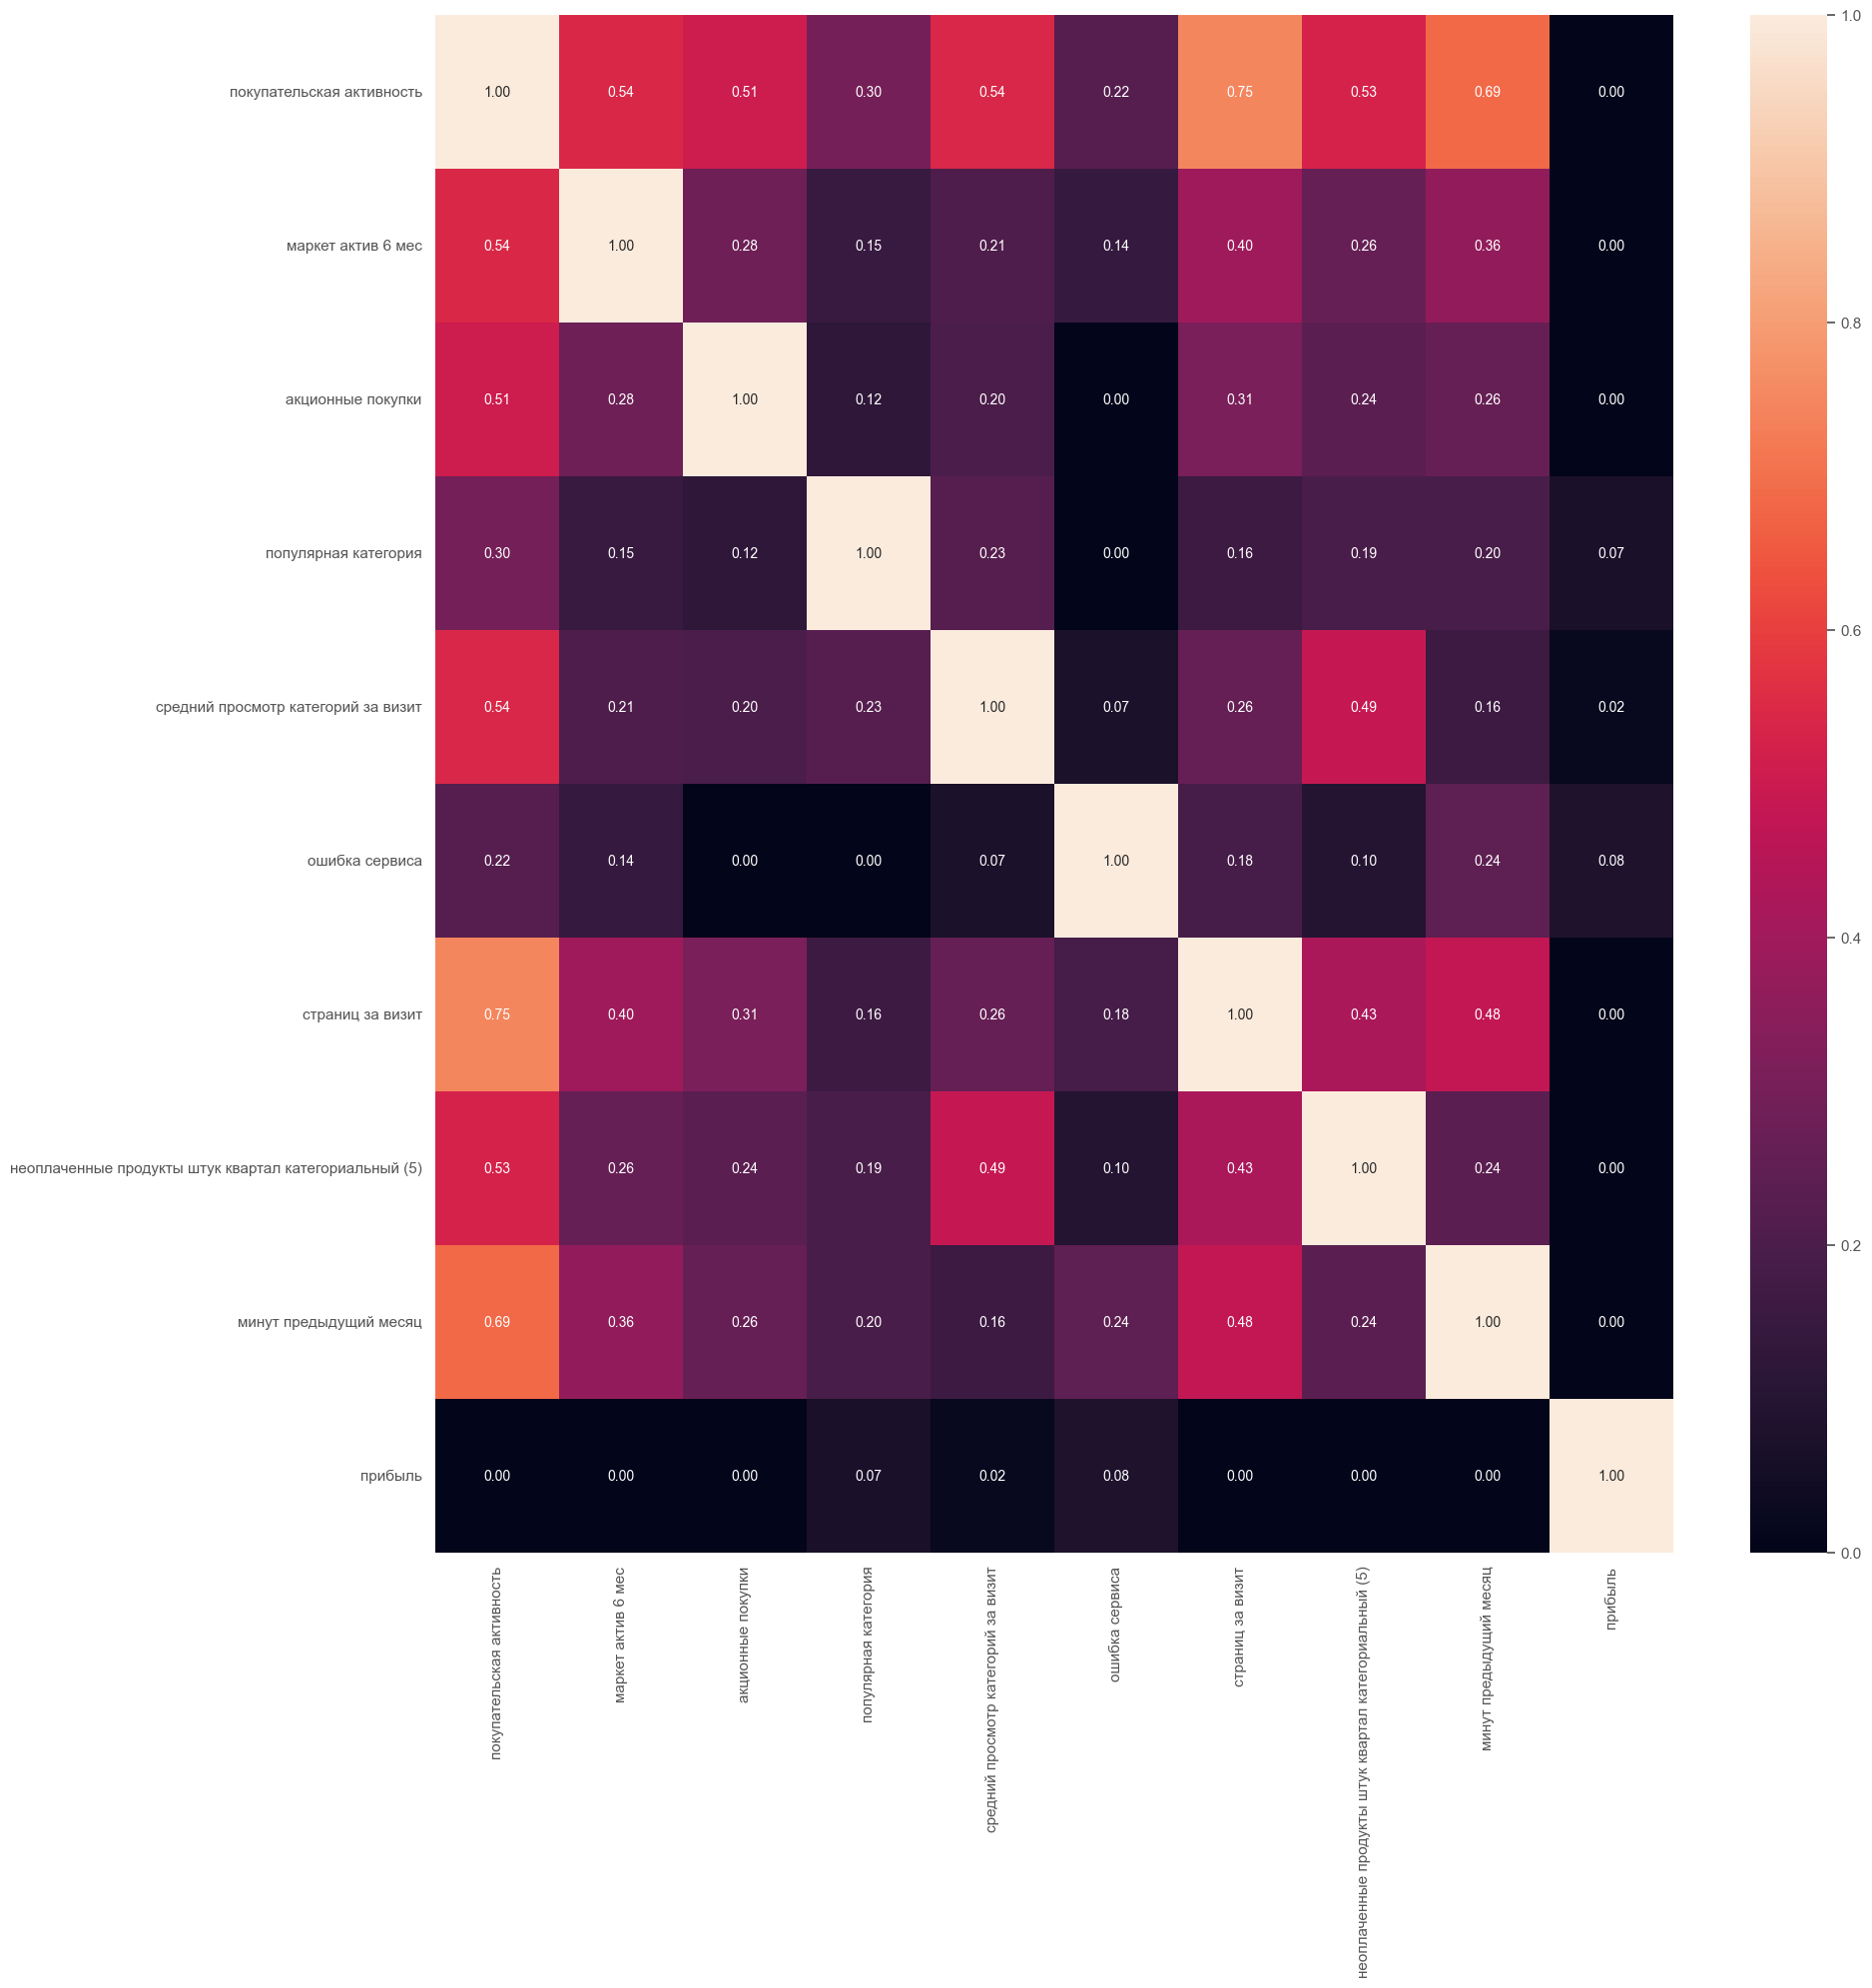

In [474]:
interval_cols = {
    'маркет актив 6 мес',
    'акционные покупки',
    'средний просмотр категорий за визит',
    'страниц за визит',
    'ошибка сервиса',
    'минут предыдущий месяц',
    'прибыль'
}

plt.figure(figsize=(20, 20))

sns.heatmap(
    profit_df.drop('id', axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

Можно увидеть, что на прибыльность влияют признаки `ошибка сервиса`, `средний просмотр категорий за визит` и `популярная категория`.

##### Исследовательский анализ

In [475]:
series = best_selector_pipeline.predict_proba(
    profit_df.drop(
        ['прибыль', 'id', 'покупательская активность'], axis=1
    )
)[:,1]

profit_df['вероятность снижения активности'] = series

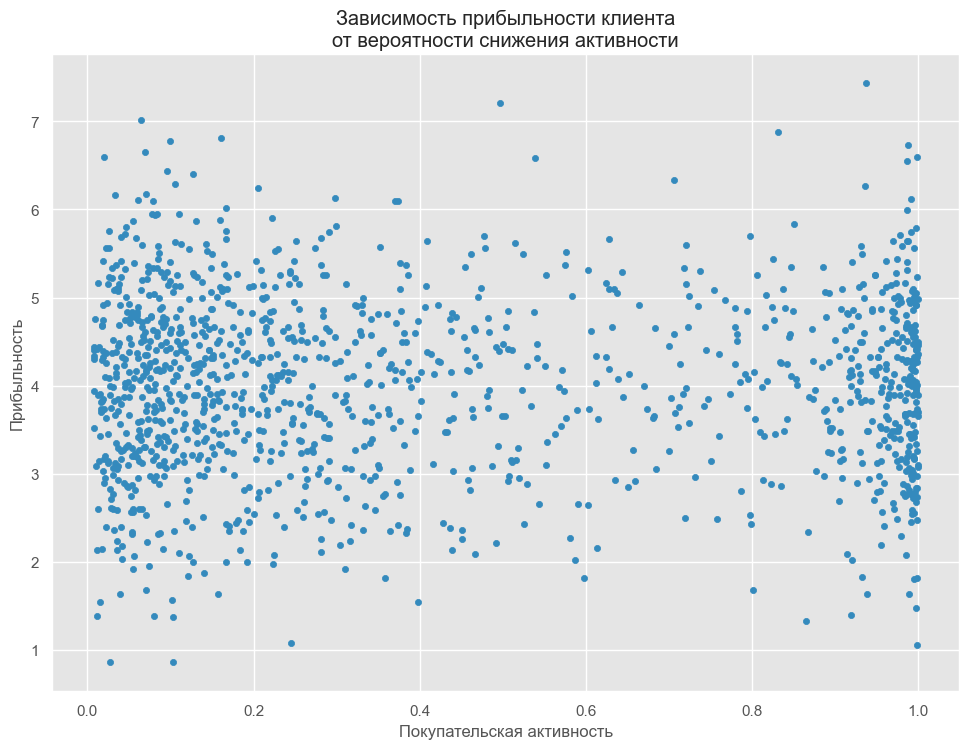

In [476]:
profit_df.plot.scatter(x='вероятность снижения активности',
                       y='прибыль',
                       title='Зависимость прибыльности клиента\nот вероятности снижения активности',
                       xlabel='Покупательская активность',
                       ylabel='Прибыльность')
plt.show()

Имеет смысл проанализировать сегмент покупателей, активность которых, вероятно, снизится, и которые при этом принесли бы ощутимую прибыль. Проведем границу разделения вероятностей на отметке в 0.6, а границу для прибыли на отметке в 3:

In [477]:
warning_df = profit_df[(profit_df['вероятность снижения активности'] >= 0.6) & (profit_df['прибыль'] >= 3)]

In [478]:
safe_df = profit_df[~((profit_df['вероятность снижения активности'] >= 0.6) & (profit_df['прибыль'] >= 3))]

#### Анализ внутри сегмента

##### Корреляционный анализ

Посмотрим на корреляционные матрицы целевых и нецелевых пользователей:

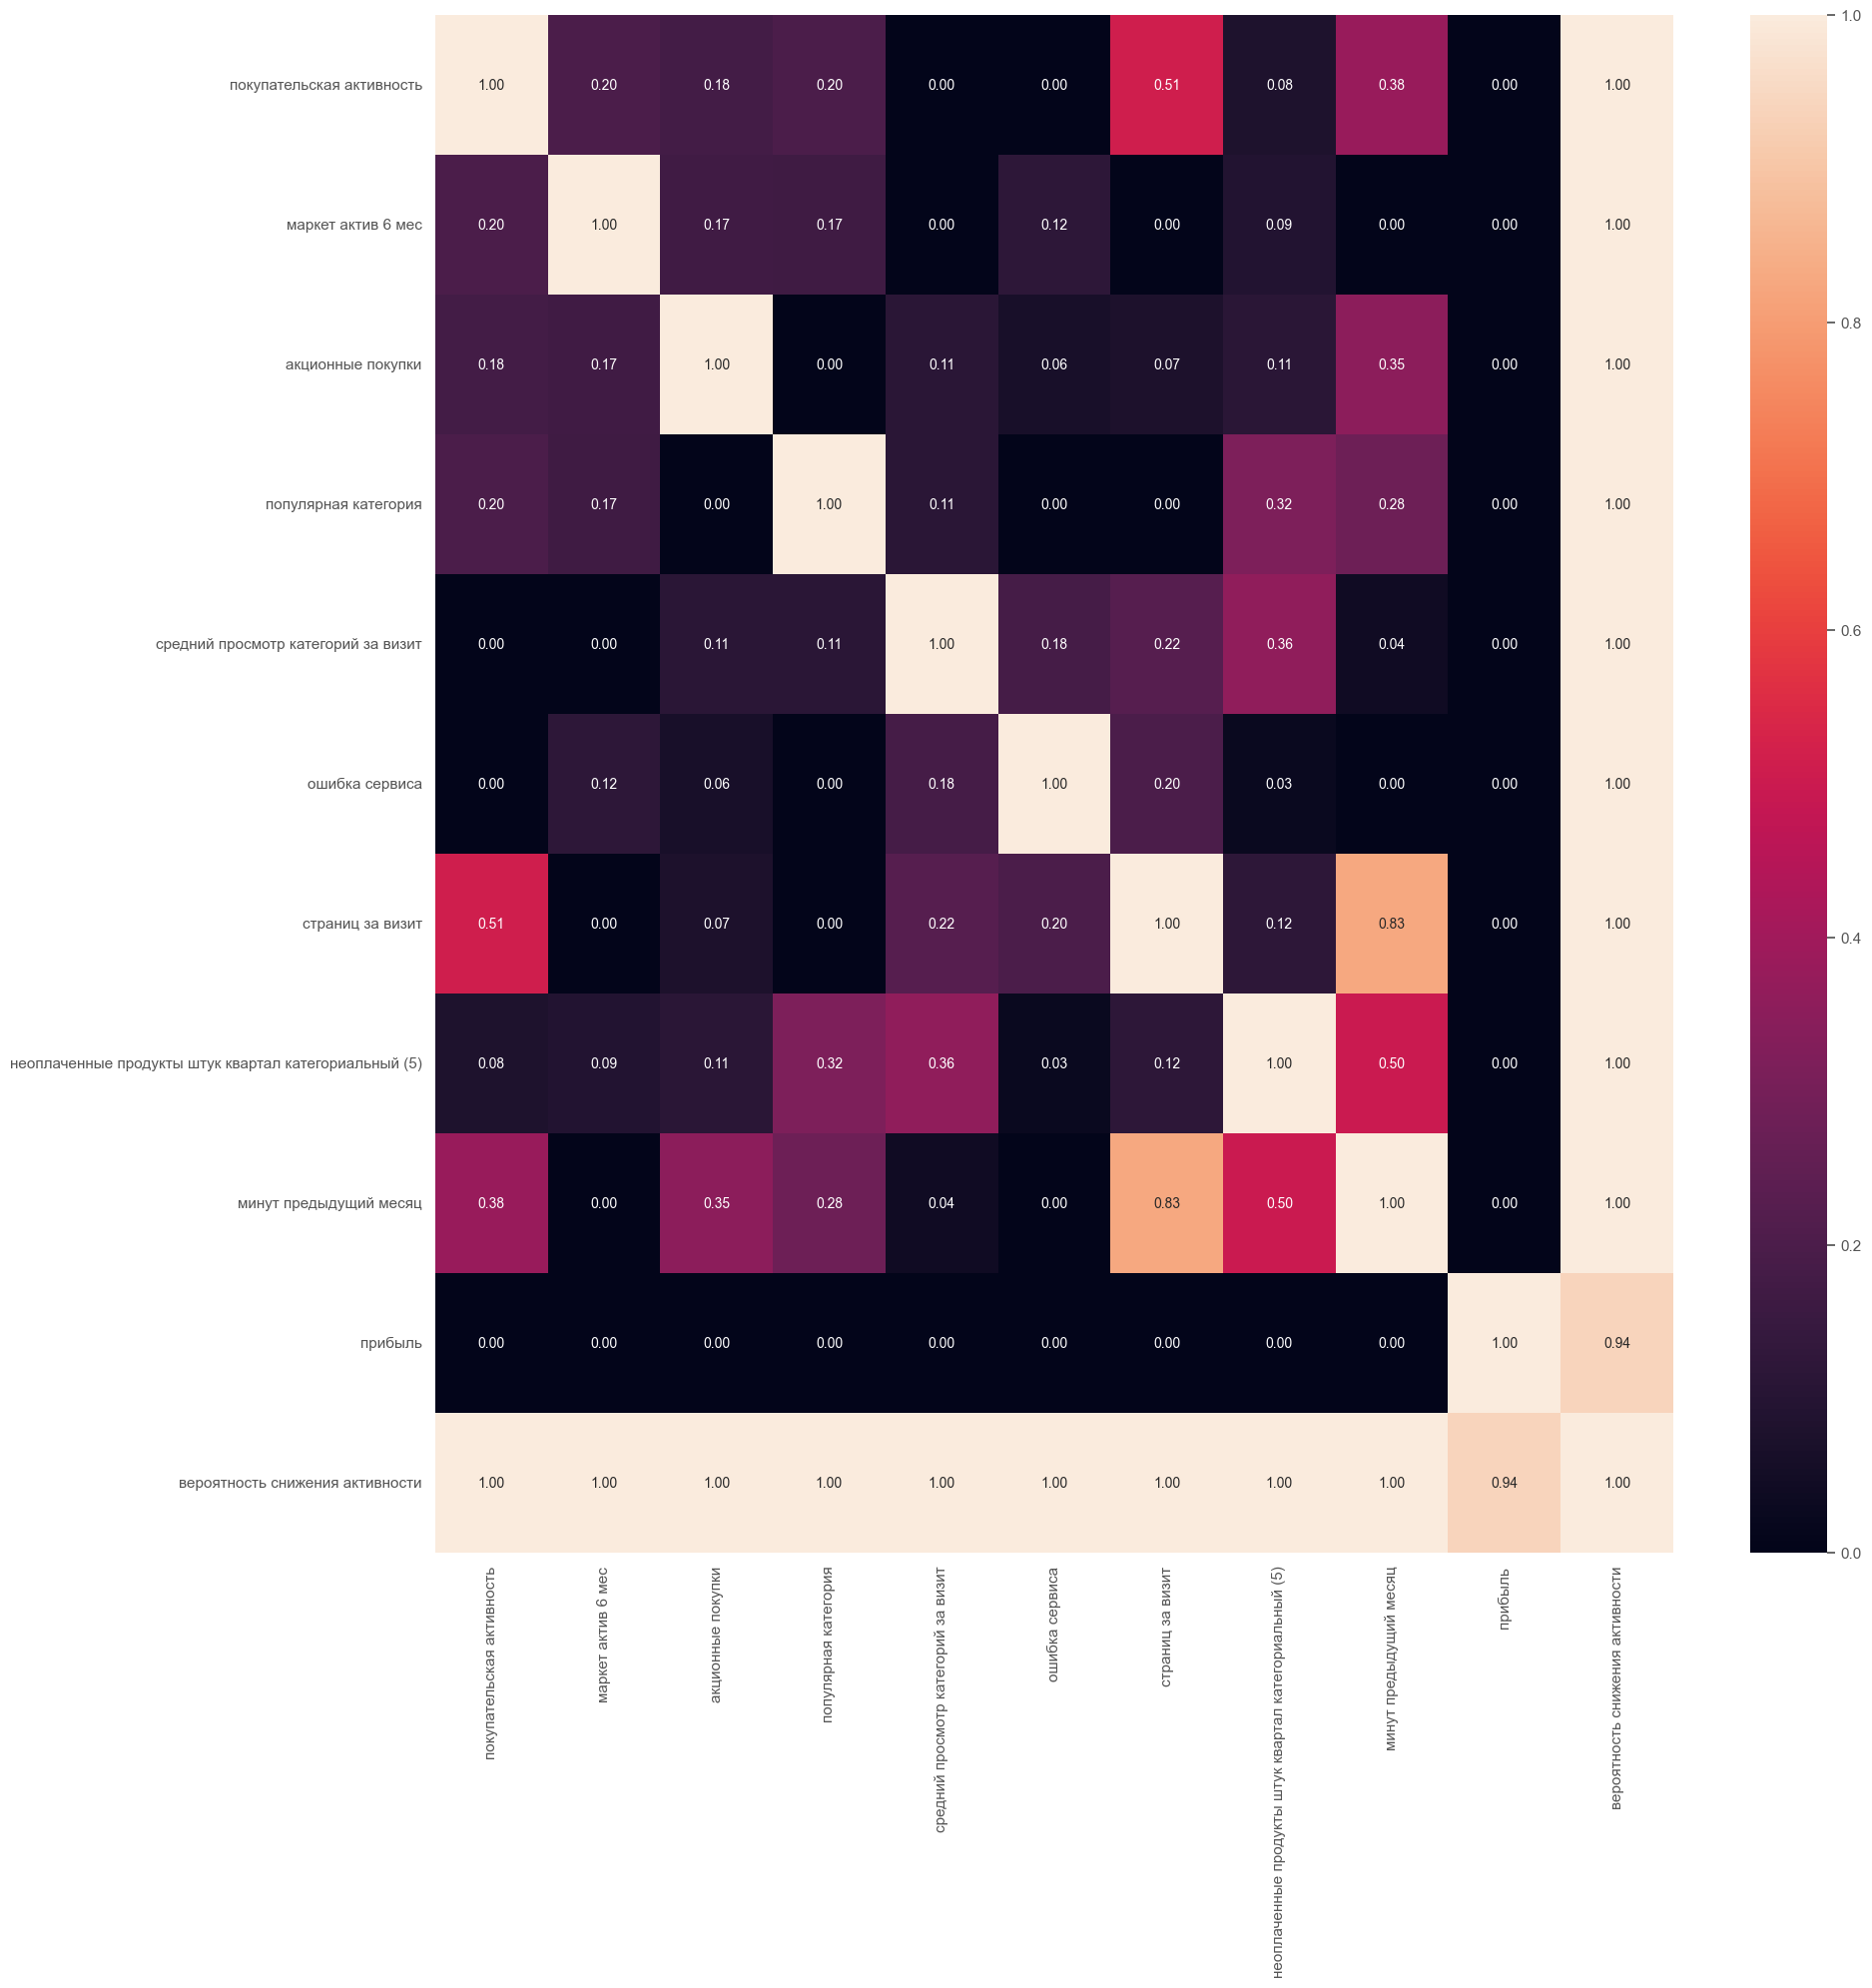

In [479]:
interval_cols = {
    'маркет актив 6 мес',
    'акционные покупки',
    'средний просмотр категорий за визит',
    'страниц за визит',
    'ошибка сервиса',
    'минут предыдущий месяц',
    'прибыль'
}

plt.figure(figsize=(20, 20))

sns.heatmap(
    warning_df.drop('id', axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

Можно заметить, что на покупательскую активность таких пользователей, сильнее влияет количество страниц, которое они просматривают, а также количество времени, проведенного на сайте. Построим графики для этих признаков и остальных:

In [480]:
def show_scatter(data, ax, col_name, color):
    data.plot.scatter(ax=ax,
                       x=col_name,
                       y='вероятность снижения активности',
                       color=color,
                       title=f'Зависимость вероятности снижения активности\nцелевого пользователя от {col_name}',
                       xlabel=col_name,
                       ylabel='Покупательская активность')
def show_bar(data, ax, col_name, color):
    pivot = data.pivot_table(index=col_name, values='вероятность снижения активности', aggfunc='median')
    pivot.columns = ['median']
    pivot.sort_values(by='median', ascending=True, inplace=True)
    pivot.plot.barh(ax=ax,
                    color=color,
                    title=f'Зависимость вероятности снижения активности\nцелевого пользователя от {col_name}',
                    xlabel='',
                    ylabel='Покупательская активность')

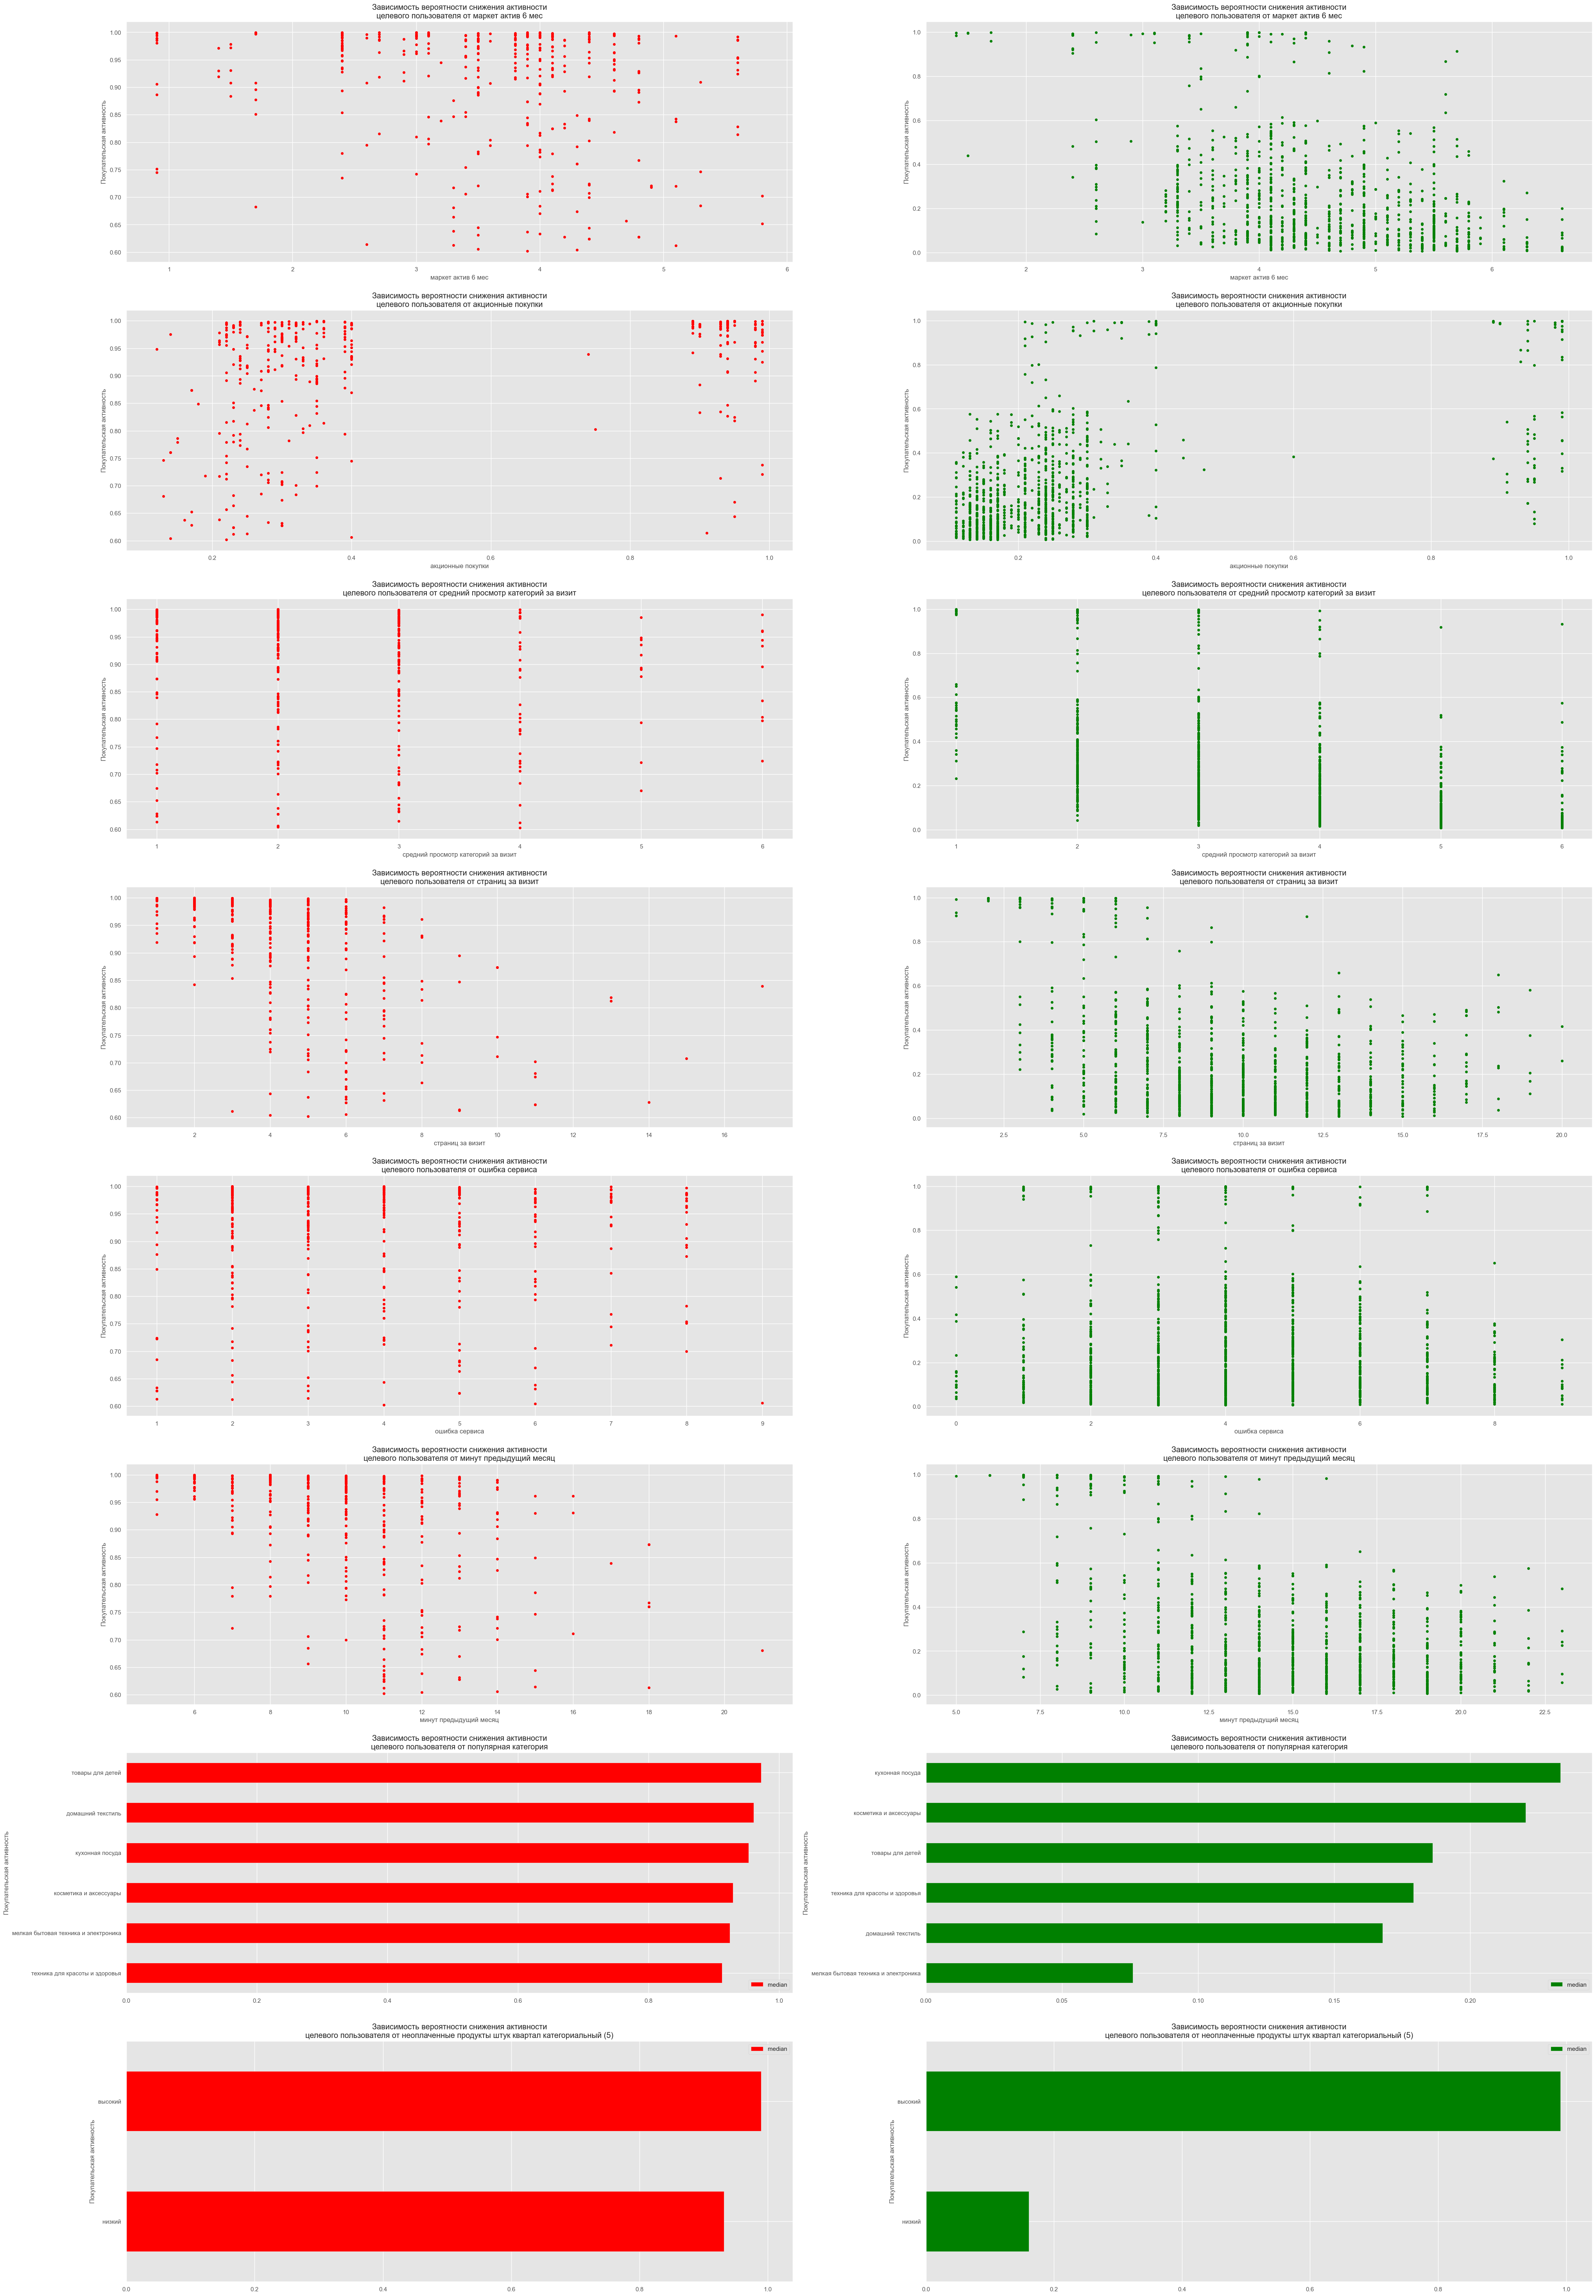

In [481]:
num_cols = [
    'маркет актив 6 мес',
    'акционные покупки',
    'средний просмотр категорий за визит',
    'страниц за визит',
    'ошибка сервиса',
    'минут предыдущий месяц',
]

cat_cols = [
    'популярная категория',
    'неоплаченные продукты штук квартал категориальный (5)'
]

fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(20, 20))

for i in range(0, 6):
    show_scatter(warning_df, axes[i, 0], num_cols[i], 'red')
    show_scatter(safe_df, axes[i, 1], num_cols[i], 'green')

for i in range(6, 8):
    show_bar(warning_df, axes[i, 0], cat_cols[i - len(num_cols)], 'red')
    show_bar(safe_df, axes[i, 1], cat_cols[i - len(num_cols)], 'green')

plt.subplots_adjust(right=2, top=3)
plt.show()

Можно заметить, что в целевом сегменте в отличие от группы остальных пользователей:
- высока вероятность потери клиента при большом количестве маркетинговых взаимодействий (возможно, целевые пользователи не очень любят рекламу и звонки);
- высокое вероятность того, что большое количество акционных покупок служит маркером снижения активности в дальнейшем (возможно, это приходящий пользователь, закупившийся по акции);
- низкое количество категорий, просматриваемых за визит, увеличивает вероятность потери клиента (возможно, пользователь не просматривает весь ассортимент и покидает сайт);
- низкое количество страниц, просмотренных за визит, ощутимо снижает вероятность удержать пользователя (возможно, низкое количество просмотренных страниц свидетельствует о том, что первые предлагаемые товары его не цепляют);
- наличие ошибок сервиса отпугивает клиентов;
- малое количество времени, проводимого на сайте, способствует потере клиента;
- различаются лидирующие популярные категории. Среди целевых клиентов наиболее популярны товары для детей, домашний текстиль и кухонная посуда;
- целевые клиенты не склонны заполнять корзину "на будущее". Многие из них не держат в корзине неоплаченных продуктов.

#### Предложения бизнесу

Предложения бизнесу можно дать следующие:
- стараться проводить маркетинговые взаимодействия ненавязчиво;
- не делать упор на акции. Можно сказать, что они расширяют охват, но портят качество аудитории;
- иногда провоцировать пользователя переходить в другие категории;
- вкладывать наибольшие ресурсы в развитие рекомендательной системы. Это поможет удержать пользователя на сайте и вдохновить его на дальнейшее пролистывание;
- необходимо стараться уменьшать количество ошибок на сайте;
- сделать упор на товары для дома (обобщение для ходовых категорий среди целевых пользователей).

#### Вывод

По результатам анализа по сегментам можно предложить бизнесу следующее:
- стараться проводить маркетинговые взаимодействия ненавязчиво;
- не делать упор на акции. Можно сказать, что они расширяют охват, но портят качество аудитории;
- иногда провоцировать пользователя переходить в другие категории;
- вкладывать наибольшие ресурсы в развитие рекомендательной системы. Это поможет удержать пользователя на сайте и вдохновить его на дальнейшее пролистывание;
- необходимо стараться уменьшать количество ошибок на сайте;
- сделать упор на товары для дома (обобщение для ходовых категорий среди целевых пользователей).

## Итоговые выводы

<b>Описание задачи</b>

Для выполнения задачи необходимо было пройти следуюшие этапы:

- промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень»;
- собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте;

- построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца;
- включить в исследование дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца;
- используя данные модели и данные о прибыльности клиентов, выделить сегменты покупателей и разработать для них персонализированные предложения.

Целью исследования является сегментация покупателей и разработка персонализированных предложений для них.

Данные шаги пройдены, а в качестве результатов исследования подготовлены рекомендации для бизнеса.

<b>Исходные данные и предобработка</b>

Для исследования были предоставлены следующие данные:

1. market_file.csv
    Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    - `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
    - `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
    - `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
    - `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
    
    
2. market_money.csv
    Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    - `Выручка` — сумма выручки за период.
    

3. market_time.csv
    Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксировано общее время.
    - `минут` — значение времени, проведённого на сайте, в минутах.
    

4. money.csv
    Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Прибыль` — значение прибыли.
    
Предобработка данных включала следующие шаги:    
- переименование столбцов;
- приведение типов;
- обработка пропусков;
- обработка дубликатов.

Кроме того, были проведены исследовательский и корреляционный анализ данных, в процессе которых были синтезированы новые признаки, а также устранены коррелирующие.

<b>Поиск лучшей модели</b>

В процессе поиска лучшей модели с помощью инструмента OptunaSearchCV были обучены следующие модели с разными параметрами:

- KNeighborsClassifier();
- DecisionTreeClassifier();
- LogisticRegression();
- SVC().

Кроме того, были перебраны различные методы подготовки данных к обучению, насыщения их синтетикой и отбора признаков.

Лучшим пайплайном оказался следующий:

In [482]:
best_selector_pipeline

Pipeline(steps=[('over',
                 SMOTENC(categorical_features=['популярная категория',
                                               'неоплаченные продукты штук '
                                               'квартал категориальный (5)'],
                         k_neighbors=2, random_state=42)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='firs...
                                                   '(5)']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  ['маркет актив 6 мес',
                                                   'акционные покупки',
                                                   'средний просмотр категорий '
                                                   'за визит',
                                                   'ошибка сервиса',
                                                   'страниц за визит',
                                                   'минут предыдущий '
                                                   'месяц'])])),
                ('selector', SelectKBest(k=32)),
                ('models',
                 LogisticRegression(C=3, l1_ratio=1, penalty='elasticnet',
                                    random_state=42, solver='saga'))])

Его метрика качества (ROC-AUC) оказалась следующей:

- 0.83 на тренировочных данных;
- 0.84 на тестовых.

<b>Выводы и рекомендации</b>

При помощи анализа данных методом SHAP были составлены следующие общие рекомендации:
- вкладывать наибольшие ресурсы в развитие рекомендательной системы (чтобы пользователи, которые просто листают сайт, начали делать покупки);
- создать систему скидок и акций для постоянных пользователей. Это позволит удержать любителей скидок;
- попробовать сделать упор на женскую аудиторию (так как активность пользователей в категориях, связанных с красотой, здоровьем и мелкой бытовой техникой, достаточно высока).

Для анализа был выбран сегмент, в котором пользователи имеют наибольшую вероятность снизить активность, и при этом имеют наибольшую потенциальную прибыль.

По результатам анализа по сегментам рекомендации были скорректированы следующим образом:

- стараться проводить маркетинговые взаимодействия ненавязчиво;
- не делать упор на акции. Можно сказать, что они расширяют охват, но портят качество аудитории;
- иногда провоцировать пользователя переходить в другие категории;
- вкладывать наибольшие ресурсы в развитие рекомендательной системы. Это поможет удержать пользователя на сайте и вдохновить его на дальнейшее пролистывание;
- необходимо стараться уменьшать количество ошибок на сайте;
- сделать упор на товары для дома (обобщение для ходовых категорий среди целевых пользователей).